### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

In [2]:
# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# Setting the plot size for all the figures
plt.rcParams['figure.figsize']=(8,6)

### Importing the data

In [4]:
df = pd.read_excel('Data Set.xlsx')
df.head()

custid  region  townsize  gender  age  agecat birthmonth  ed  \
0  3964-QJWTRG-NPN       1       2.0       1   20       2  September  15   
1  0648-AIPJSP-UVM       5       5.0       0   22       2        May  17   
2  5195-TLUDJE-HVO       3       4.0       1   67       6       June  14   
3  4459-VLPQUH-3OL       4       3.0       0   23       2        May  16   
4  8158-SMTQFB-CNO       2       2.0       0   26       3       July  16   

   edcat  jobcat  ...  owncd  ownpda  ownpc  ownipod  owngame  ownfax  news  \
0      3       1  ...      0       0      0        1        1       0     0   
1      4       2  ...      1       1      1        1        1       1     1   
2      2       2  ...      1       0      0        0        0       0     1   
3      3       2  ...      1       0      1        1        1       0     1   
4      3       2  ...      1       0      1        0        1       0     0   

   response_01  response_02  response_03  
0            0            1            0  
1            0            0            0  
2            0            0            0  
3            1            0            0  
4            0            1            0  

[5 rows x 130 columns]

### Data Exploration

In [5]:
# Shape and Info of the data:
df.shape

(5000, 130)

In [6]:
pd.set_option('max_info_columns',130)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 130 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   custid             5000 non-null   object 
 1   region             5000 non-null   int64  
 2   townsize           4998 non-null   float64
 3   gender             5000 non-null   int64  
 4   age                5000 non-null   int64  
 5   agecat             5000 non-null   int64  
 6   birthmonth         5000 non-null   object 
 7   ed                 5000 non-null   int64  
 8   edcat              5000 non-null   int64  
 9   jobcat             5000 non-null   int64  
 10  union              5000 non-null   int64  
 11  employ             5000 non-null   int64  
 12  empcat             5000 non-null   int64  
 13  retire             5000 non-null   int64  
 14  income             5000 non-null   int64  
 15  lninc              5000 non-null   float64
 16  inccat             5000

### Removal of Variables

In [8]:
# 1) Removing Customer Id as is unique and not needed for model building:
df.drop('custid',axis=1,inplace=True)

In [9]:
# 2) Removing duplicate Categorical variables which are also having numerical features:
df.drop(['agecat','edcat','empcat','inccat','spousedcat','addresscat','cardtenurecat','card2tenurecat'], axis=1, inplace=True)

In [10]:
# 3)  Removing the log variables which are duplicate of the numerical variables:
df.drop(['lninc', 'lncreddebt', 'lnothdebt', 'lnlongmon','lnlongten','lntollmon', 'lntollten','lnequipmon',
        'lnequipten', 'lncardmon','lncardten', 'lnwiremon', 'lnwireten'], axis=1, inplace=True)

In [11]:
# All the Categorical Variables:

cat_var=['region','townsize','gender','birthmonth','jobcat','union','retire','default','jobsat','marital',
           'homeown','hometype','cars','carown','cartype','carcatvalue','carbought','carbuy','commute',
           'commutecat','commutecar','commutemotorcycle','commutecarpool','commutebus','commuterail',
           'commutepublic','commutebike','commutewalk','commutenonmotor','telecommute','reason','polview',
           'polparty','polcontrib','vote','card','cardtype','cardbenefit','cardfee','card2','card2type',
           'card2benefit','card2fee','active','bfast','churn','tollfree','equip','callcard','wireless',
           'multline', 'voice','pager','internet','callid','callwait','forward','confer','ebill',
           'owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news',
           'response_01','response_02','response_03']

In [12]:
# All the Numerical Variables:

numerical_var=[]
for i in df.columns:
    if i not in cat_var:
        numerical_var.append(i)
print(numerical_var)


['age', 'ed', 'employ', 'income', 'debtinc', 'creddebt', 'othdebt', 'spoused', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'address', 'carvalue', 'commutetime', 'cardtenure', 'card2tenure', 'cardspent', 'card2spent', 'tenure', 'longmon', 'longten', 'tollmon', 'tollten', 'equipmon', 'equipten', 'cardmon', 'cardten', 'wiremon', 'wireten', 'hourstv']


#### Converting the datatype of the categorical variables to category 

In [13]:
# Conversion of the above Categorial variables to object or category type:

for i in cat_var:
    df[i]= df[i].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 108 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   region             5000 non-null   category
 1   townsize           4998 non-null   category
 2   gender             5000 non-null   category
 3   age                5000 non-null   int64   
 4   birthmonth         5000 non-null   category
 5   ed                 5000 non-null   int64   
 6   jobcat             5000 non-null   category
 7   union              5000 non-null   category
 8   employ             5000 non-null   int64   
 9   retire             5000 non-null   category
 10  income             5000 non-null   int64   
 11  debtinc            5000 non-null   float64 
 12  creddebt           5000 non-null   float64 
 13  othdebt            5000 non-null   float64 
 14  default            5000 non-null   category
 15  jobsat             5000 non-null   category
 16  marit

In [15]:
pd.set_option('display.max_columns',None)

#### Summary Statistics of the variables:

In [16]:
# Data Summary for continuous variables:

def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(), x.std(), x.var(), x.min(), 
        x.quantile(0.01), x.quantile(0.05), x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                     
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [17]:
num_features = df.select_dtypes([np.number])
num_features.apply(var_summary).T

N  NMISS           SUM        MEAN      MEDIAN  \
age             5000.0    0.0  2.351280e+05   47.025600   47.000000   
ed              5000.0    0.0  7.271500e+04   14.543000   14.000000   
employ          5000.0    0.0  4.865200e+04    9.730400    7.000000   
income          5000.0    0.0  2.737980e+05   54.759600   38.000000   
debtinc         5000.0    0.0  4.977080e+04    9.954160    8.800000   
creddebt        5000.0    0.0  9.286628e+03    1.857326    0.926437   
othdebt         5000.0    0.0  1.827230e+04    3.654460    2.098540   
spoused         5000.0    0.0  3.056400e+04    6.112800   -1.000000   
reside          5000.0    0.0  1.102000e+04    2.204000    2.000000   
pets            5000.0    0.0  1.533700e+04    3.067400    2.000000   
pets_cats       5000.0    0.0  2.502000e+03    0.500400    0.000000   
pets_dogs       5000.0    0.0  1.962000e+03    0.392400    0.000000   
pets_birds      5000.0    0.0  5.520000e+02    0.110400    0.000000   
pets_reptiles   5000.0    0.0  2.780000e+02    0.055600    0.000000   
pets_small      5000.0    0.0  5.730000e+02    0.114600    0.000000   
pets_saltfish   5000.0    0.0  2.330000e+02    0.046600    0.000000   
pets_freshfish  5000.0    0.0  9.237000e+03    1.847400    0.000000   
address         5000.0    0.0  8.201200e+04   16.402400   14.000000   
carvalue        5000.0    0.0  1.161629e+05   23.232580   17.000000   
commutetime     4998.0    2.0  1.266770e+05   25.345538   25.000000   
cardtenure      5000.0    0.0  8.327900e+04   16.655800   14.000000   
card2tenure     5000.0    0.0  6.542200e+04   13.084400   12.000000   
cardspent       5000.0    0.0  1.686013e+06  337.202520  276.360000   
card2spent      5000.0    0.0  8.043806e+05  160.876110  125.340000   
tenure          5000.0    0.0  1.910240e+05   38.204800   38.000000   
longmon         5000.0    0.0  6.735725e+04   13.471450    9.550000   
longten         4997.0    3.0  3.542232e+06  708.871753  350.000000   
tollmon         5000.0    0.0  6.632225e+04   13.264450    0.000000   
tollten         5000.0    0.0  2.889163e+06  577.832510    0.000000   
equipmon        5000.0    0.0  6.495655e+04   12.991310    0.000000   
equipten        5000.0    0.0  2.350882e+06  470.176400    0.000000   
cardmon         5000.0    0.0  7.721925e+04   15.443850   13.750000   
cardten         4998.0    2.0  3.600951e+06  720.478391  425.000000   
wiremon         5000.0    0.0  5.350595e+04   10.701190    0.000000   
wireten         5000.0    0.0  2.109923e+06  421.984610    0.000000   
hourstv         5000.0    0.0  9.822500e+04   19.645000   20.000000   

                        STD           VAR   MIN         P1         P5  \
age               17.770338  3.157849e+02  18.0  18.000000  20.000000   
ed                 3.281083  1.076550e+01   6.0   8.000000   9.000000   
employ             9.690929  9.391410e+01   0.0   0.000000   0.000000   
income            55.377511  3.066669e+03   9.0   9.000000  13.000000   
debtinc            6.399783  4.095723e+01   0.0   0.700000   1.900000   
creddebt           3.415732  1.166722e+01   0.0   0.033160   0.101088   
othdebt            5.395172  2.910788e+01   0.0   0.114299   0.287692   
spoused            7.743518  5.996207e+01  -1.0  -1.000000  -1.000000   
reside             1.393977  1.943173e+00   1.0   1.000000   1.000000   
pets               3.414497  1.165879e+01   0.0   0.000000   0.000000   
pets_cats          0.860783  7.409480e-01   0.0   0.000000   0.000000   
pets_dogs          0.796084  6.337490e-01   0.0   0.000000   0.000000   
pets_birds         0.494227  2.442607e-01   0.0   0.000000   0.000000   
pets_reptiles      0.325776  1.061299e-01   0.0   0.000000   0.000000   
pets_small         0.568798  3.235315e-01   0.0   0.000000   0.000000   
pets_saltfish      0.469545  2.204725e-01   0.0   0.000000   0.000000   
pets_freshfish     3.074801  9.454404e+00   0.0   0.000000   0.000000   
address           12.397484  1.536976e+02   0.0   0.000000   1.000000   
carval

In [18]:
num_features.apply(var_summary).T.to_excel('summary.xlsx')

In [17]:
# Summary Statistics of the Numerical variables:

df.describe()

age           ed       employ       income      debtinc  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     47.025600    14.543000     9.730400    54.759600     9.954160   
std      17.770338     3.281083     9.690929    55.377511     6.399783   
min      18.000000     6.000000     0.000000     9.000000     0.000000   
25%      31.000000    12.000000     2.000000    24.000000     5.100000   
50%      47.000000    14.000000     7.000000    38.000000     8.800000   
75%      62.000000    17.000000    15.000000    67.000000    13.600000   
max      79.000000    23.000000    52.000000  1073.000000    43.100000   

          creddebt      othdebt      spoused       reside         pets  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      1.857326     3.654460     6.112800     2.204000     3.067400   
std       3.415732     5.395172     7.743518     1.393977     3.414497   
min       0.000000     0.000000    -1.000000     1.000000     0.000000   
25%       0.385520     0.980301    -1.000000     1.000000     0.000000   
50%       0.926437     2.098540    -1.000000     2.000000     2.000000   
75%       2.063820     4.314780    14.000000     3.000000     5.000000   
max     109.072596   141.459150    24.000000     9.000000    21.000000   

         pets_cats    pets_dogs   pets_birds  pets_reptiles   pets_small  \
count  5000.000000  5000.000000  5000.000000    5000.000000  5000.000000   
mean      0.500400     0.392400     0.110400       0.055600     0.114600   
std       0.860783     0.796084     0.494227       0.325776     0.568798   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%       0.000000     0.000000     0.000000       0.000000     0.000000   
50%       0.000000     0.000000     0.000000       0.000000     0.000000   
75%       1.000000     0.000000     0.000000       0.000000     0.000000   
max       6.000000     7.000000     5.000000       6.000000     7.000000   

       pets_saltfish  pets_freshfish      address     carvalue  commutetime  \
count    5000.000000     5000.000000  5000.000000  5000.000000  4998.000000   
mean        0.046600        1.847400    16.402400    23.232580    25.345538   
std         0.469545        3.074801    12.397484    21.231637     5.879149   
min         0.000000        0.000000     0.000000    -1.000000     8.000000   
25%         0.000000        0.000000     6.000000     9.200000    21.000000   
50%         0.000000        0.000000    14.000000    17.000000    25.000000   
75%         0.000000        4.000000    25.000000    31.100000    29.000000   
max         8.000000       16.000000    57.000000    99.600000    48.000000   

        cardtenure  card2tenure    cardspent   card2spent       tenure  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     16.655800    13.084400   337.202520   160.876110    38.204800   
std      12.020958     9.119403   245.145068   146.292771    22.661888   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       6.000000     5.000000   183.377500    66.967500    18.000000   
50%      14.000000    12.000000   276.360000   125.340000    38.000000   
75%      26.000000    21.000000   418.537500   208.310000    59.000000   
max      40.000000    30.000000  3926.410000  2069.250000    72.000000   

           longmon       longten      tollmon      tollten     equipmon  \
count  5000.000000   4997.000000  5000.000000  5000.000000  5000.000000   
mean     13.471450    708.871753    13.264450   577.832510    12.991310   
std      12.773381    979.291072    16.310018   949.151586    19.212943   
min       0.900000      0.900000     0.000000     0.000000     0.000000   
25%       5.700000    104.600000     0.000000     0.000000     0.000000   
50%       9.550000    350.000000     0.000000     0.000000     0.000000   
75%      16.550000    913.850000    24.500000   885.450000    30.800000   
max     179.85000

In [21]:
# Summary Statistics of the Categorical variables:

df.describe(include='category')

region  townsize  gender birthmonth  jobcat  union  retire  default  \
count     5000    4998.0    5000       5000    5000   5000    5000     5000   
unique       5       5.0       2         12       6      2       2        2   
top          5       1.0       1  September       2      0       0        0   
freq      1027    1436.0    2518        458    1640   4244    4262     3829   

        jobsat  marital  homeown  hometype  cars  carown  cartype  \
count     5000     5000     5000      5000  5000    5000     5000   
unique       5        2        2         4     9       3        3   
top          3        0        1         1     2       1        0   
freq      1085     2599     3148      2265  1607    3704     2287   

        carcatvalue  carbought  carbuy  commute  commutecat  commutecar  \
count          5000       5000    5000     5000        5000        5000   
unique            4          3       2       10           5           2   
top               1          0       0        1           1           1   
freq           2399       2901    3195     2855        2905        3395   

        commutemotorcycle  commutecarpool  commutebus  commuterail  \
count                5000            5000        5000         5000   
unique                  2               2           2            2   
top                     0               0           0            0   
freq                 4487            3641        2970         3627   

        commutepublic  commutebike  commutewalk  commutenonmotor  telecommute  \
count            5000         5000         5000             5000         5000   
unique              2            2            2                2            2   
top                 0            0            0                0            0   
freq             4523         4383         3081             4708         4060   

        reason  polview  polparty  polcontrib  vote  card  cardtype  \
count     5000     5000      5000        5000  5000  5000      5000   
unique       5        7         2           2     2     5         4   
top          9        4         0           0     1     4         4   
freq      4052     1733      3093        3808  2590  1344      1260   

        cardbenefit  cardfee  card2  card2type  card2benefit  card2fee  \
count          5000     5000   5000       5000          5000      5000   
unique            4        2      5          4             4         2   
top               3        0      3          4             4         0   
freq           1274     4051   1384       1319          1294      4064   

        active  bfast  churn  tollfree  equip  callcard  wireless  multline  \
count     5000   5000   5000      5000   5000      5000      5000      5000   
unique       2      3      2         2      2         2         2         2   
top          0      3      0         0      0         1         0         0   
freq      2670   1875   3734      2622   3296      3581      3656      2558   

        voice  pager  internet  callid  callwait  forward  confer  ebill  \
count    5000   5000      5000    5000      5000     5000    5000   5000   
unique      2      2         5       2         2        2       2      2   
top         0      0         0       0         0        0       0      0   
freq     3485   3782      2498    2624      2605     2597    2610   3257   

        owntv  ownvcr  owndvd  owncd  ownpda  ownpc  ownipod  owngame  ownfax  \
count    5000    5000    5000   5000    5000   5000     5000     5000    5000   
unique      2       2       2      2       2      2        2        2       2   
top         1       1       1      1       0      1        0        0       0   
freq     4915    4578    4568   4664    3995   3164     2604     2626    4106   

        news  response_01  response_02  response_03  
count   5000         5000         5000         5000  
unique     2            2            2            2  
top        0            0            0            0  
freq   

### Assumptions Before bulding the MLR model:

1) Is the dependent variable continuous?\
2) Is there multicollinearity present in the data?


In [19]:
# Dependent Variable:

y = df['cardspent'] + df['card2spent']
y

0        149.46
1         77.54
2        359.97
3        359.41
4        507.83
         ...   
4995    1425.67
4996     366.35
4997    1527.75
4998     752.95
4999     407.86
Length: 5000, dtype: float64

In [20]:
# Checking the data type of CardSpent:
y.dtype

dtype('float64')

#### Conclusion:

The output shows that the data type of target variable is 'float64'. i.e. the dependent variable is numeric. Therefore, CardSpent is a continous variable.

We shall check for presence of multi-collinearity below after performing uni and bi-variate analysis, distribution and relationship between the variables.

### Univariate Analysis

#### Distribution of the Numerical Independent Variables  

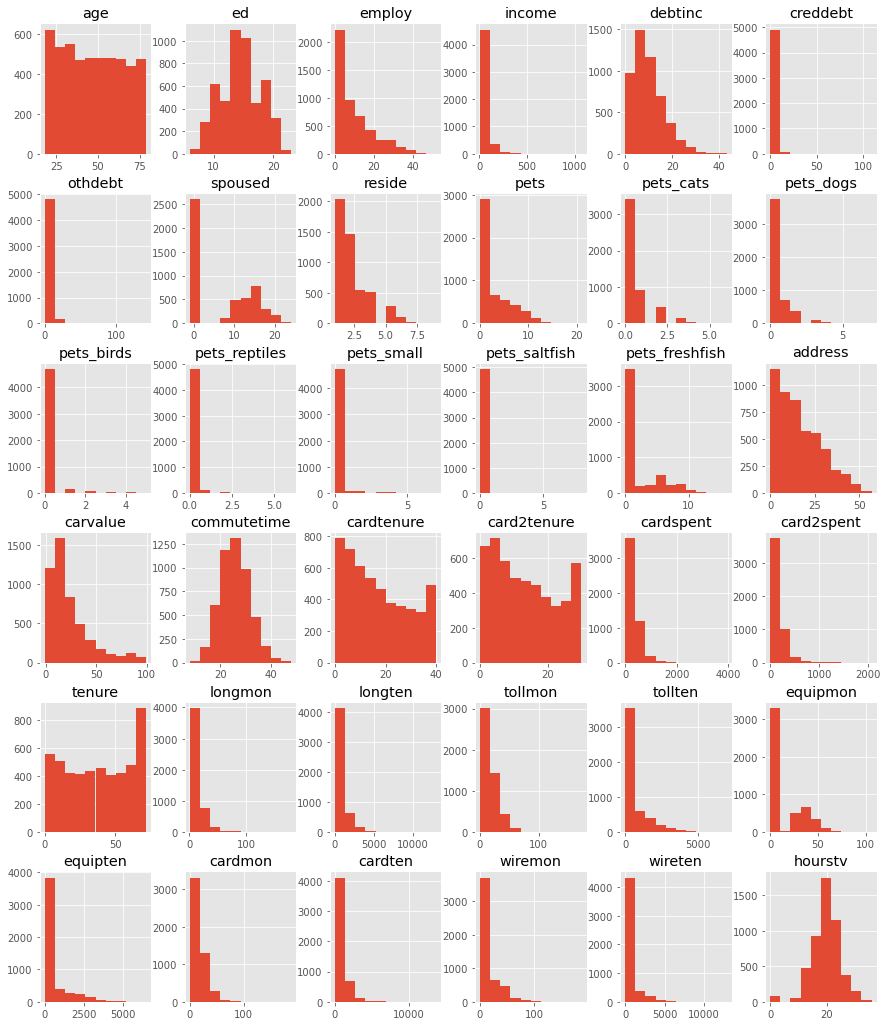

<Figure size 1080x1296 with 0 Axes>

In [21]:
def show_hist(x):
    plt.rcParams["figure.figsize"] = 15,18
    x.hist()
    plt.show()
show_hist(df[numerical_var])

plt.tight_layout()


### Bi-variate Analysis

#### Relationship between Numerical Independent Variables and the Target Variable : CardSpent

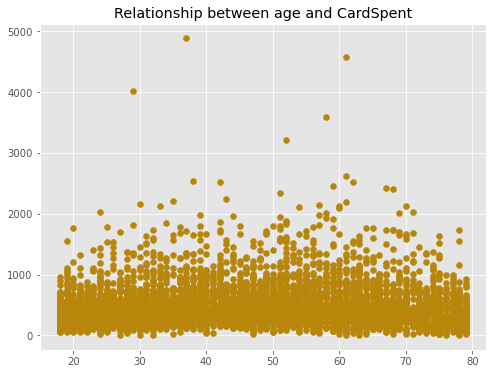

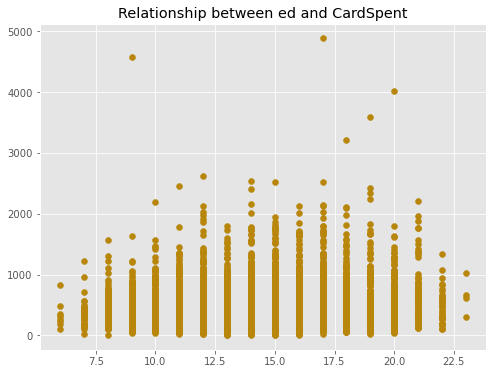

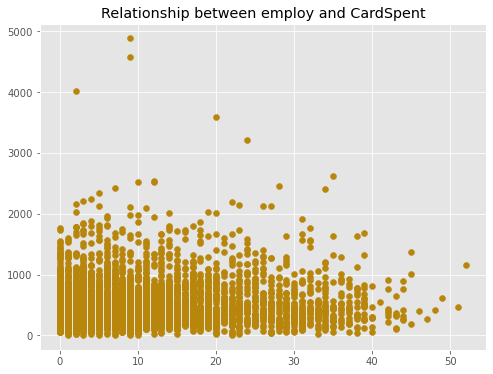

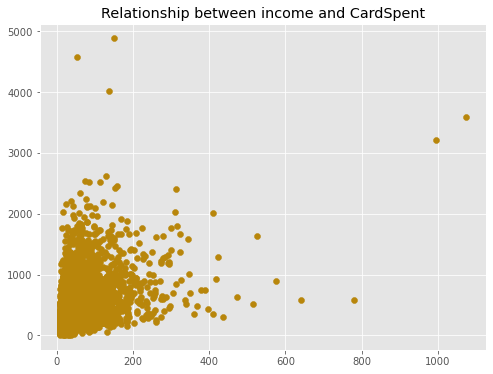

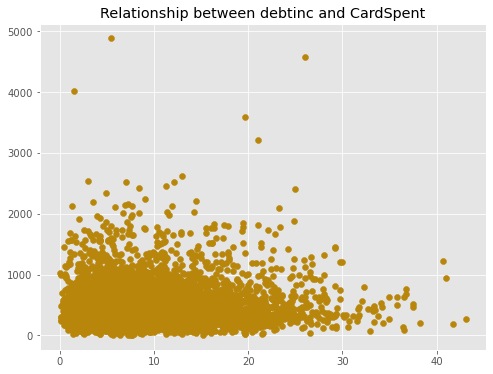

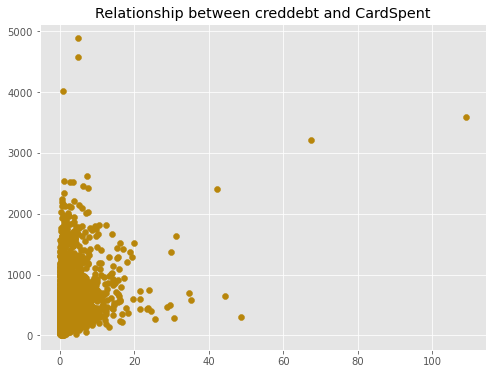

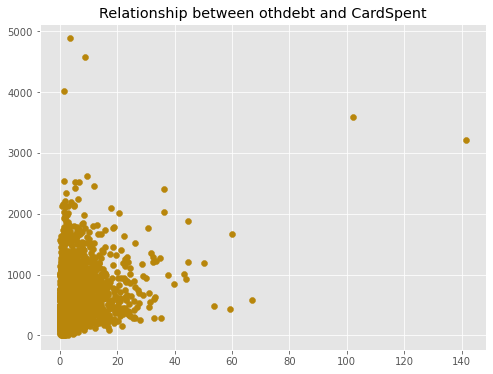

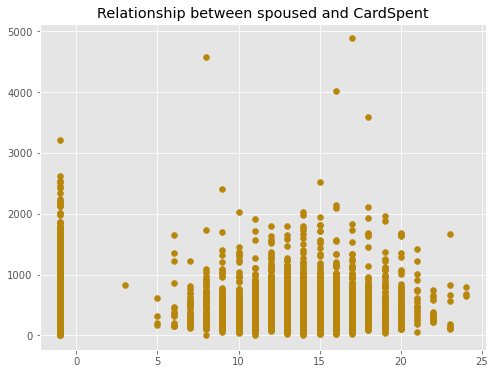

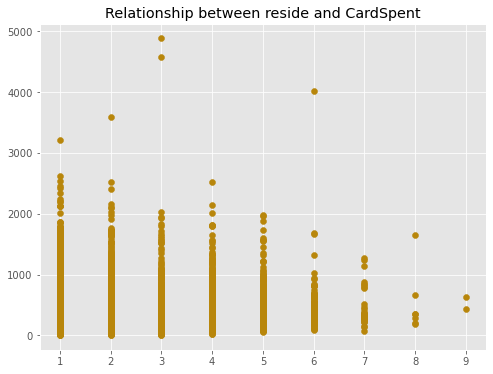

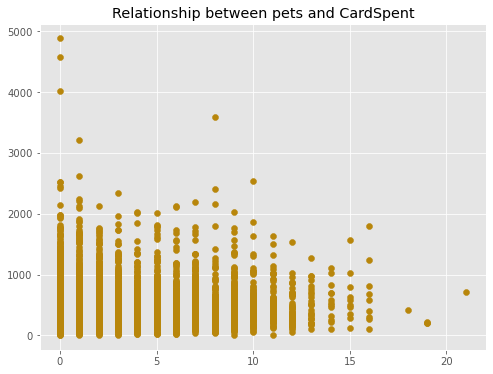

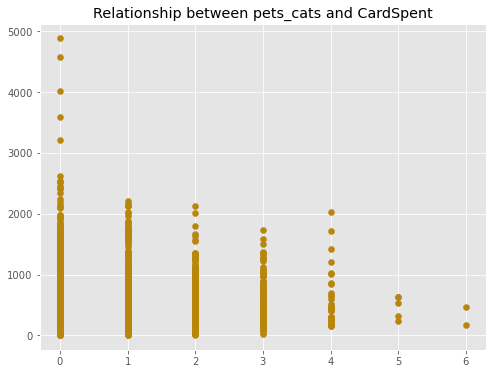

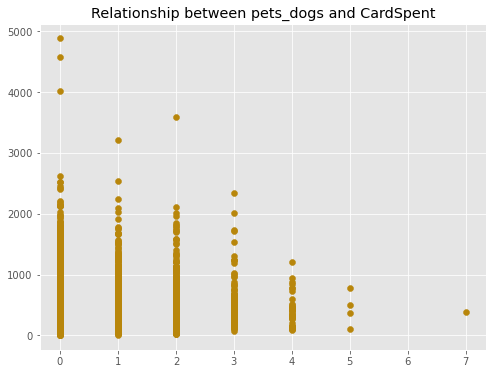

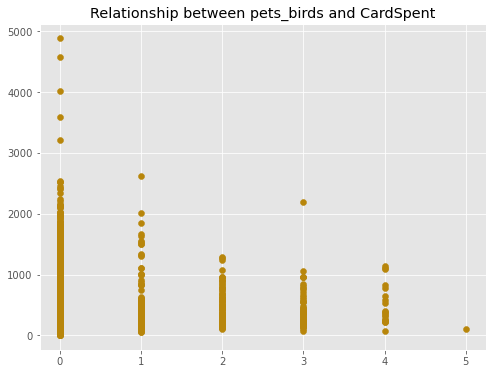

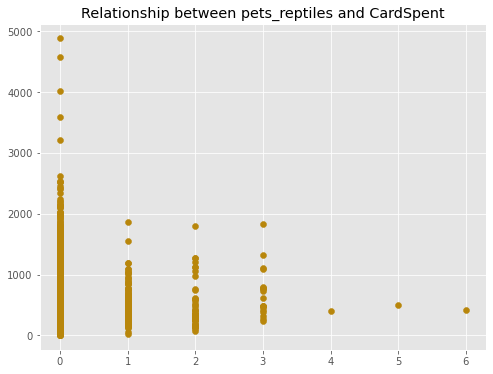

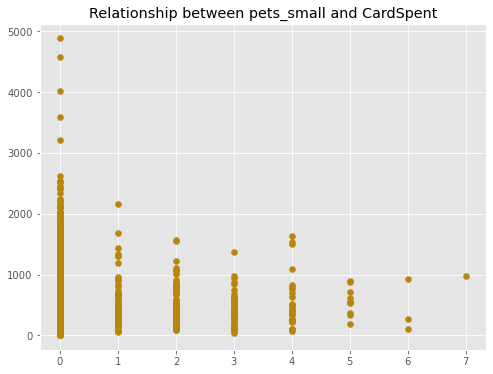

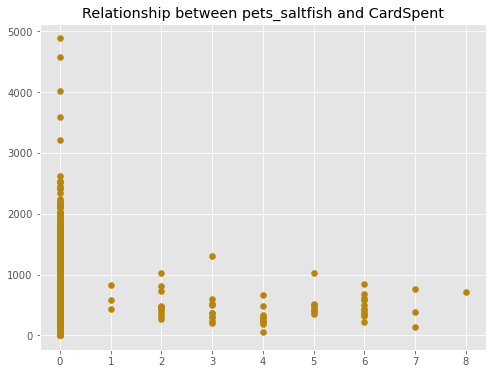

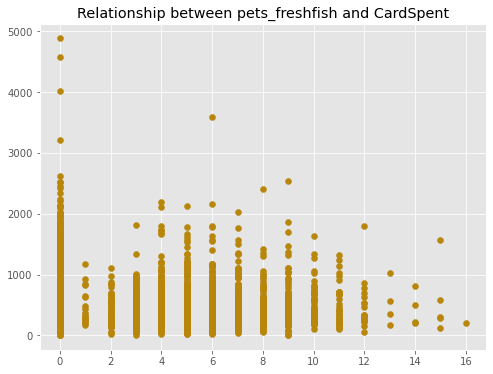

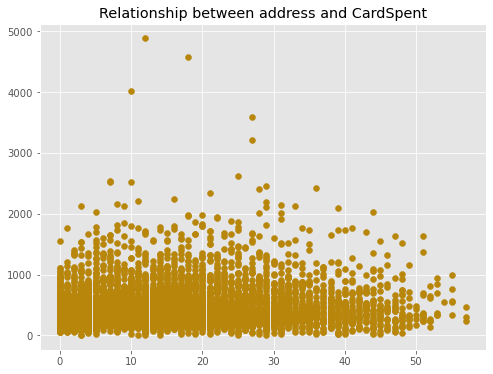

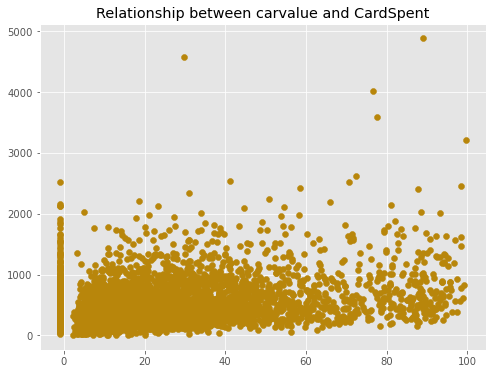

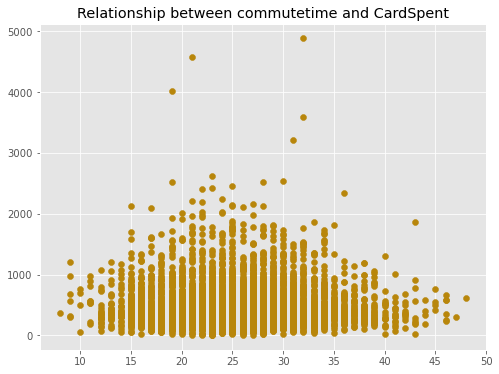

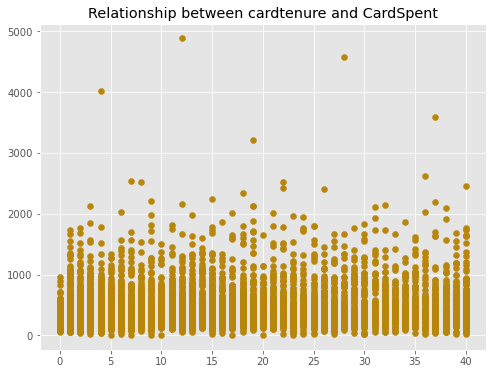

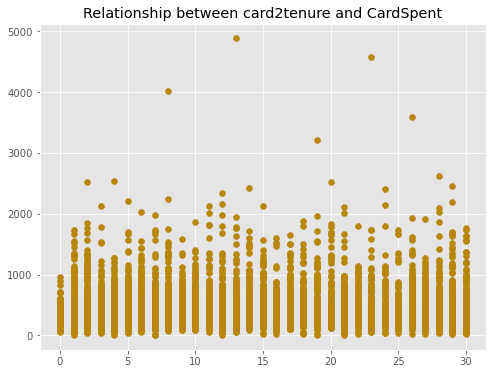

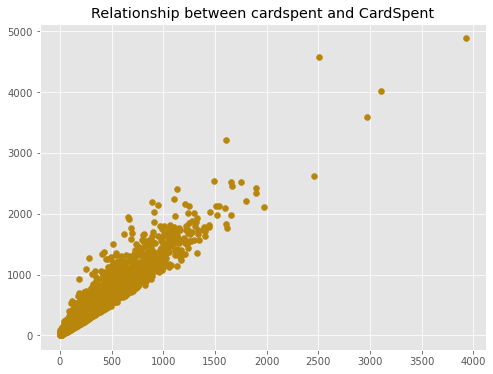

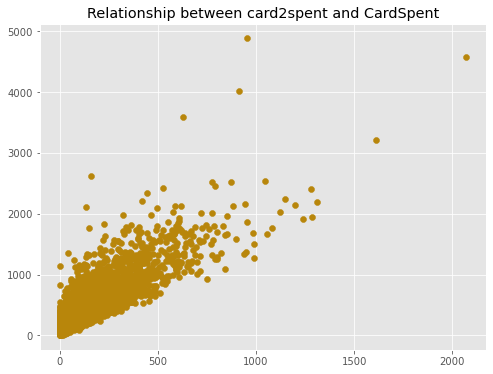

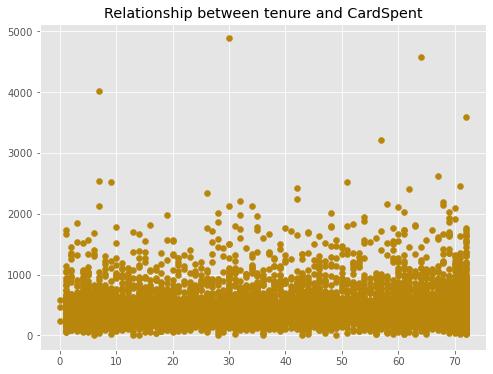

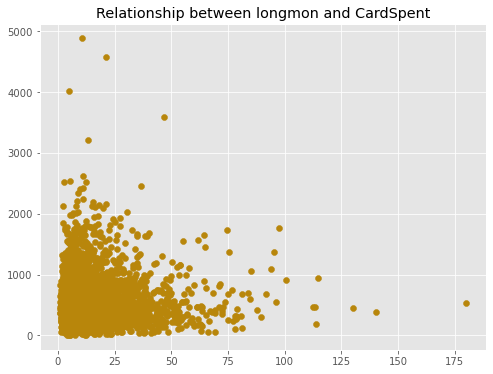

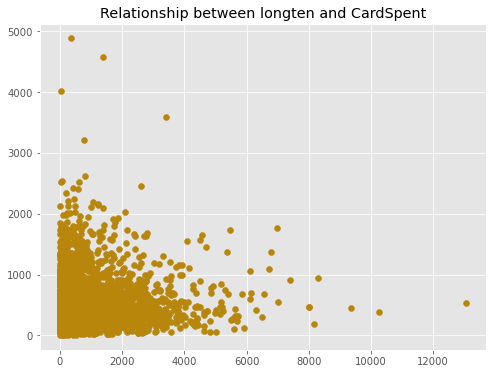

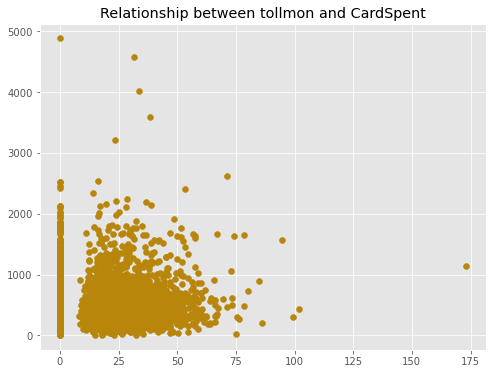

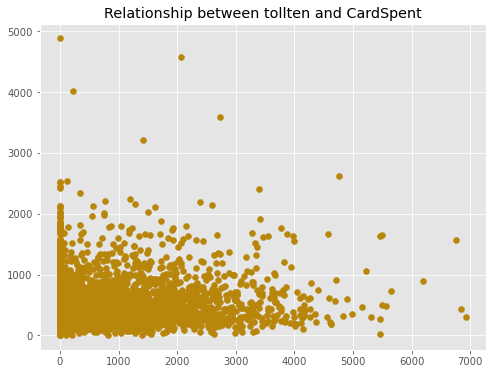

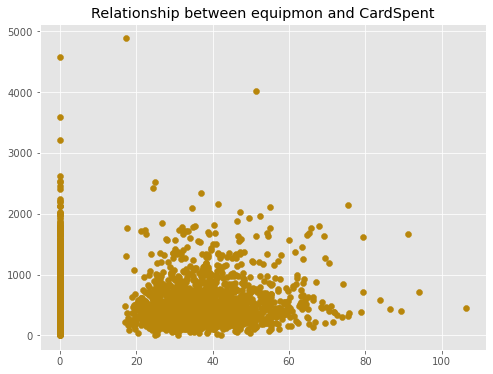

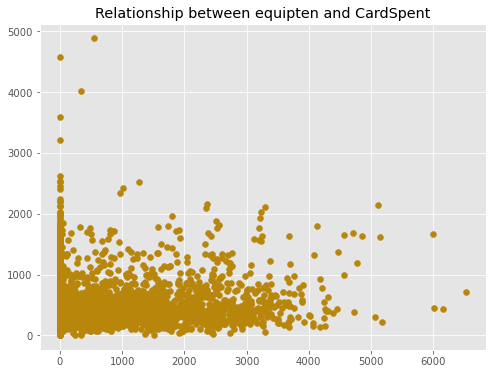

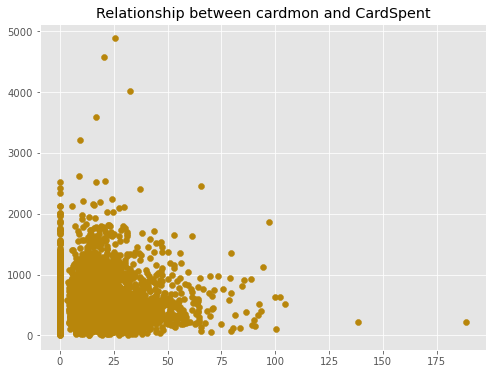

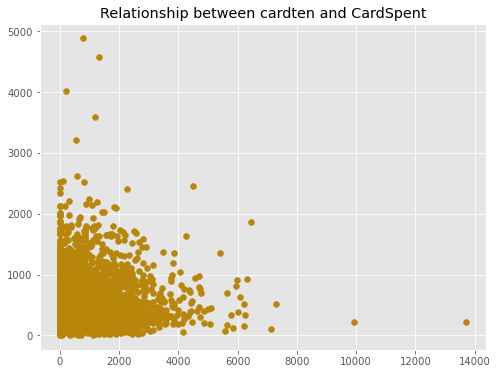

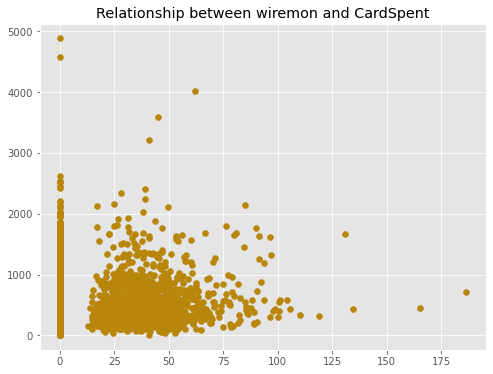

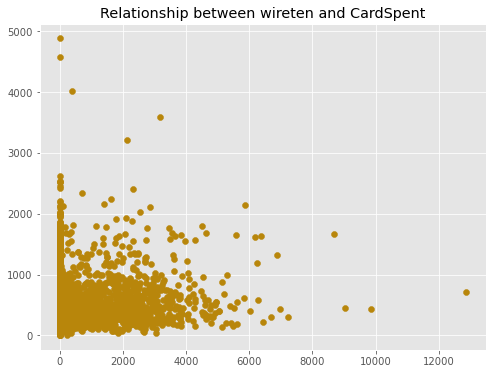

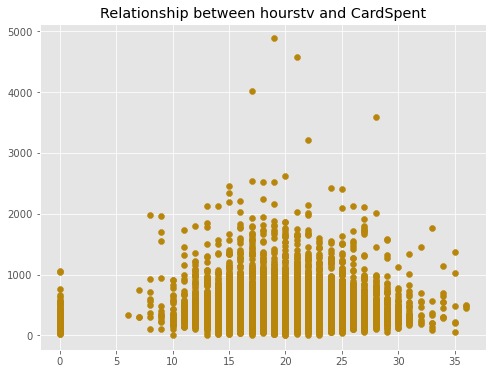

<Figure size 576x432 with 0 Axes>

In [22]:
plt.rcParams["figure.figsize"] = 8,6
for i in numerical_var:
    plt.scatter(df[i], y, color='darkgoldenrod')
    plt.title('Relationship between {} and CardSpent'.format(i))
    plt.show()
    
plt.tight_layout()

#### Relationship between Categorical Independent Variables and the Target Variable : CardSpent

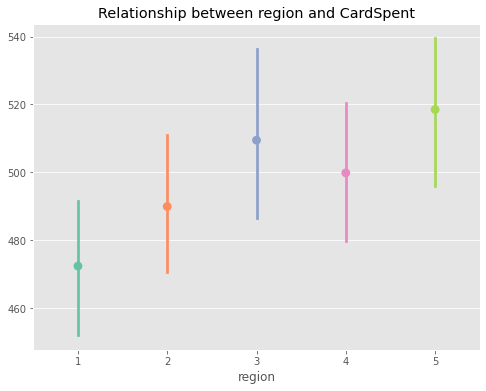

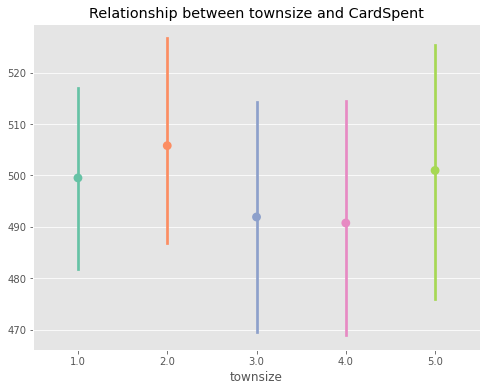

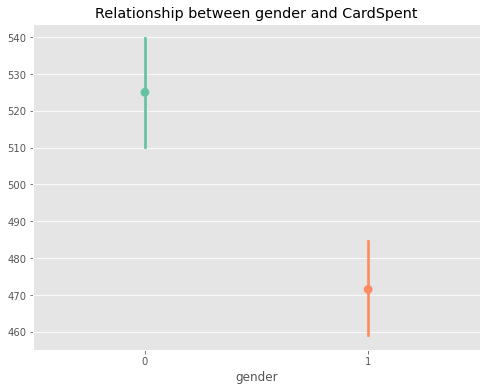

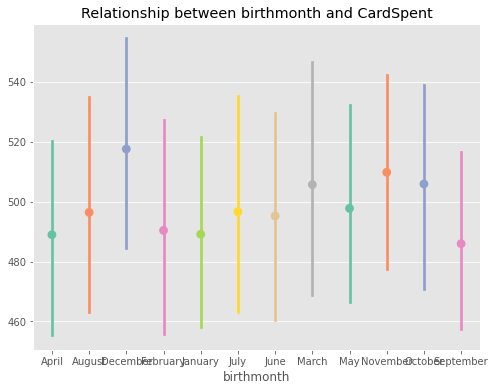

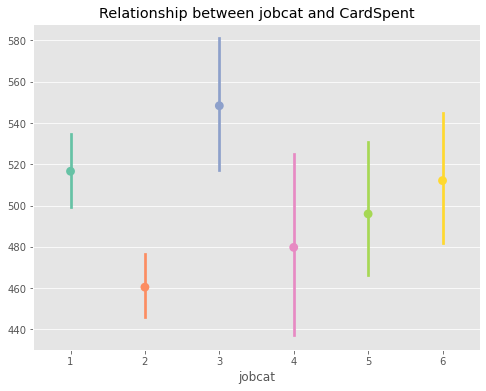

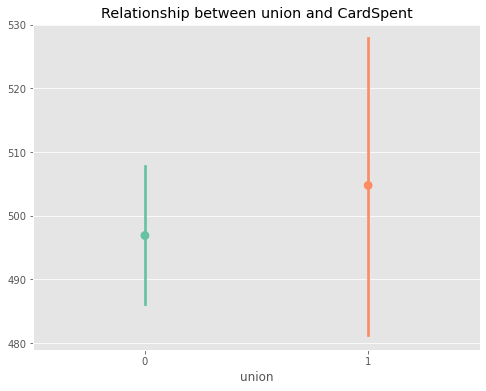

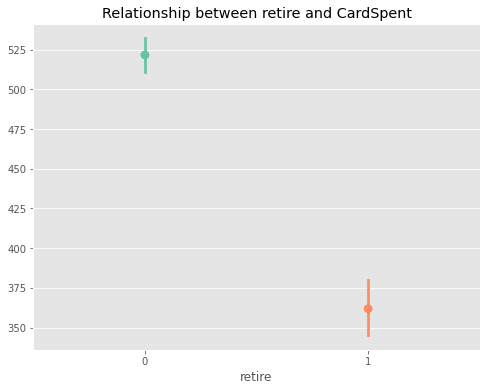

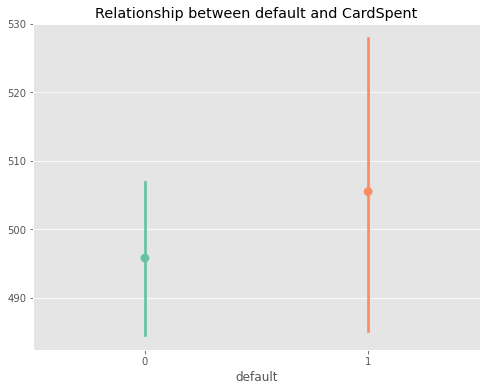

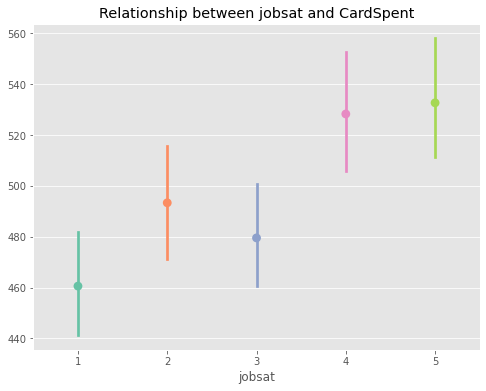

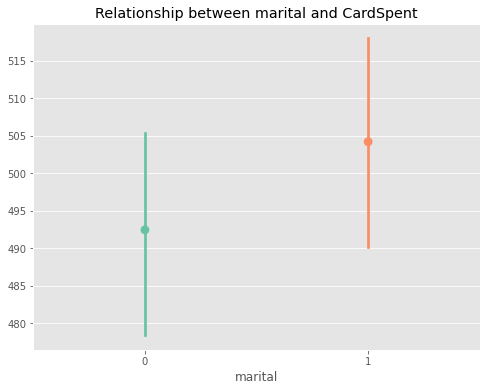

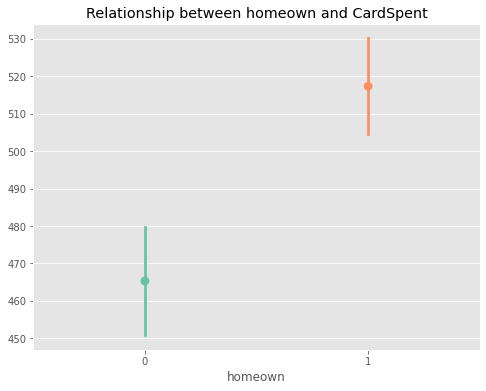

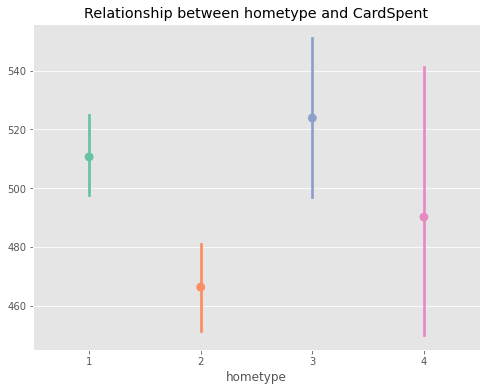

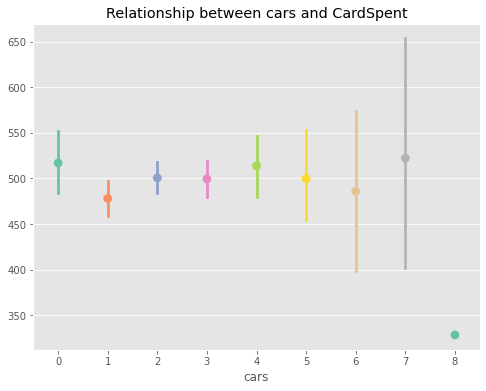

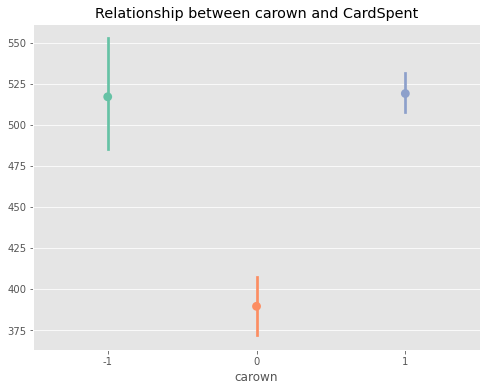

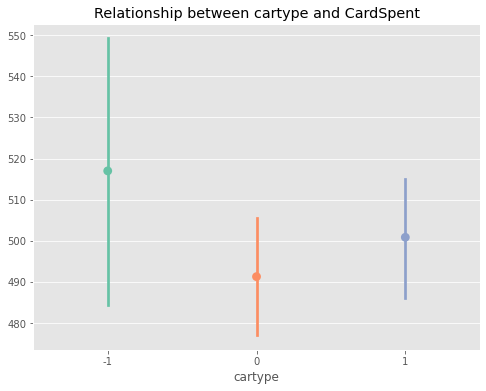

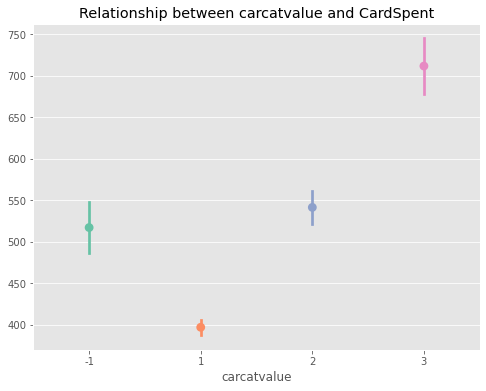

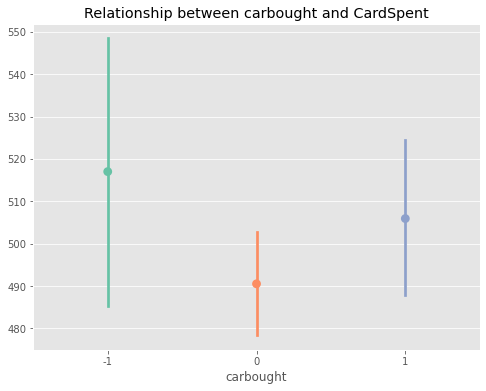

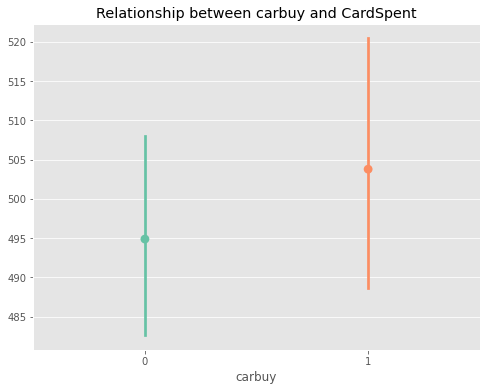

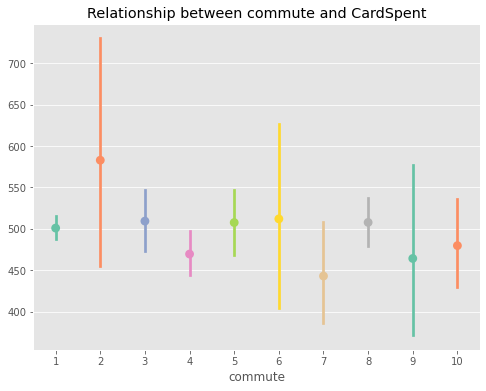

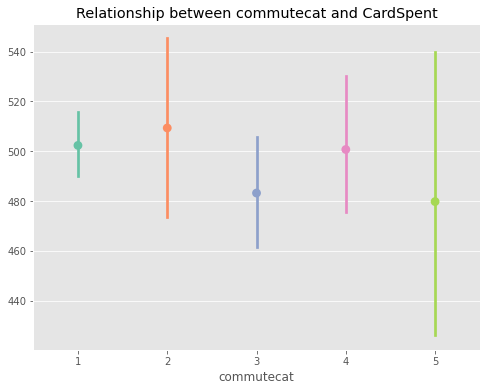

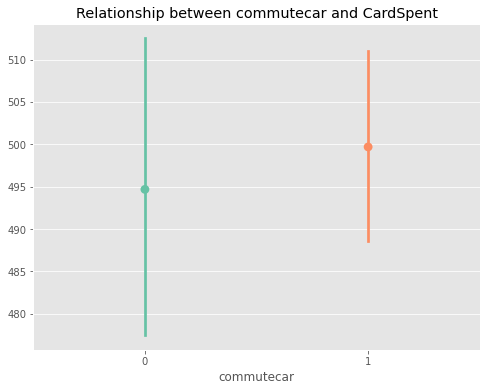

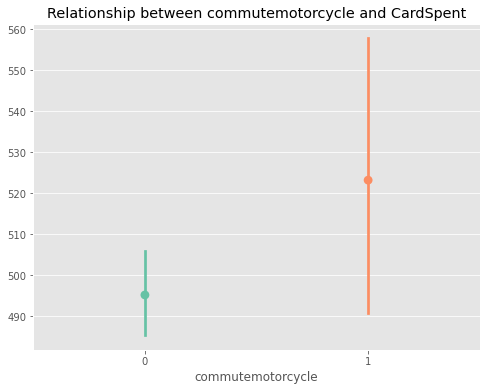

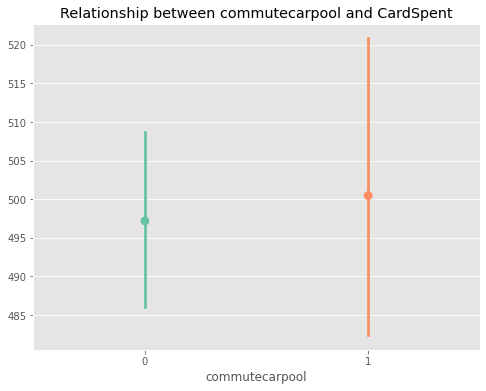

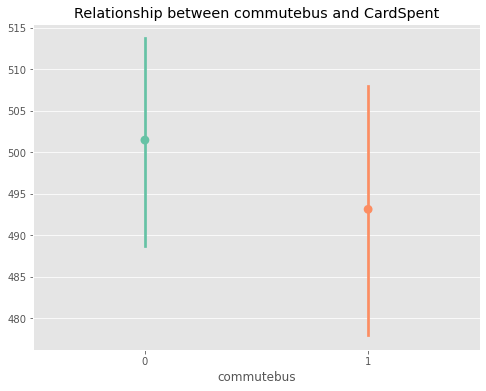

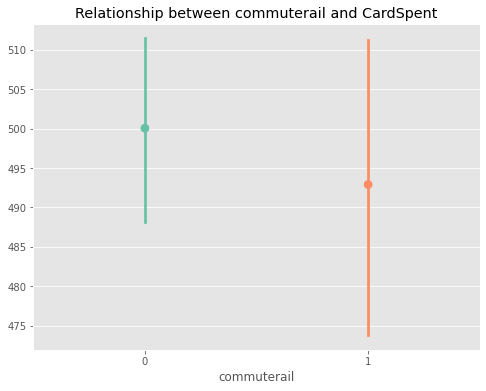

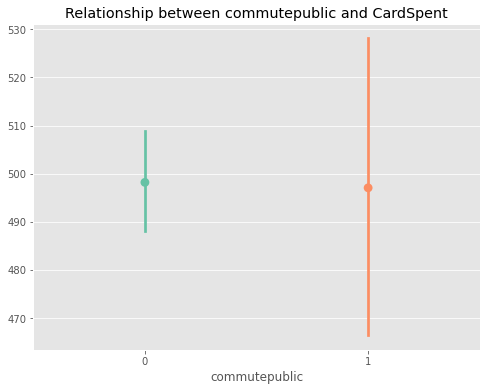

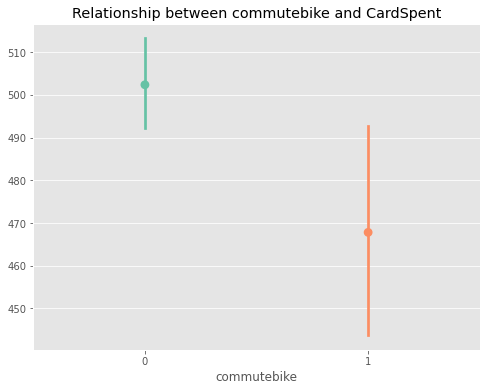

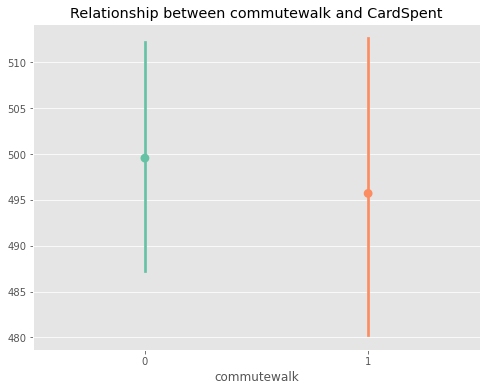

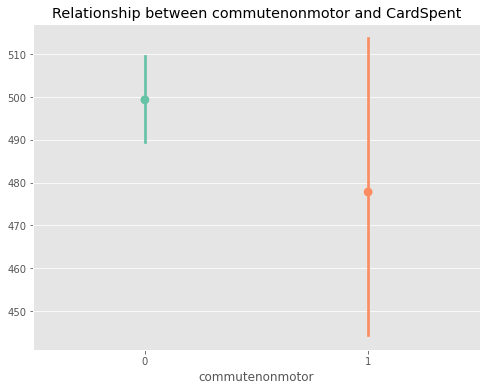

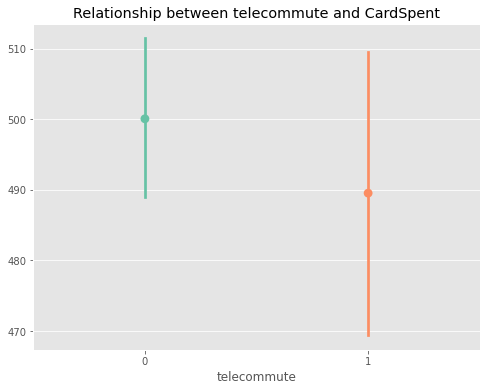

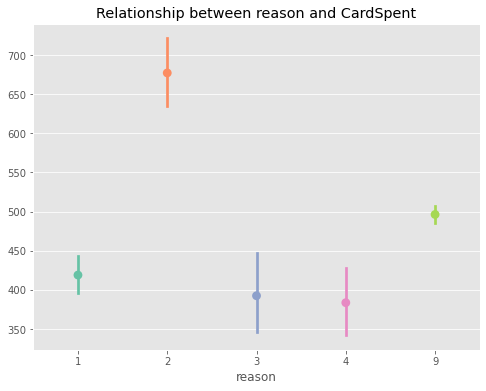

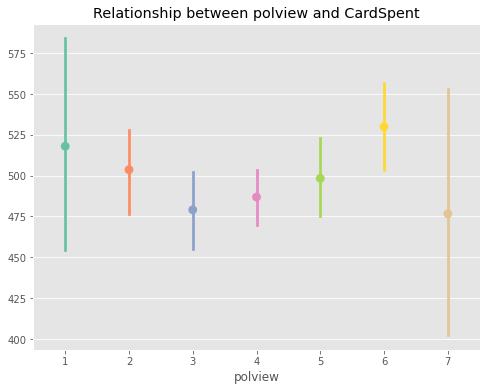

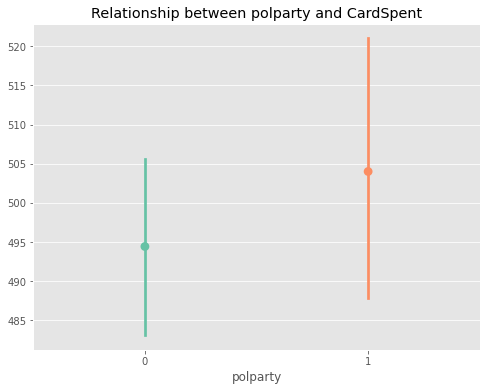

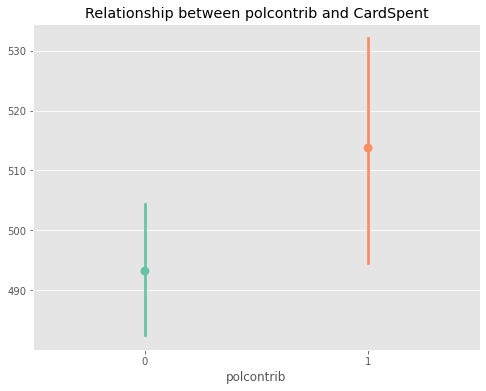

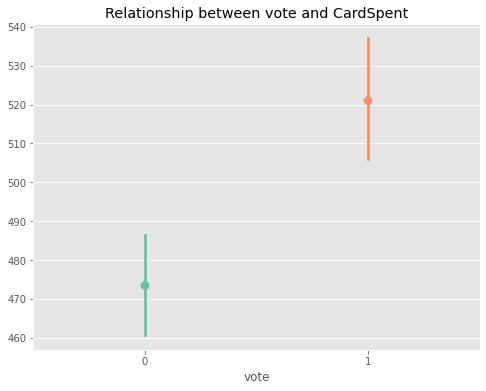

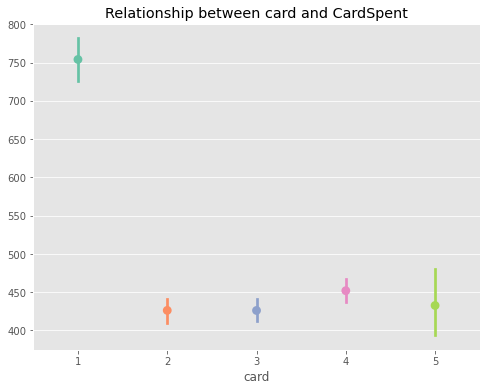

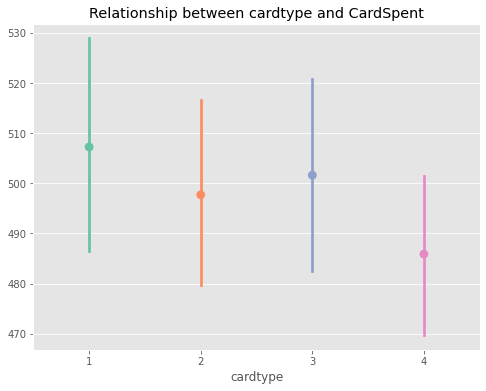

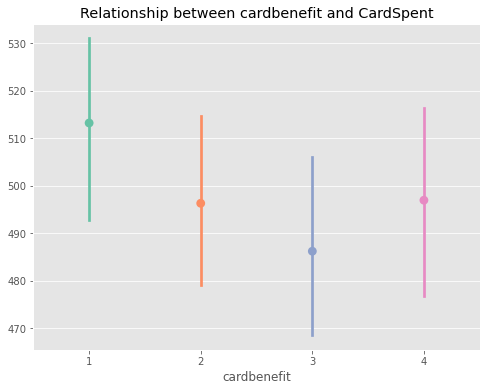

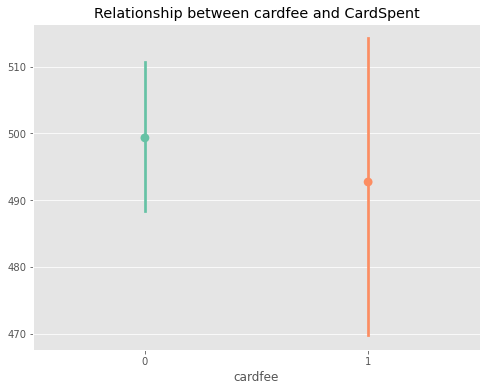

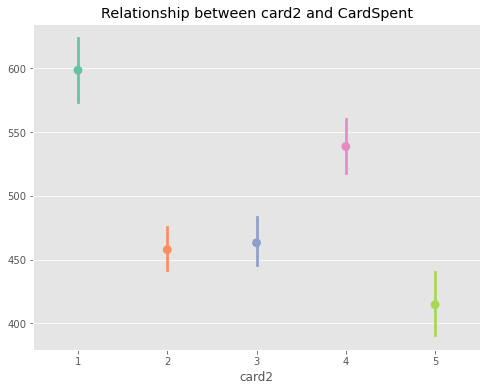

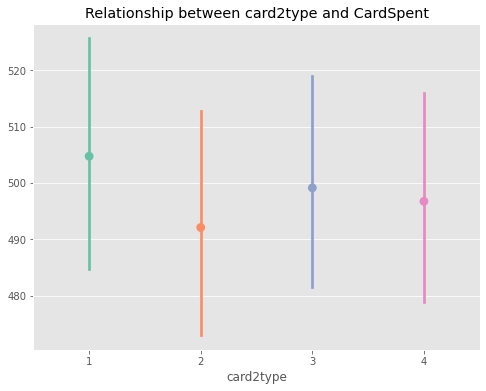

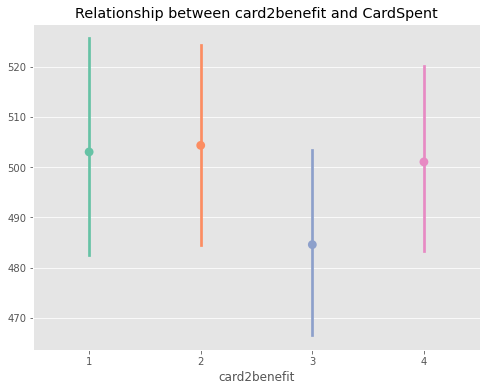

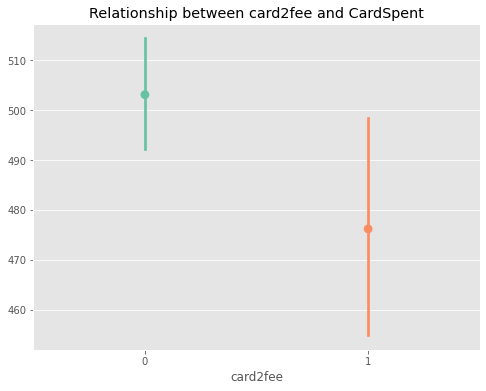

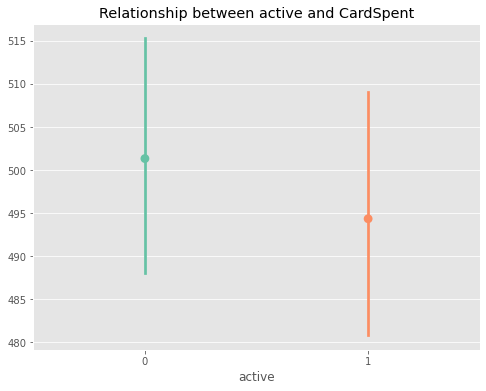

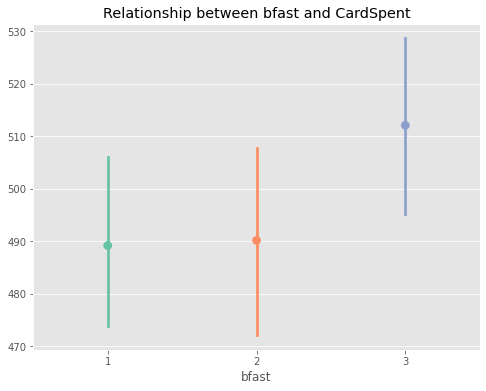

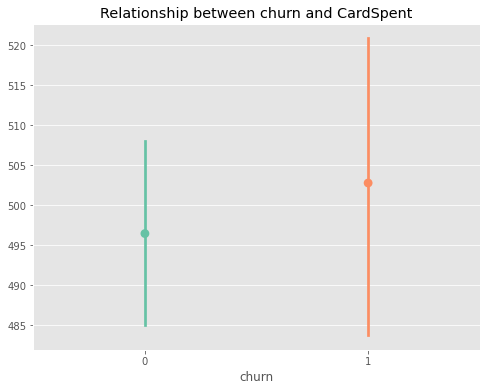

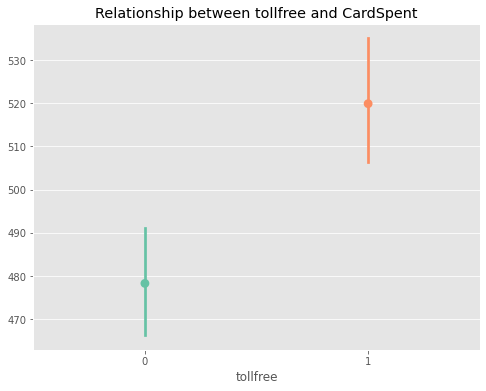

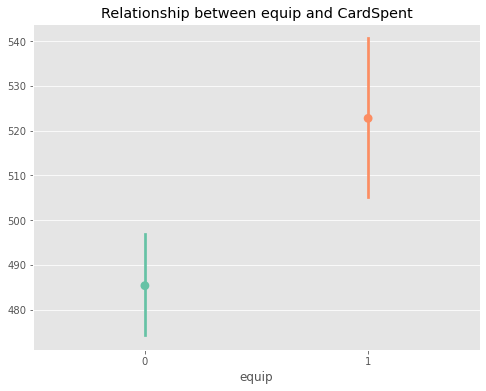

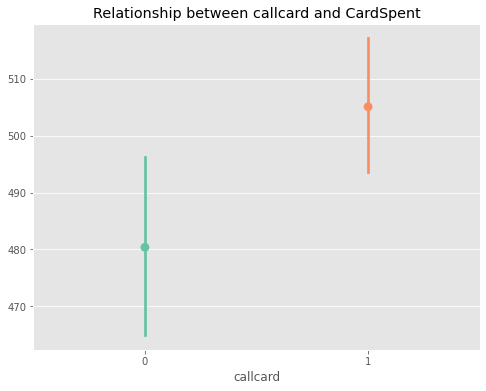

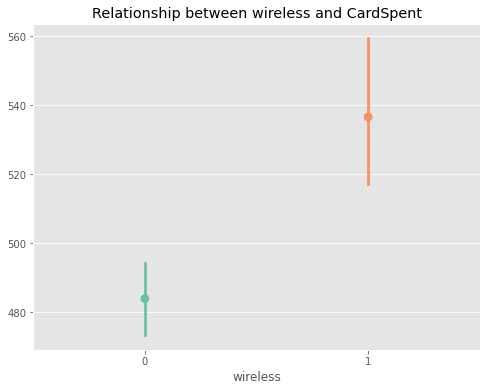

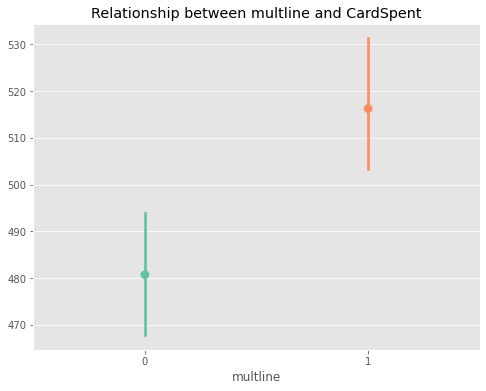

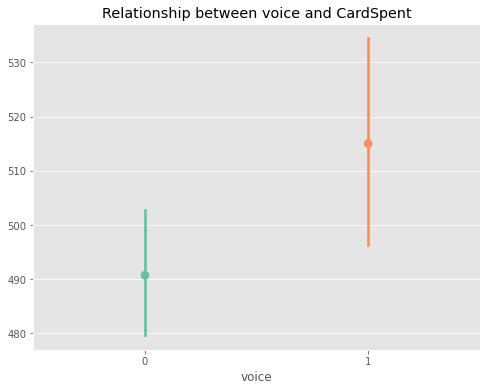

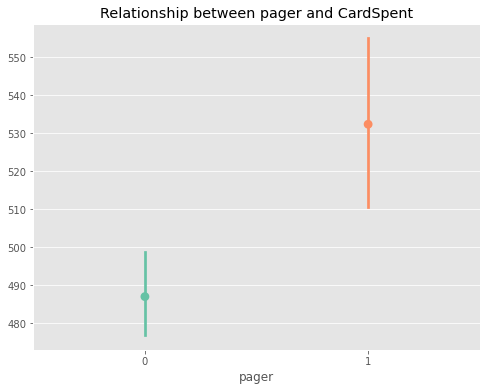

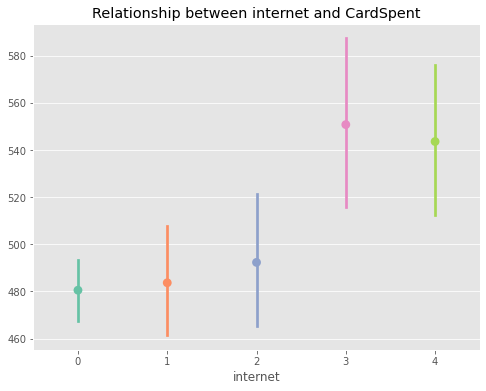

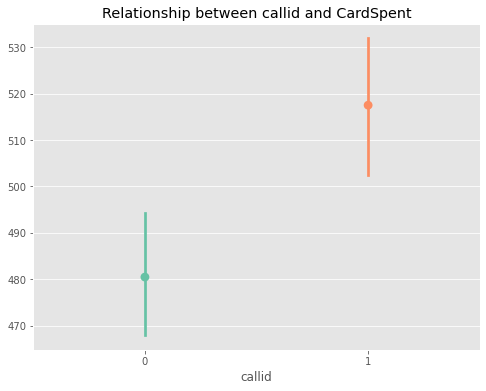

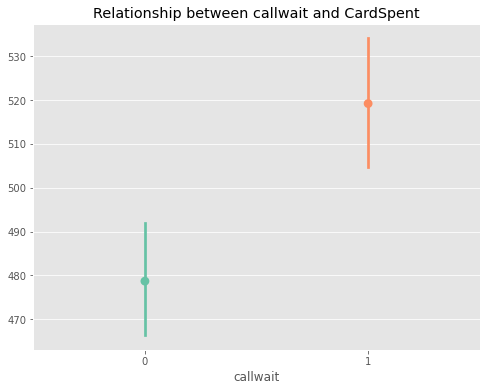

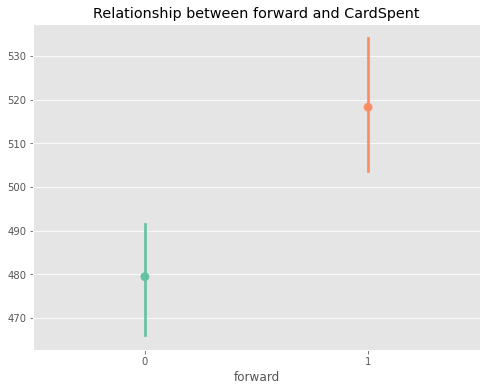

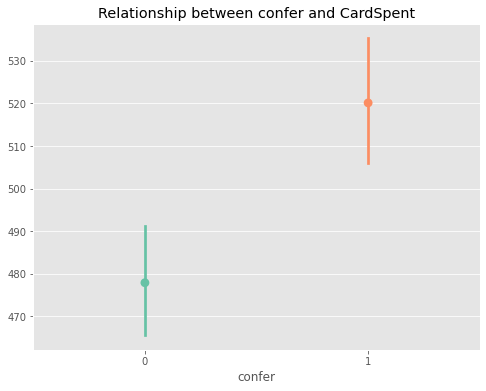

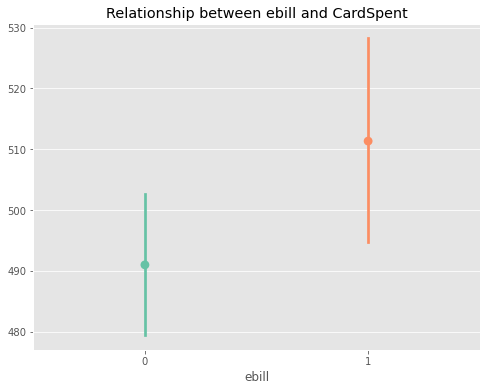

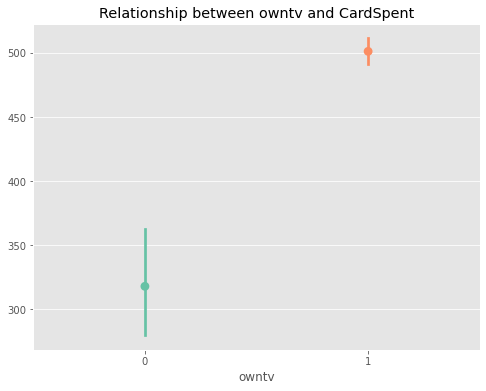

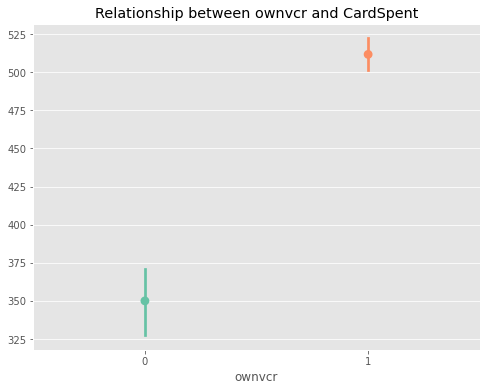

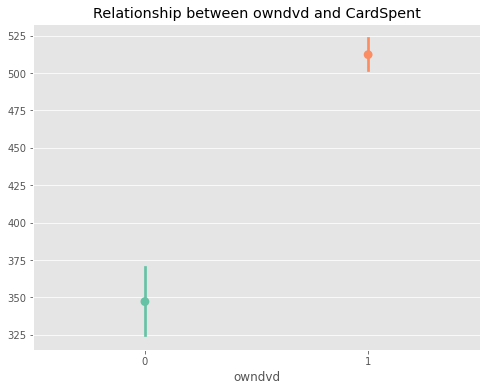

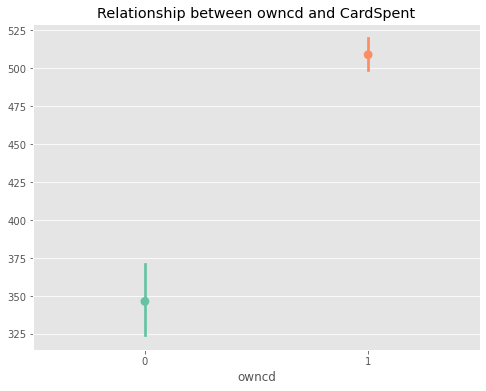

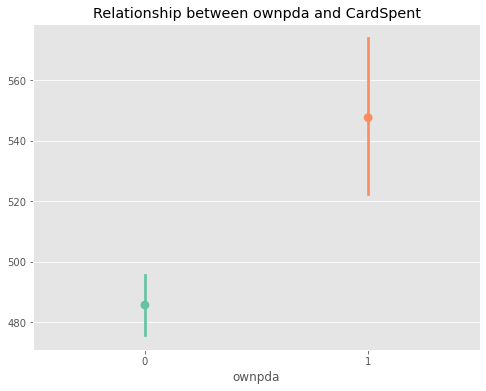

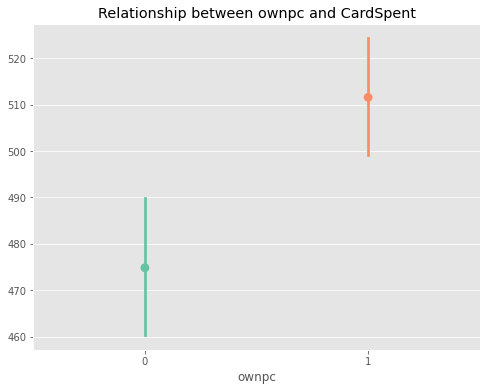

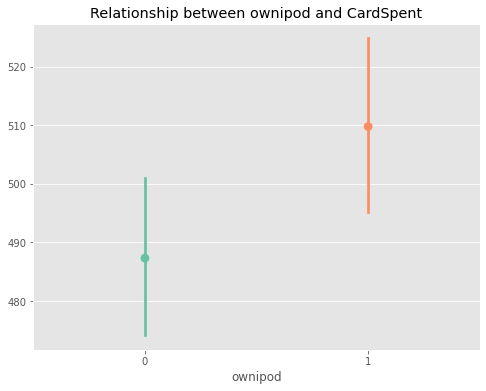

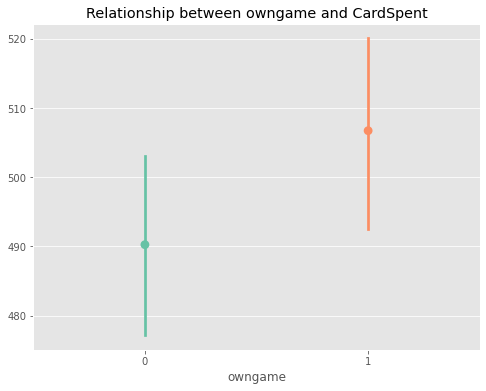

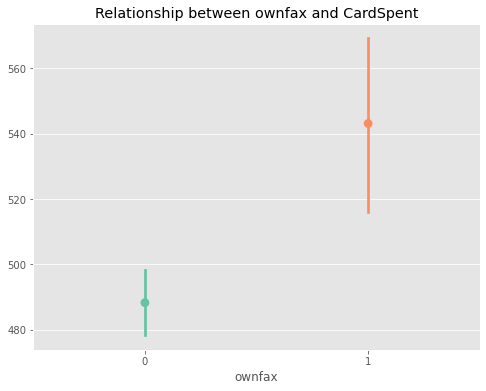

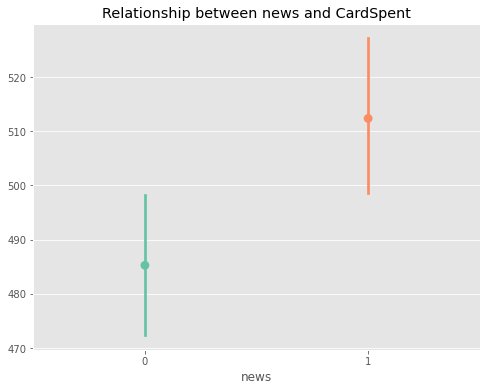

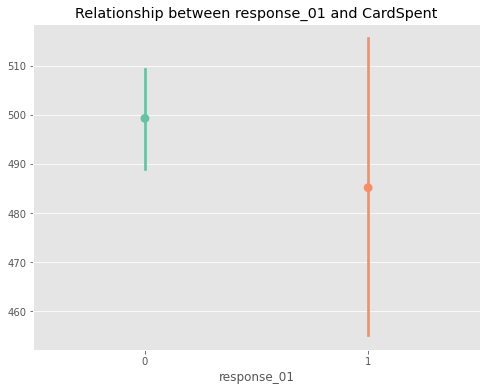

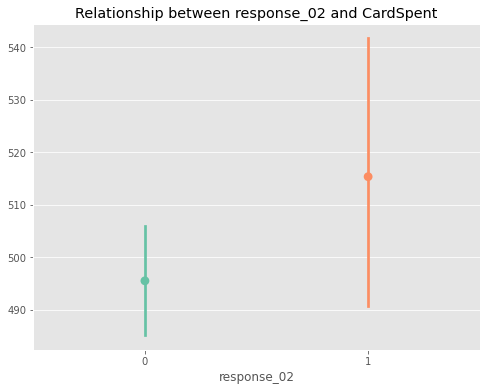

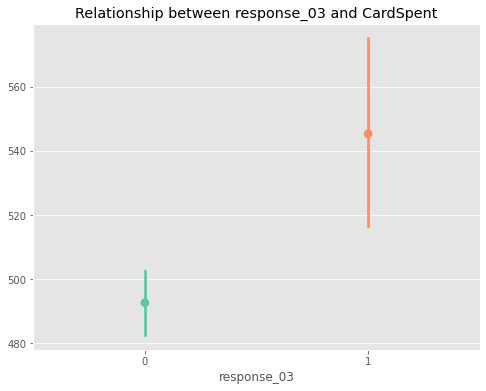

<Figure size 576x432 with 0 Axes>

In [23]:
plt.rcParams["figure.figsize"] = 8,6
for i in cat_var:
    sns.pointplot(df[i], y, palette='Set2')
    plt.title('Relationship between {} and CardSpent'.format(i))
    plt.show()
    
plt.tight_layout()

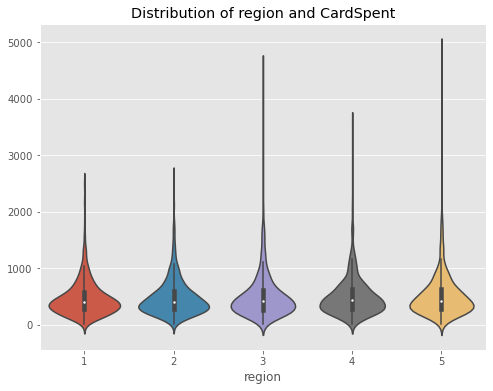

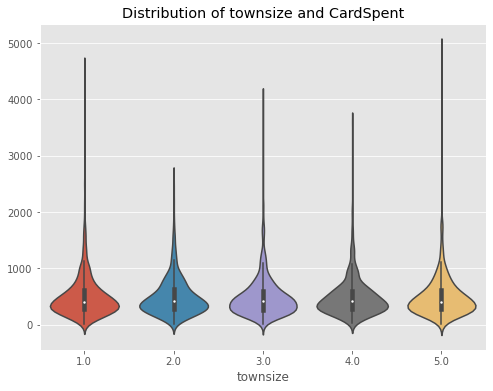

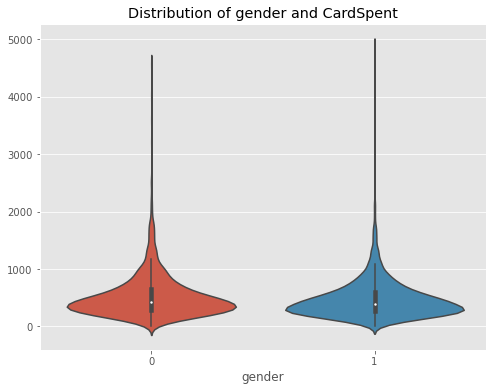

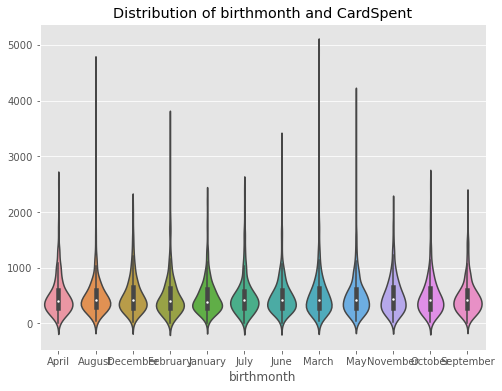

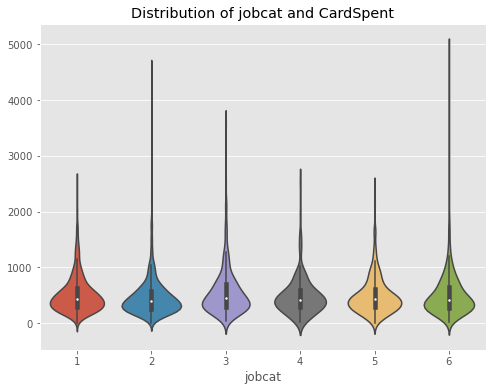

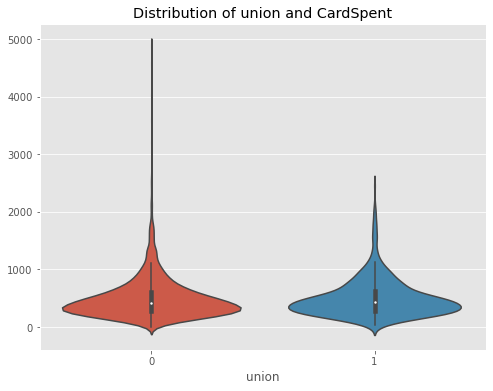

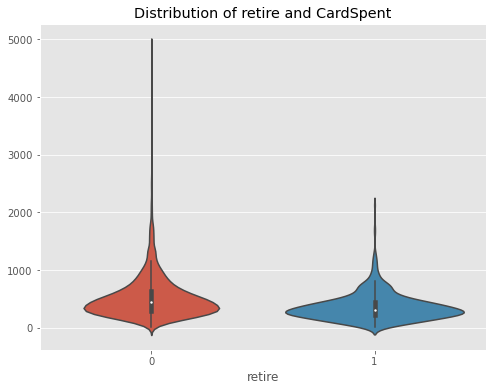

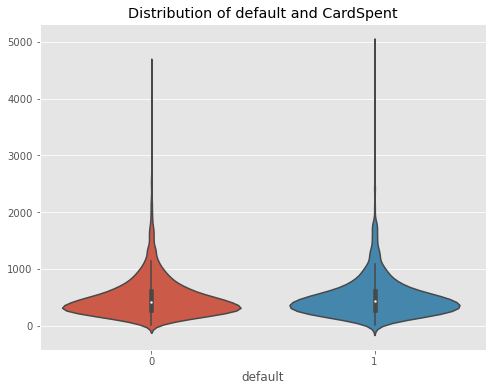

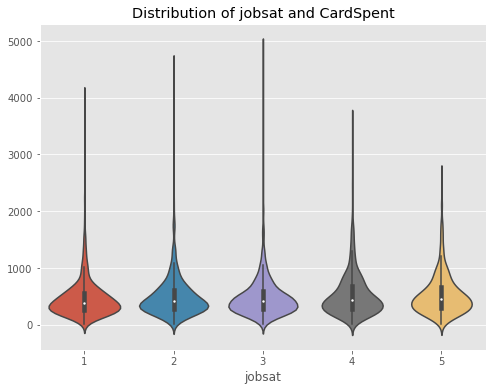

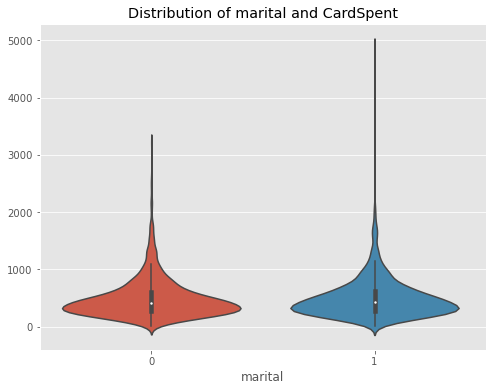

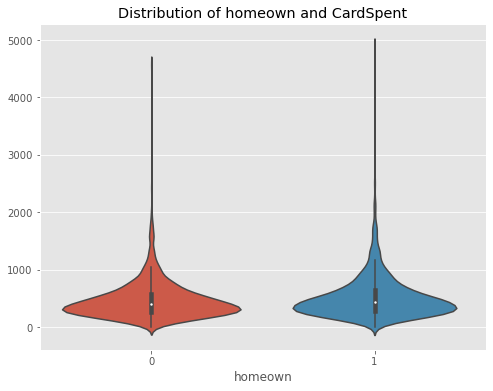

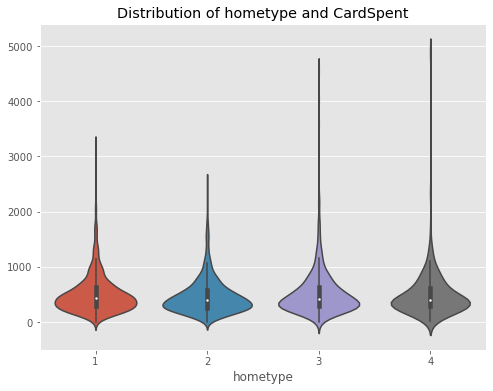

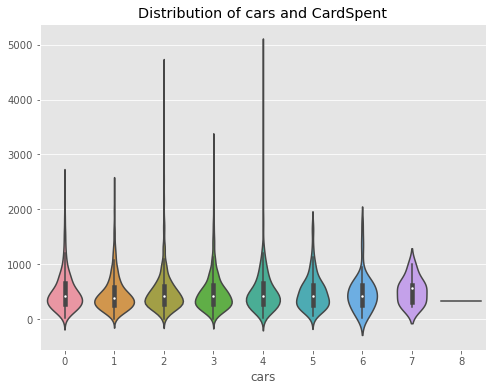

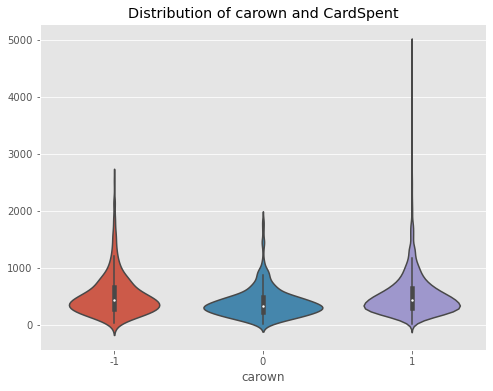

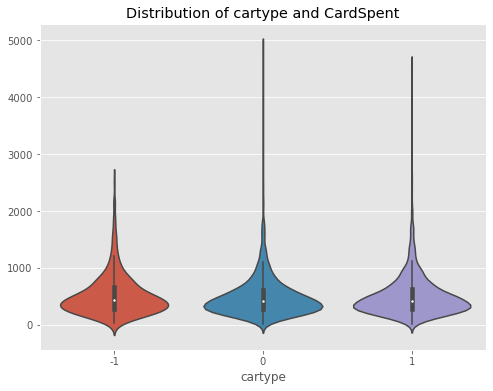

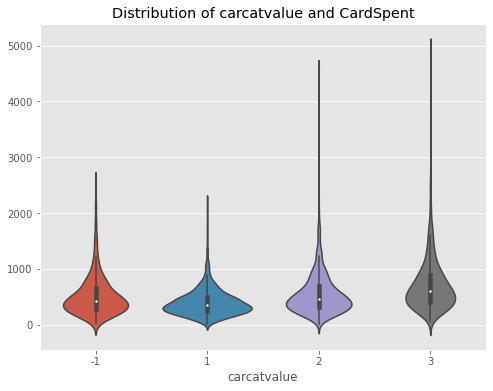

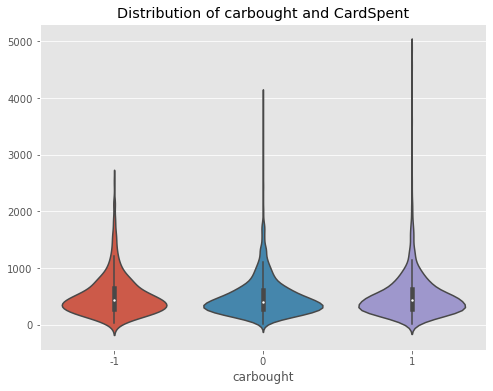

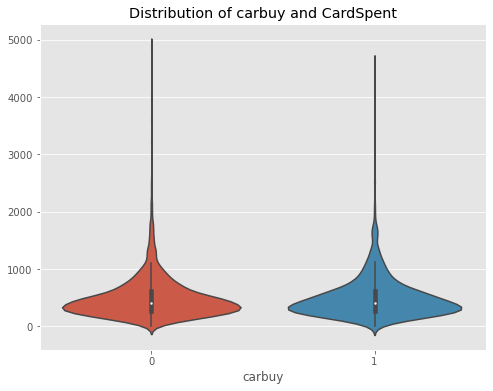

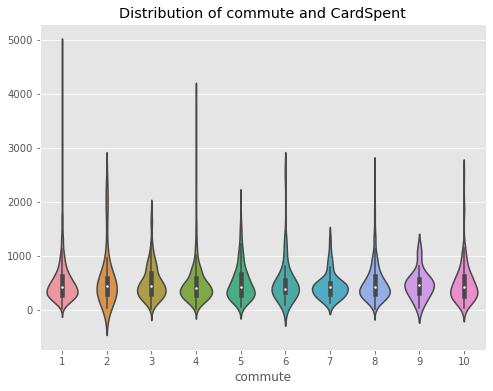

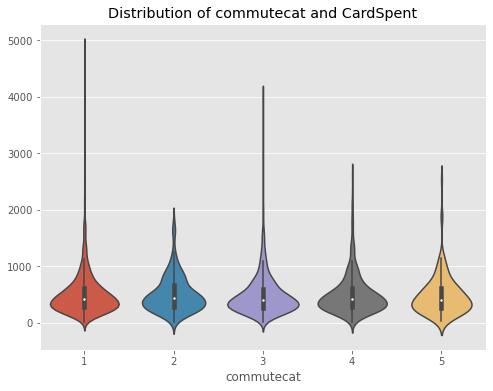

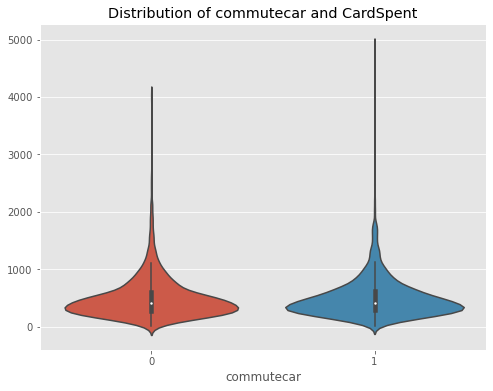

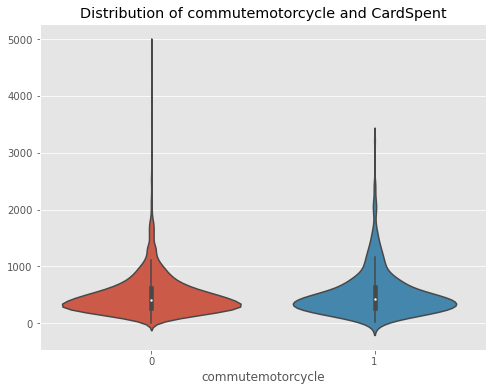

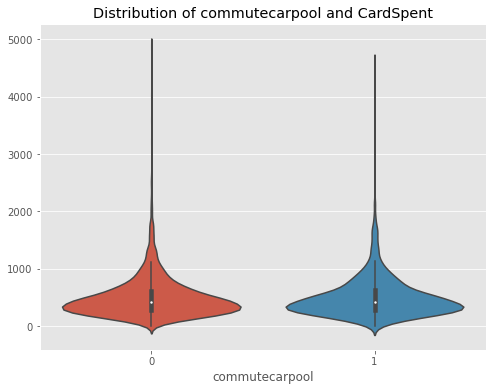

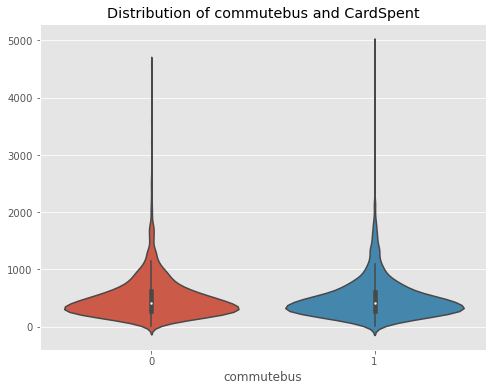

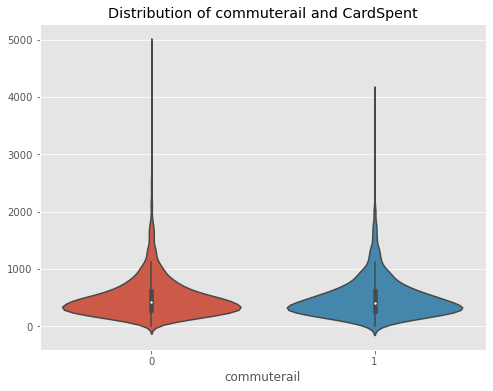

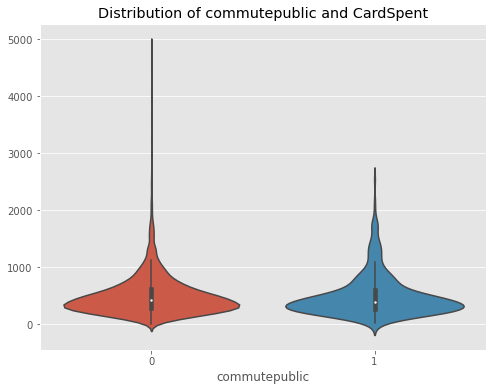

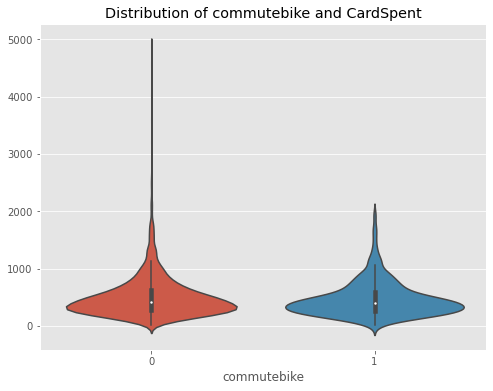

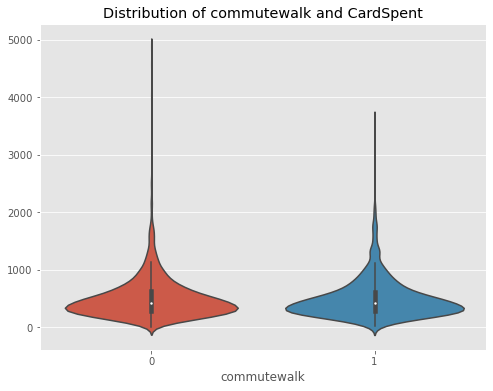

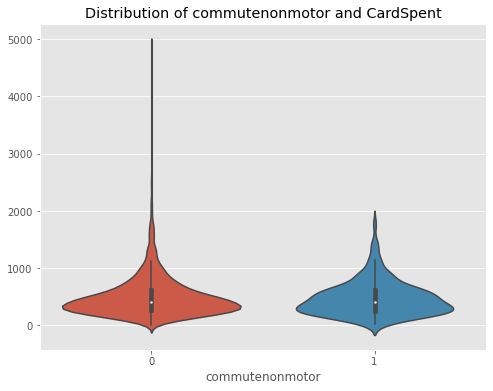

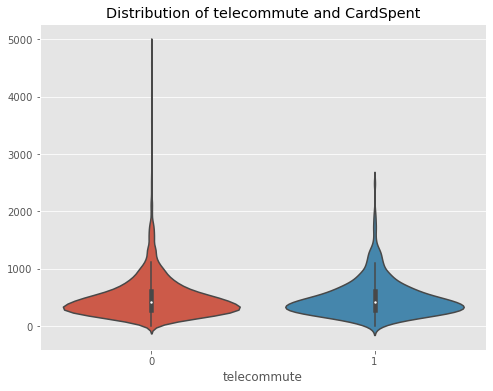

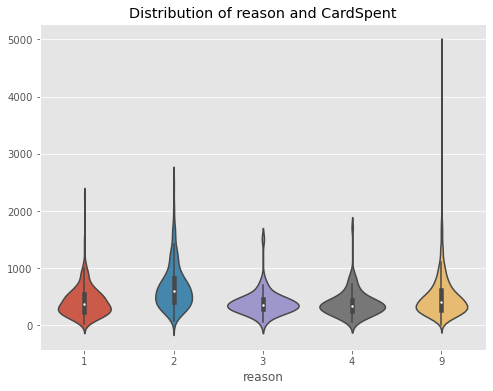

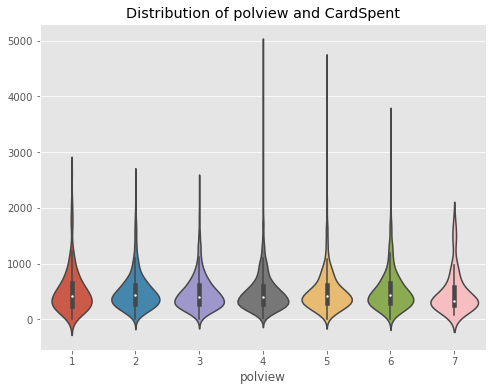

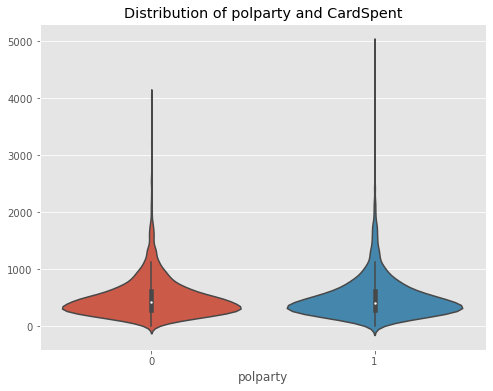

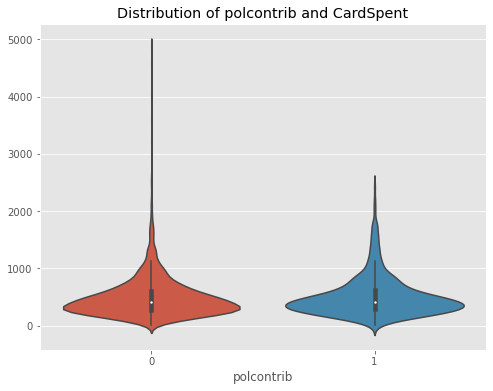

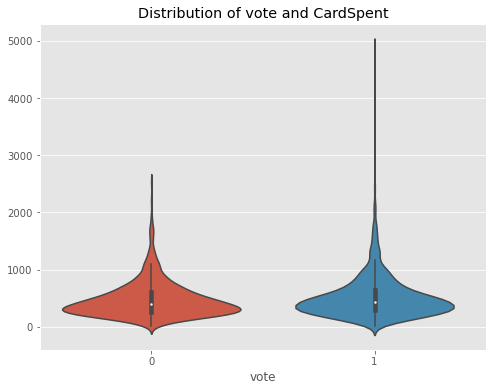

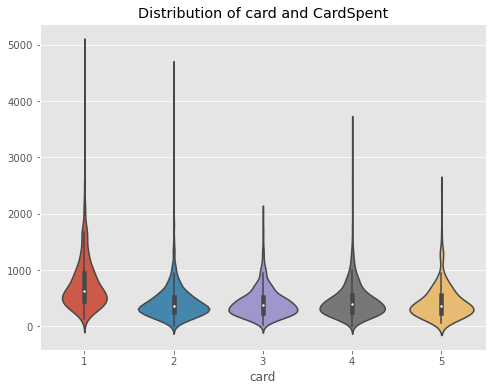

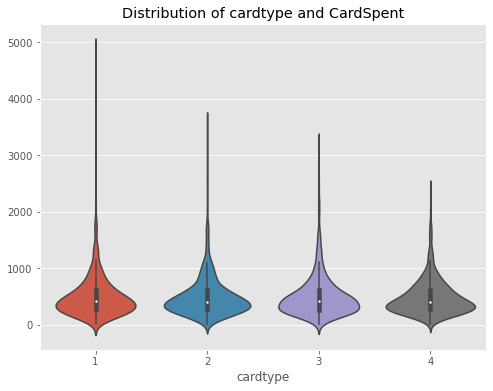

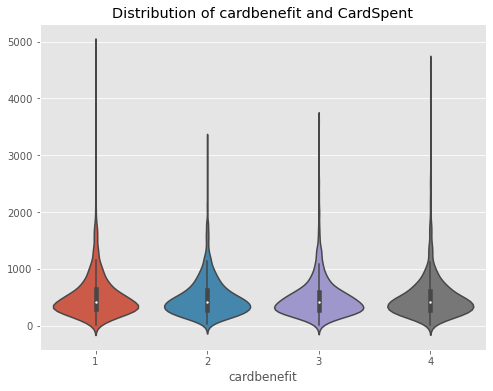

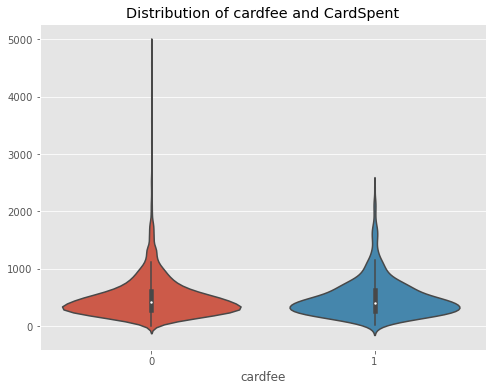

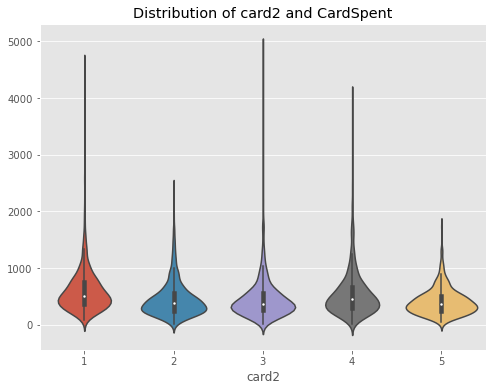

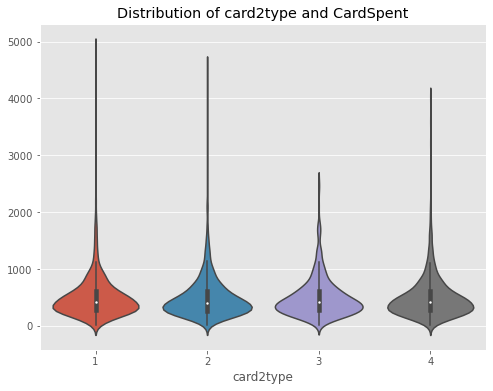

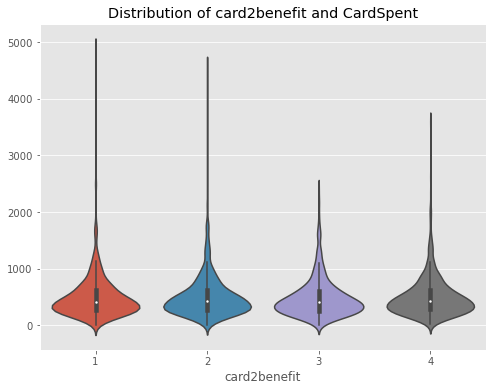

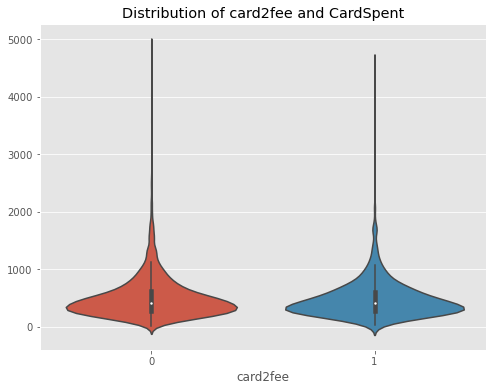

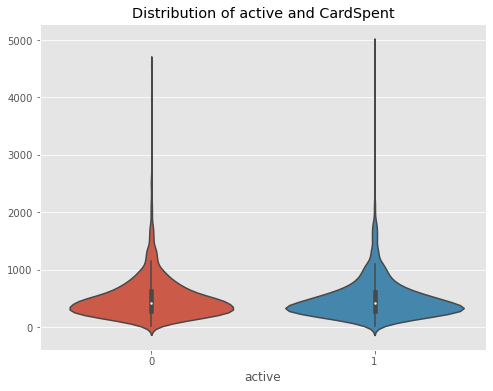

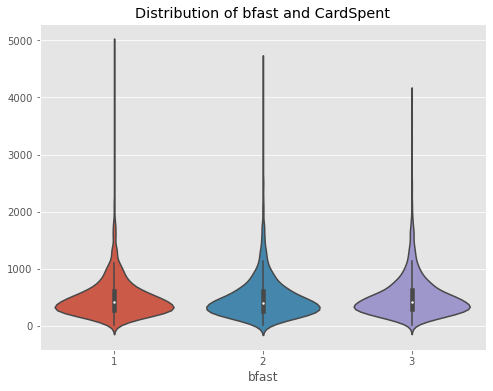

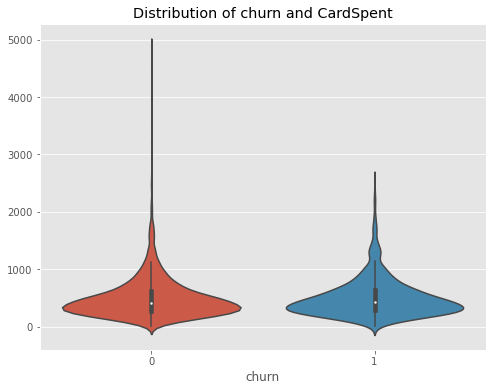

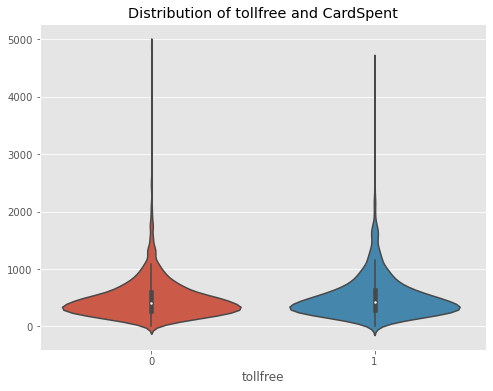

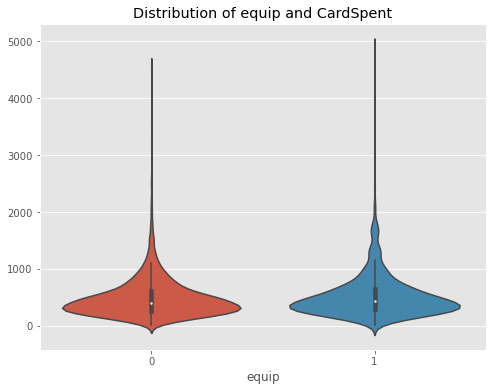

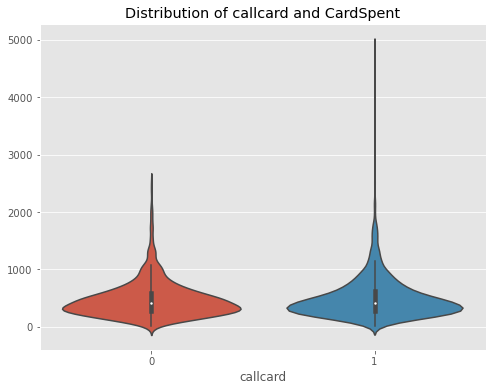

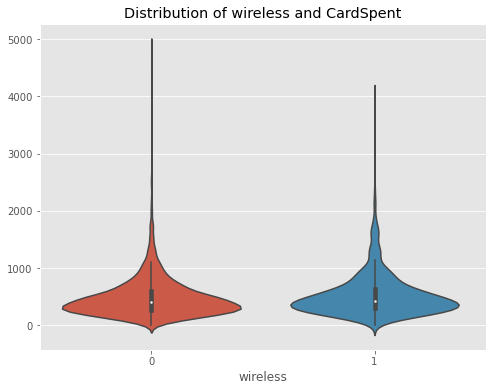

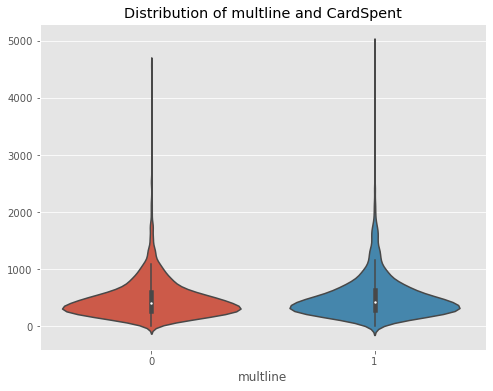

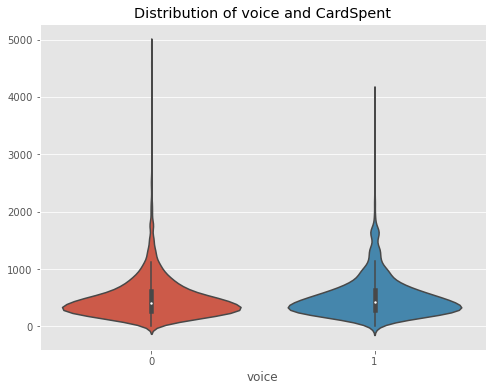

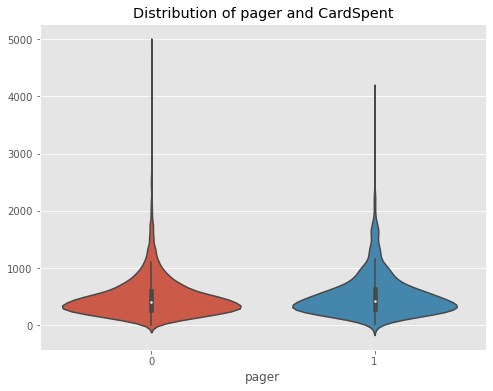

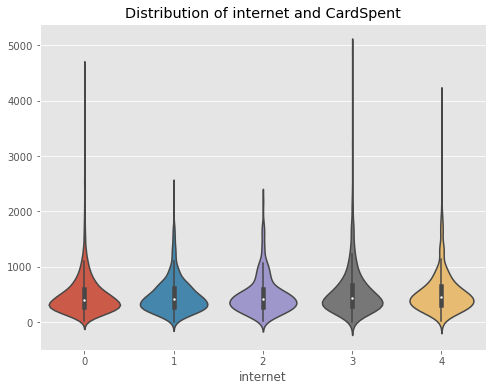

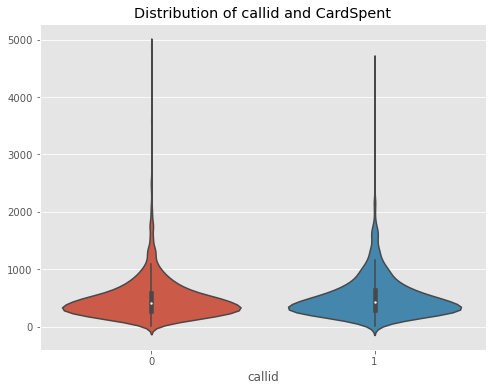

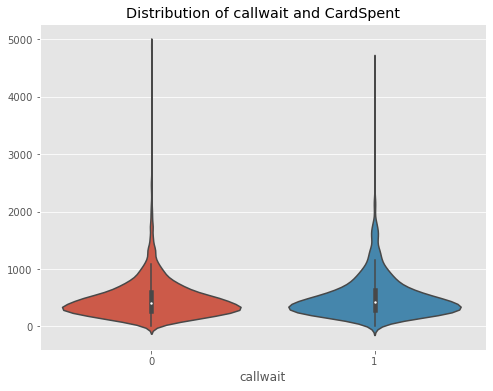

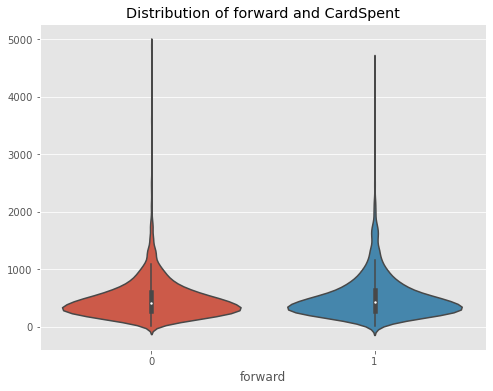

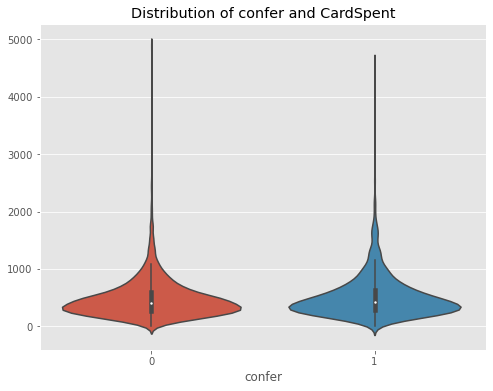

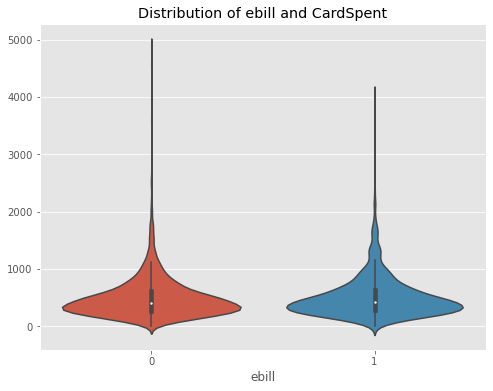

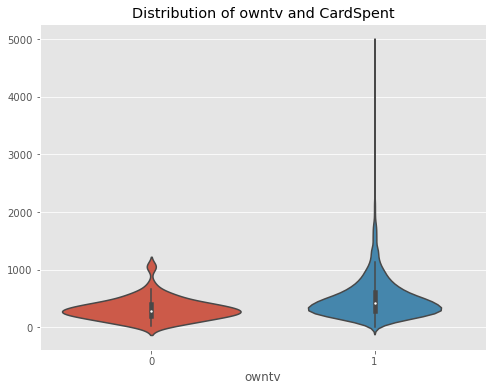

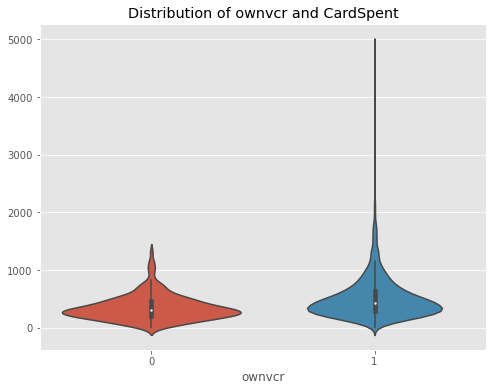

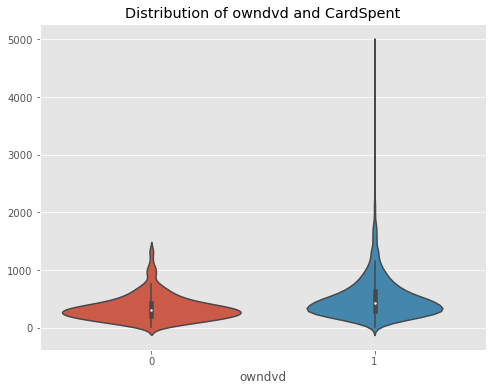

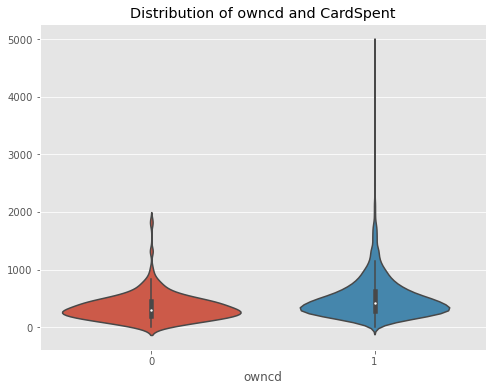

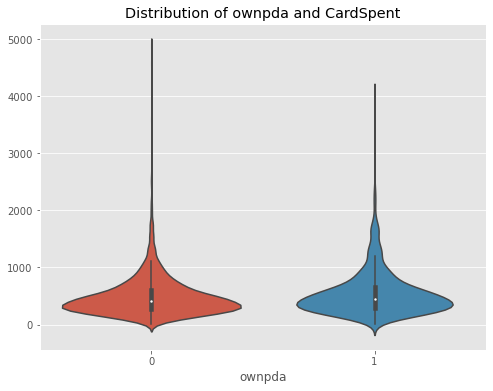

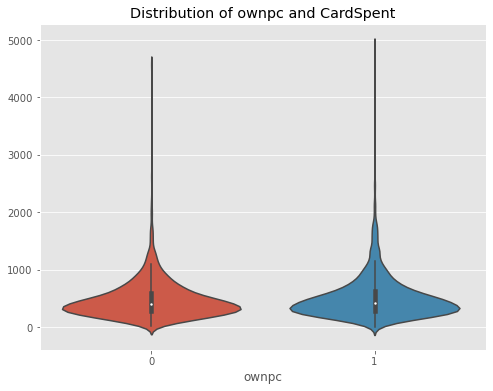

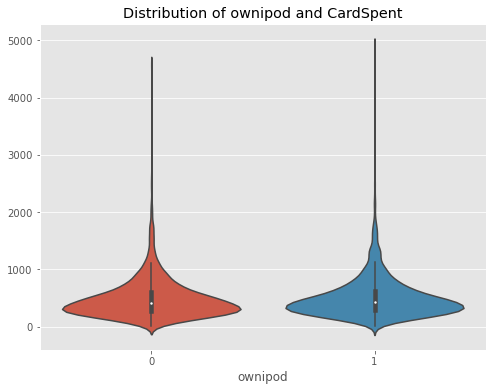

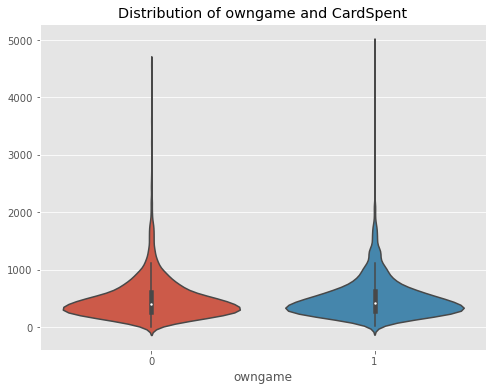

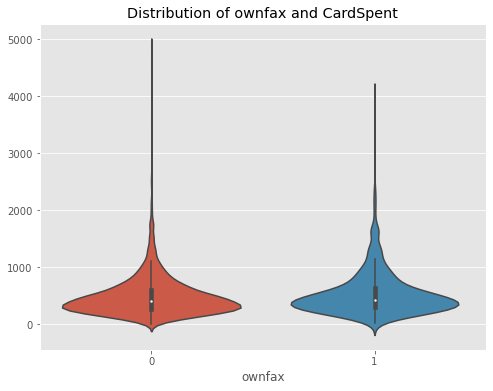

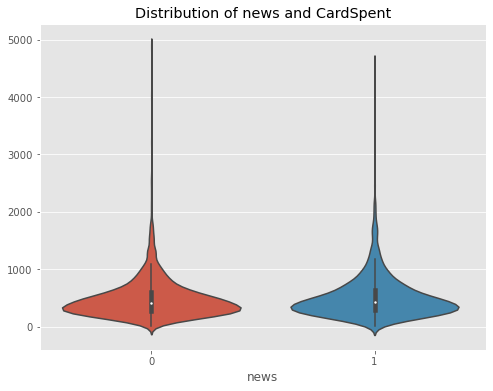

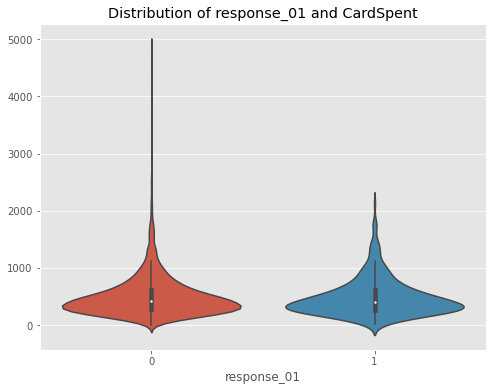

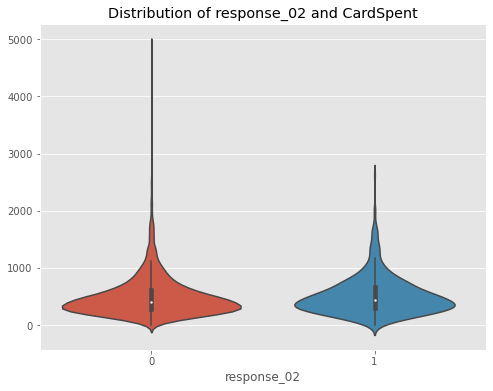

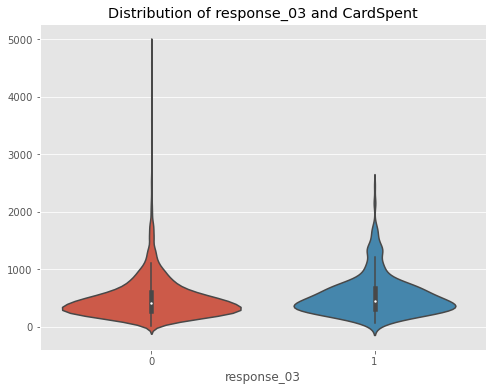

<Figure size 576x432 with 0 Axes>

In [24]:
plt.rcParams["figure.figsize"] = 8,6
for i in cat_var:
    sns.violinplot(df[i], y)
    plt.title('Distribution of {} and CardSpent'.format(i))
    plt.show()
    
plt.tight_layout()

### Data Preparation:

### 1. Missing Values

In [25]:
# checking for null values

total = df.isnull().sum()

count= len(df)

percent = (total/count)*100

missing_values = pd.concat([total, percent],axis=1, keys= ['Count of Missing Values', 'Percentage of Missing Values'])
missing_values = missing_values.sort_values('Count of Missing Values',ascending=False)

In [26]:
# Viewing the first 10 rows of the Missing Values

missing_values.head(10)

Count of Missing Values  Percentage of Missing Values
longten                            3                          0.06
cardten                            2                          0.04
commutetime                        2                          0.04
townsize                           2                          0.04
news                               0                          0.00
active                             0                          0.00
equip                              0                          0.00
tollten                            0                          0.00
tollmon                            0                          0.00
tollfree                           0                          0.00

For the missing values in variables: longten, cardten, commutetime, townsize will impute using either median for numerical variables or with mode for categorical variables.

In [27]:
df.townsize.mode()

0    1.0
Name: townsize, dtype: category
Categories (5, float64): [1.0, 2.0, 3.0, 4.0, 5.0]

In [28]:
df['townsize'] = df['townsize'].fillna(1.0)

In [29]:
d = ['longten','cardten','commutetime']

In [30]:
for i in d:
    df[i] = df[i].fillna(df[i].median())

In [31]:
# Crossing checking for Missing Values again:

df.isnull().sum().value_counts()

0    108
dtype: int64

In [32]:
# Removing Target variables from the numerical variables list: cardspent and card2spent
numerical_var.remove('cardspent')

In [33]:
numerical_var.remove('card2spent')

Now there are no missing values in the data.

In [34]:
# Independent variables:

X = df.drop(['cardspent','card2spent'], axis=1)
X.head()

region townsize gender  age birthmonth  ed jobcat union  employ retire  \
0      1      2.0      1   20  September  15      1     1       0      0   
1      5      5.0      0   22        May  17      2     0       0      0   
2      3      4.0      1   67       June  14      2     0      16      0   
3      4      3.0      0   23        May  16      2     0       0      0   
4      2      2.0      0   26       July  16      2     0       1      0   

   income  debtinc  creddebt   othdebt default jobsat marital  spoused  \
0      31     11.1  1.200909  2.240091       1      1       0       -1   
1      15     18.6  1.222020  1.567980       1      1       0       -1   
2      35      9.9  0.928620  2.536380       0      4       1       13   
3      20      5.7  0.022800  1.117200       1      2       1       18   
4      23      1.7  0.214659  0.176341       0      1       1       13   

   reside  pets  pets_cats  pets_dogs  pets_birds  pets_reptiles  pets_small  \
0       3     0          0          0           0              0           0   
1       2     6          0          0           0              0           0   
2       3     3          2          1           0              0           0   
3       5     0          0          0           0              0           0   
4       4     0          0          0           0              0           0   

   pets_saltfish  pets_freshfish homeown hometype  address cars carown  \
0              0               0       0        2        0    2      1   
1              0               6       1        3        2    2      1   
2              0               0       1        1       30    3      1   
3              0               0       1        3        3    3      1   
4              0               0       0        2        3    1      0   

  cartype  carvalue carcatvalue carbought carbuy commute commutecat  \
0       0      14.3           1         0      0       8          4   
1       1       6.8           1         0      0       1          1   
2       1      18.8           1         0      1       4          3   
3       1       8.7           1         0      1       1          1   
4       1      10.6           1         0      1       6          3   

   commutetime commutecar commutemotorcycle commutecarpool commutebus  \
0         22.0          0                 1              1          0   
1         29.0          1                 0              0          1   
2         24.0          1                 0              1          1   
3         38.0          1                 0              0          0   
4         32.0          0                 0              0          0   

  commuterail commutepublic commutebike commutewalk commutenonmotor  \
0           0             0           0           1               0   
1           0             0           1           0               1   
2           1             0           0           0               0   
3           0             0           0           0               0   
4           0             1           0           1               0   

  telecommute reason polview polparty polcontrib vote card cardtype  \
0           0      9       6        1          0    1    3        1   
1           1      9       4        1          0    0    2        4   
2           0      2       5        1          0    0    2        1   
3           0      9       3        0          0    0    2        1   
4           0      9       4        0          0    0    4        2   

  cardbenefit cardfee  cardtenure card2 card2type card2benefit card2fee  \
0           1       0           2     5         3            1        0   
1           1       0           4     4         1            3        0   
2           4       0          35     4         1            3        0   
3           4       0           5     3         2            4        0   
4           1       0           8     1         3            2        0   

   

### 2. Outliers

We will plot boxplot to check for outliers in the numerical variables.

In [35]:
df.describe()

age           ed       employ       income      debtinc  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     47.025600    14.543000     9.730400    54.759600     9.954160   
std      17.770338     3.281083     9.690929    55.377511     6.399783   
min      18.000000     6.000000     0.000000     9.000000     0.000000   
25%      31.000000    12.000000     2.000000    24.000000     5.100000   
50%      47.000000    14.000000     7.000000    38.000000     8.800000   
75%      62.000000    17.000000    15.000000    67.000000    13.600000   
max      79.000000    23.000000    52.000000  1073.000000    43.100000   

          creddebt      othdebt      spoused       reside         pets  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      1.857326     3.654460     6.112800     2.204000     3.067400   
std       3.415732     5.395172     7.743518     1.393977     3.414497   
min       0.000000     0.000000    -1.000000     1.000000     0.000000   
25%       0.385520     0.980301    -1.000000     1.000000     0.000000   
50%       0.926437     2.098540    -1.000000     2.000000     2.000000   
75%       2.063820     4.314780    14.000000     3.000000     5.000000   
max     109.072596   141.459150    24.000000     9.000000    21.000000   

         pets_cats    pets_dogs   pets_birds  pets_reptiles   pets_small  \
count  5000.000000  5000.000000  5000.000000    5000.000000  5000.000000   
mean      0.500400     0.392400     0.110400       0.055600     0.114600   
std       0.860783     0.796084     0.494227       0.325776     0.568798   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%       0.000000     0.000000     0.000000       0.000000     0.000000   
50%       0.000000     0.000000     0.000000       0.000000     0.000000   
75%       1.000000     0.000000     0.000000       0.000000     0.000000   
max       6.000000     7.000000     5.000000       6.000000     7.000000   

       pets_saltfish  pets_freshfish      address     carvalue  commutetime  \
count    5000.000000     5000.000000  5000.000000  5000.000000  5000.000000   
mean        0.046600        1.847400    16.402400    23.232580    25.345400   
std         0.469545        3.074801    12.397484    21.231637     5.877977   
min         0.000000        0.000000     0.000000    -1.000000     8.000000   
25%         0.000000        0.000000     6.000000     9.200000    21.000000   
50%         0.000000        0.000000    14.000000    17.000000    25.000000   
75%         0.000000        4.000000    25.000000    31.100000    29.000000   
max         8.000000       16.000000    57.000000    99.600000    48.000000   

        cardtenure  card2tenure    cardspent   card2spent       tenure  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     16.655800    13.084400   337.202520   160.876110    38.204800   
std      12.020958     9.119403   245.145068   146.292771    22.661888   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       6.000000     5.000000   183.377500    66.967500    18.000000   
50%      14.000000    12.000000   276.360000   125.340000    38.000000   
75%      26.000000    21.000000   418.537500   208.310000    59.000000   
max      40.000000    30.000000  3926.410000  2069.250000    72.000000   

           longmon       longten      tollmon      tollten     equipmon  \
count  5000.000000   5000.000000  5000.000000  5000.000000  5000.000000   
mean     13.471450    708.656430    13.264450   577.832510    12.991310   
std      12.773381    979.036631    16.310018   949.151586    19.212943   
min       0.900000      0.900000     0.000000     0.000000     0.000000   
25%       5.700000    104.637500     0.000000     0.000000     0.000000   
50%       9.550000    350.000000     0.000000     0.000000     0.000000   
75%      16.550000    913.512500    24.500000   885.450000    30.800000   
max     179.85000

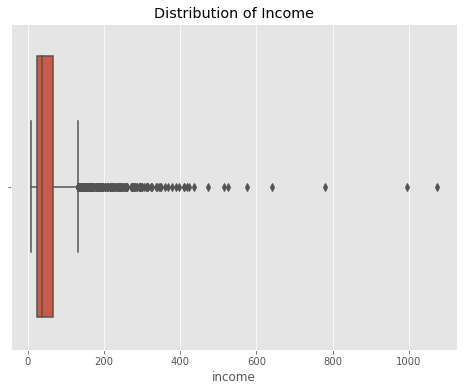

In [36]:
# Box Plot for Income variable:

sns.boxplot(df['income'])
plt.title('Distribution of Income')
plt.show()

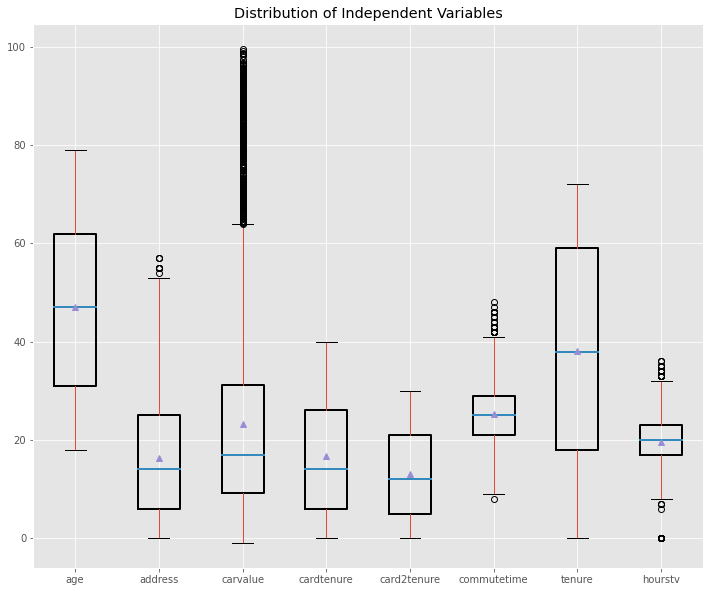

In [37]:
# 1) Plotting Box Plot for Independent varibales:

boxprops = dict(linestyle='-', linewidth=2,)
medianprops = dict(linestyle='-', linewidth=2)


plt.figure(figsize=(12,10))
df[['age', 'address', 'carvalue', 'cardtenure','card2tenure','commutetime', 'tenure', 'hourstv']].boxplot(
    showfliers=True, showmeans=True, boxprops=boxprops, medianprops=medianprops)
plt.title('Distribution of Independent Variables')
plt.xticks(rotation=0)
plt.show()

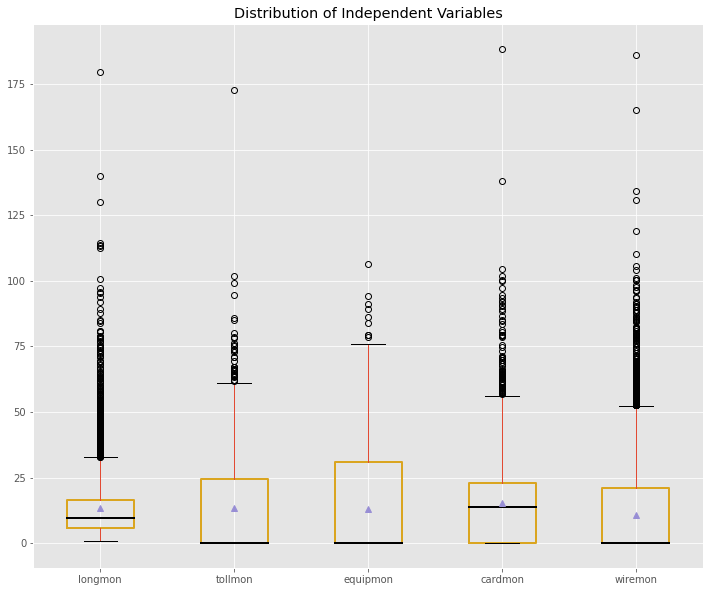

In [38]:
# 2) Plotting Box Plot for Independent varibales:

boxprops = dict(linestyle='-', linewidth=2, color='goldenrod')
medianprops = dict(linestyle='-', linewidth=2, color='k')


plt.figure(figsize=(12,10))
df[['longmon','tollmon', 'equipmon', 'cardmon', 'wiremon']].boxplot(showfliers=True, showmeans=True,
                boxprops=boxprops, medianprops=medianprops)
plt.title('Distribution of Independent Variables')
plt.xticks(rotation=0)
plt.show()

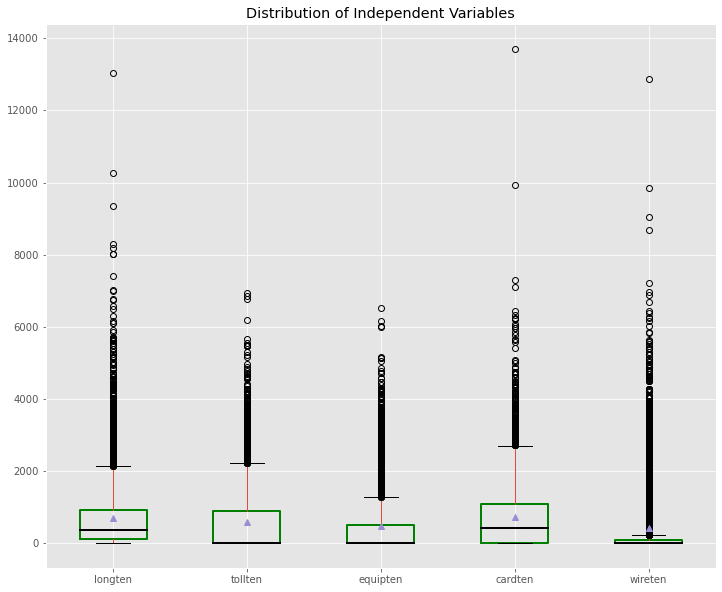

In [39]:
# 3) Plotting Box Plot for Independent varibales:

boxprops = dict(linestyle='-', linewidth=2, color='g')
medianprops = dict(linestyle='-', linewidth=2, color='k')


plt.figure(figsize=(12,10))
df[['longten','tollten', 'equipten', 'cardten', 'wireten']].boxplot(showfliers=True, showmeans=True,
                boxprops=boxprops, medianprops=medianprops)
plt.title('Distribution of Independent Variables')
plt.xticks(rotation=0)
plt.show()

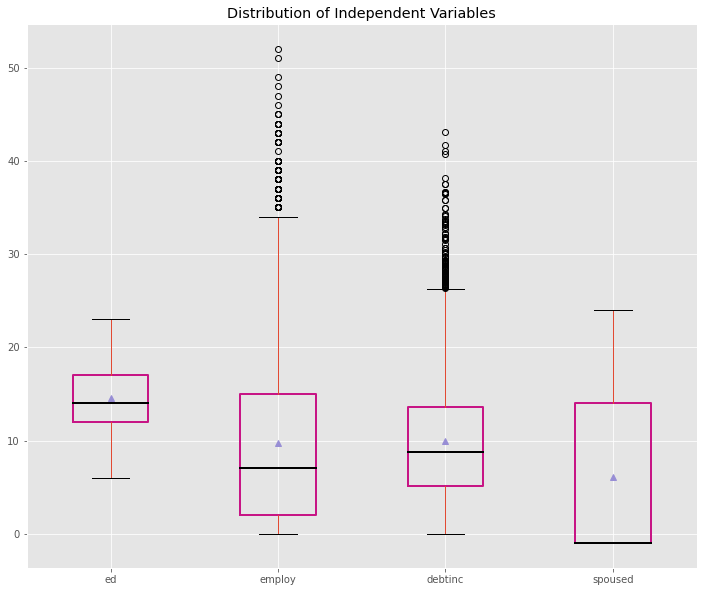

In [40]:
# 4) Plotting Box Plot for Independent varibales:

boxprops = dict(linestyle='-', linewidth=2, color='mediumvioletred')
medianprops = dict(linestyle='-', linewidth=2, color='k')


plt.figure(figsize=(12,10))
df[['ed', 'employ', 'debtinc', 'spoused']].boxplot(showfliers=True, showmeans=True, 
                                                   boxprops=boxprops, medianprops=medianprops)
plt.title('Distribution of Independent Variables')
plt.xticks(rotation=0)
plt.show()

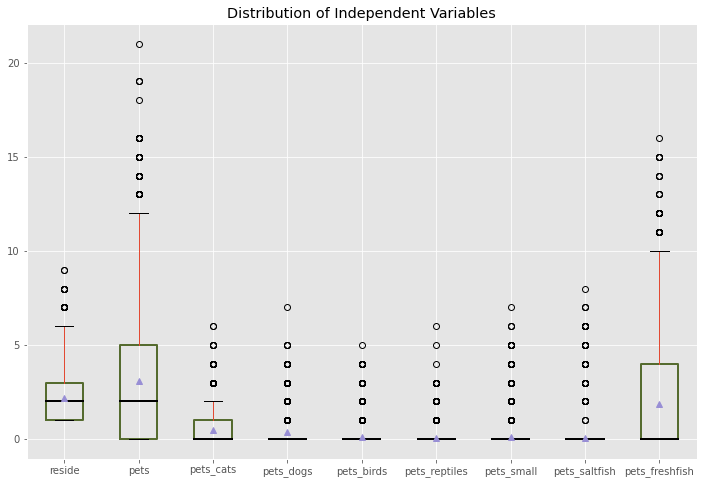

In [41]:
# 5) Plotting Box Plot for Independent varibales:

boxprops = dict(linestyle='-', linewidth=2, color='darkolivegreen')
medianprops = dict(linestyle='-', linewidth=2, color='k')


plt.figure(figsize=(12,8))
df[['reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 
    'pets_freshfish']].boxplot(showfliers=True, showmeans=True, boxprops=boxprops, medianprops=medianprops)
plt.title('Distribution of Independent Variables')
plt.xticks(rotation=0)
plt.show()

All the above boxplot shows there are outliers present in the data. By capping the outliers using either IQR Method, Z-Score or Percentile method, we may lose some records and wouldn't be helpful to train the model. Hence, shall transform the independent variables using the Power Transformer.

<function matplotlib.pyplot.show(close=None, block=None)>

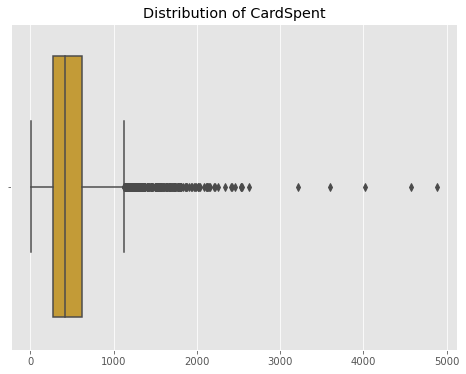

In [42]:
# Boxplot for the Target Variable:

sns.boxplot(y, color='goldenrod')
plt.title('Distribution of CardSpent')
plt.show

### 3. Distribution of the Target Variable

Checking if the CardSpent (depedent variable) is following Normal distribution.

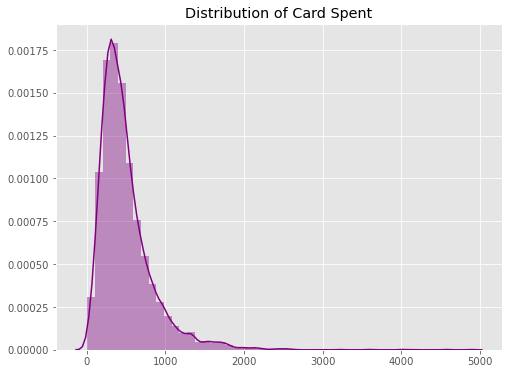

In [43]:
# Distribution of Target Variable

sns.distplot(y, color ='purple')
plt.title('Distribution of Card Spent')
plt.show()

The target variable, Cardspent also has outliers and is negatively skewed hence shall tranform this as well by taking its log.

In [44]:
# Log Transformation of the Dependent Variable:

ln_cardspent = np.log(y)
ln_cardspent

0       5.007029
1       4.350794
2       5.886021
3       5.884464
4       6.230147
          ...   
4995    7.262397
4996    5.903589
4997    7.331551
4998    6.623999
4999    6.010924
Length: 5000, dtype: float64

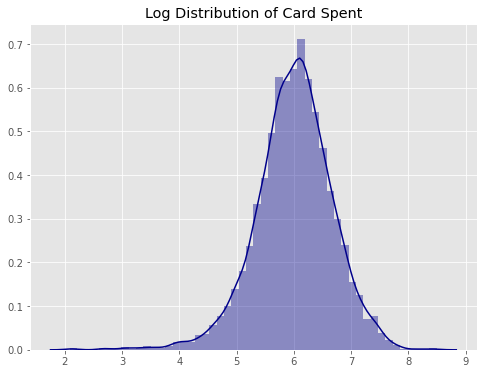

In [45]:
# Plotting Distplot for Log of Card Spent:

sns.distplot(ln_cardspent, color= '#00008b')
plt.title('Log Distribution of Card Spent')
plt.show()

The distribution of Card Spent (target variable) now looks more like normal distribution. Though, it is slightly positively skewed. However, it is normally distributed now.

We be using the Log of cardspent to build the model. 

In [46]:
# target variable becomes:

Y = ln_cardspent
Y.head()

0    5.007029
1    4.350794
2    5.886021
3    5.884464
4    6.230147
dtype: float64

#### Relationship between Numerical Variable and the Log of Target Variable : CardSpent

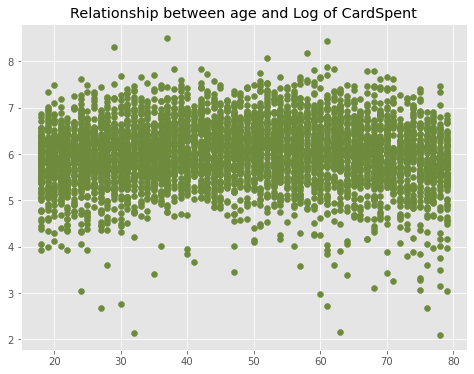

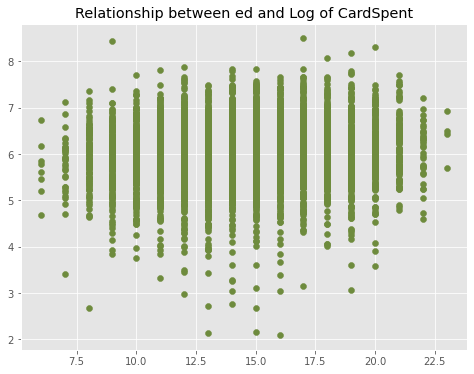

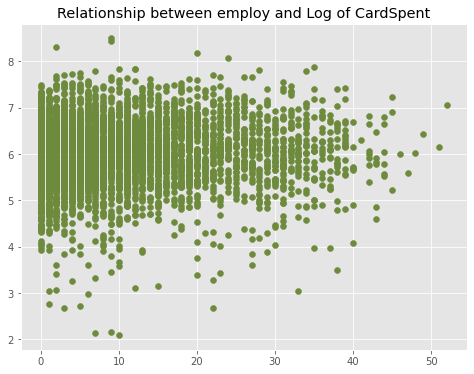

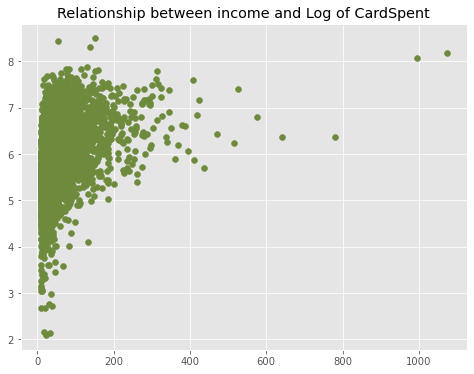

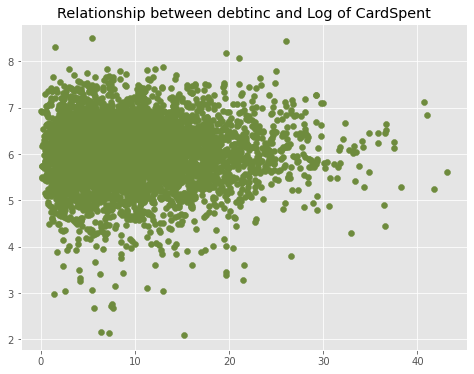

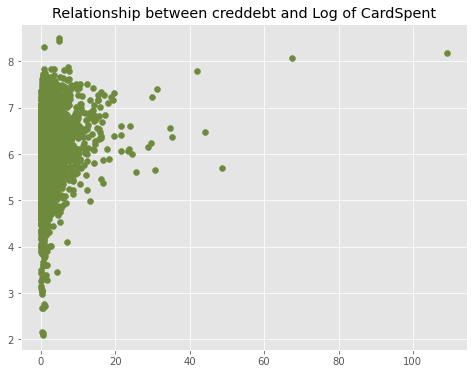

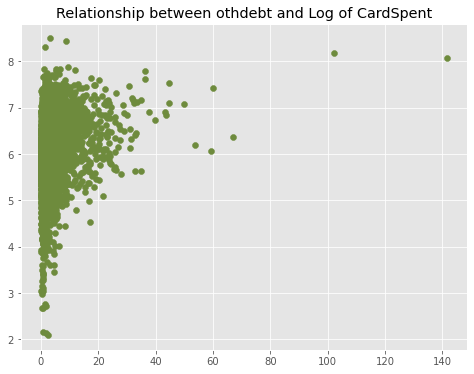

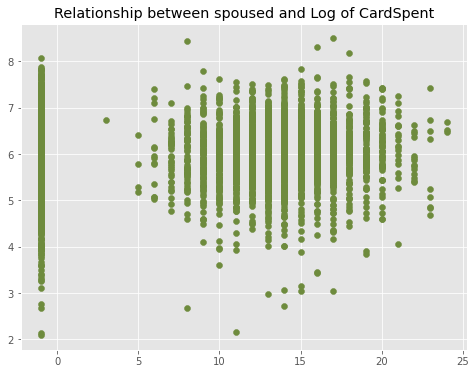

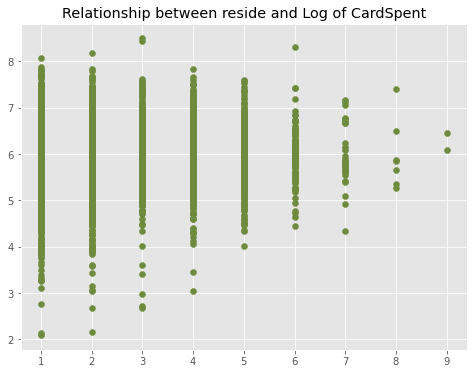

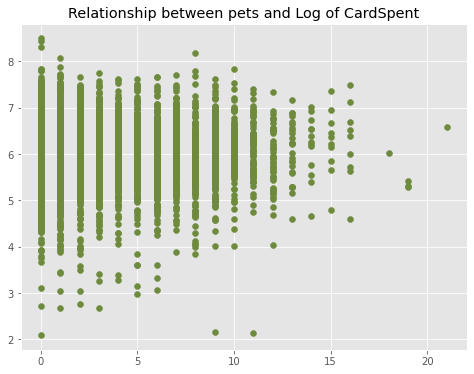

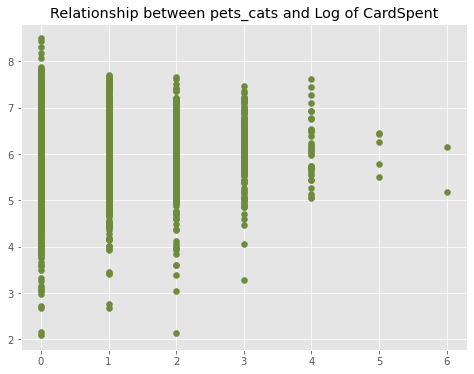

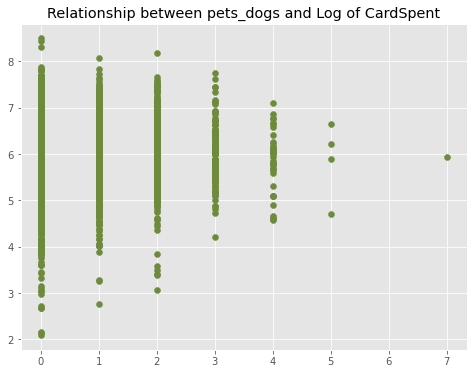

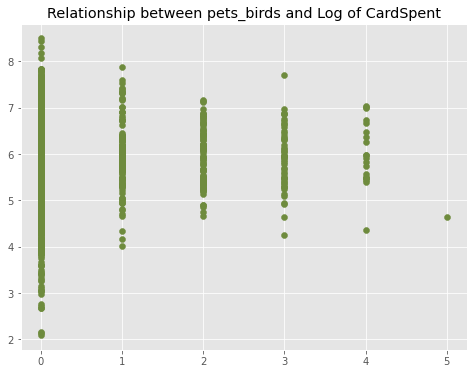

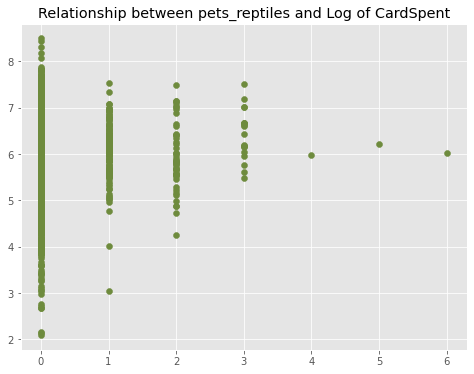

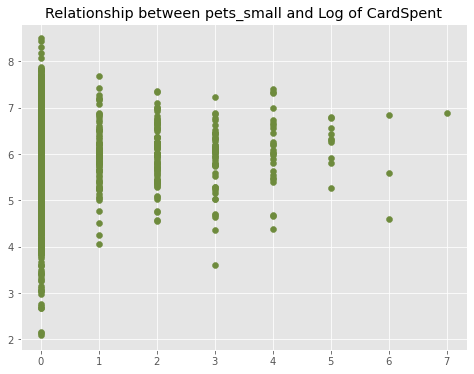

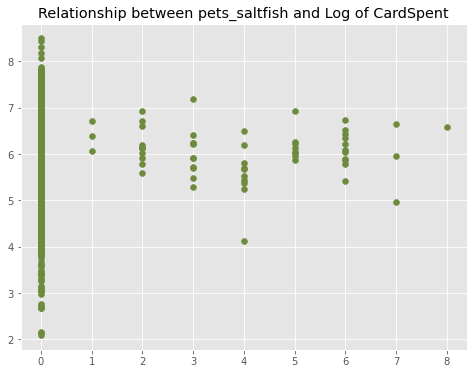

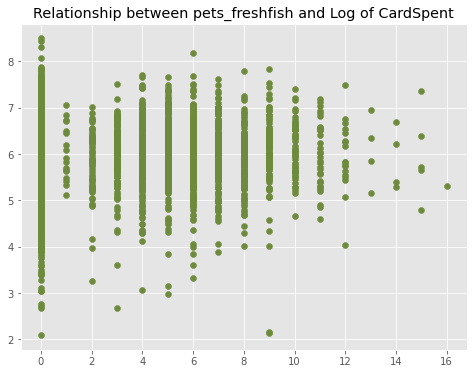

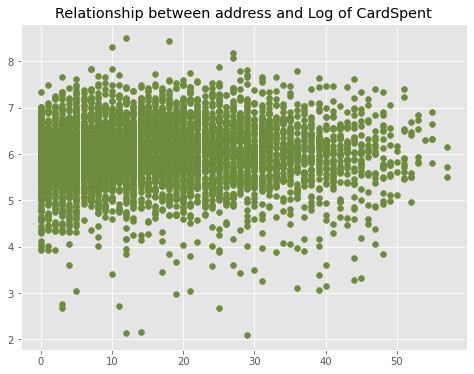

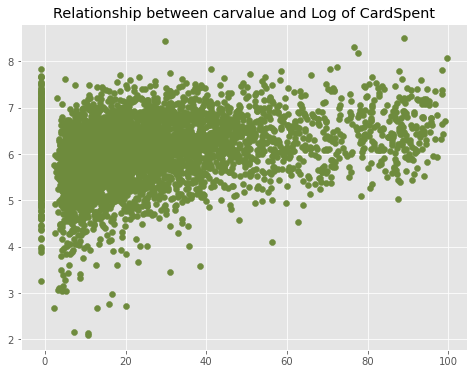

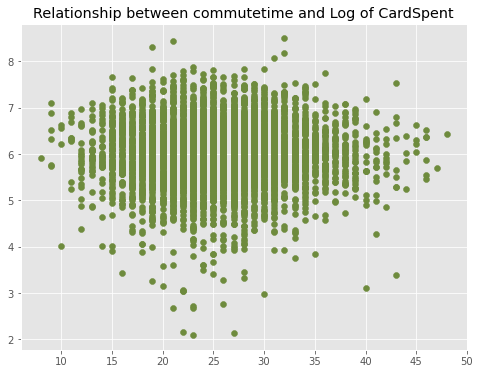

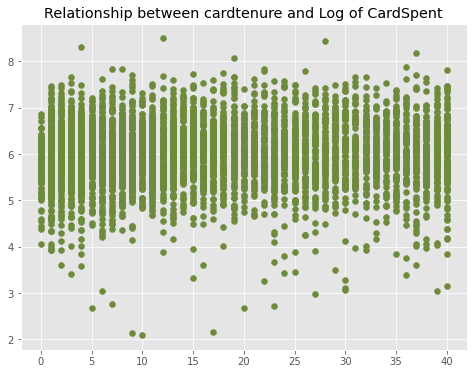

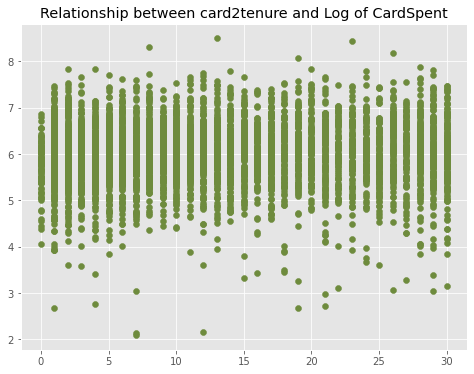

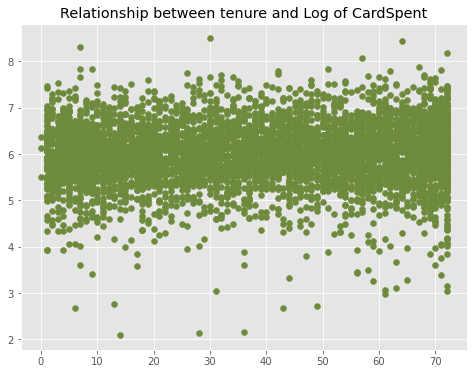

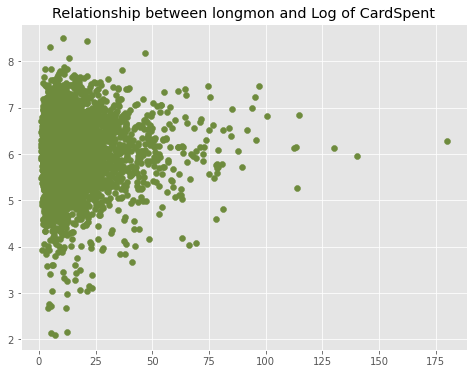

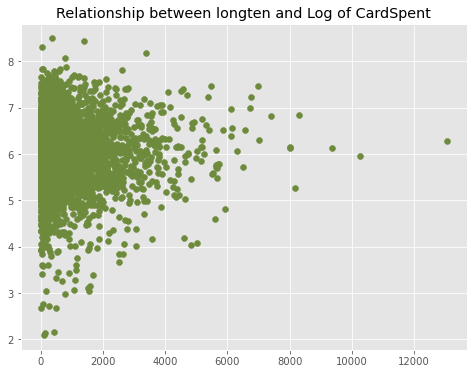

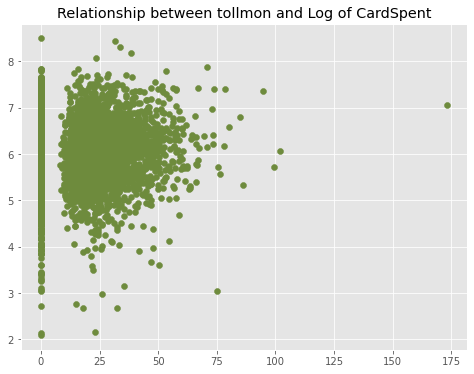

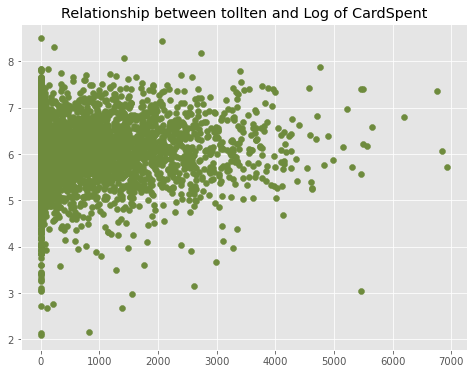

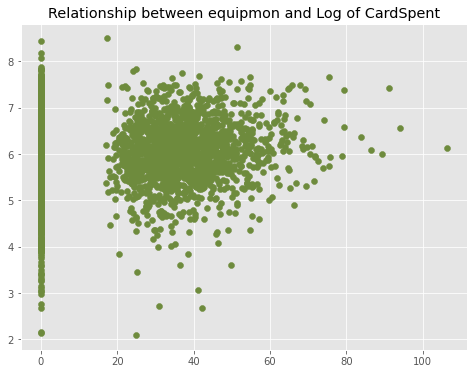

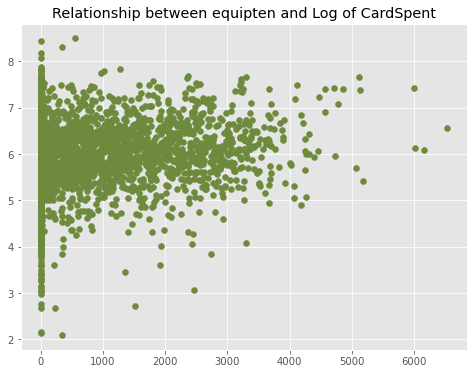

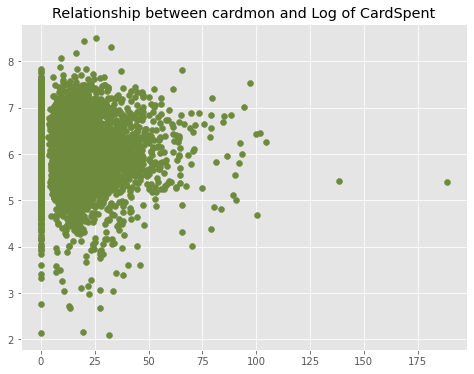

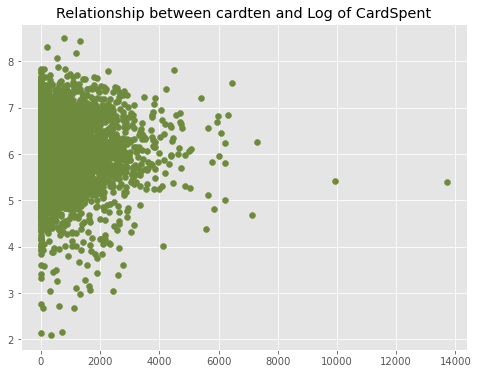

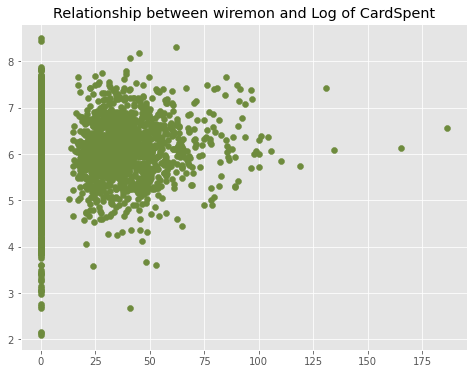

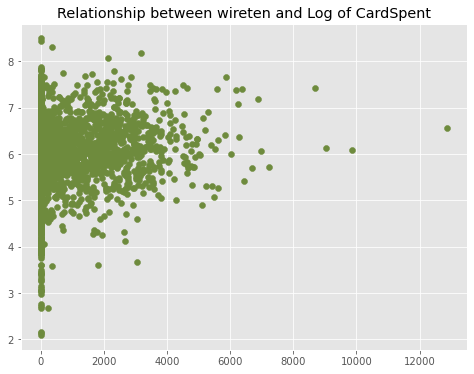

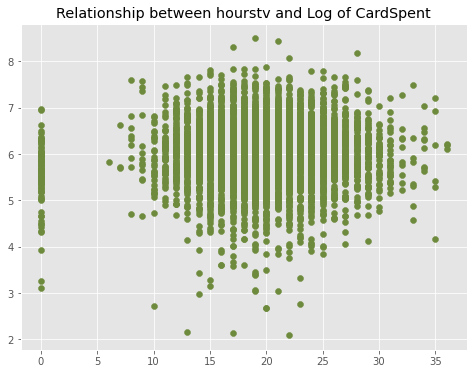

<Figure size 576x432 with 0 Axes>

In [47]:
plt.rcParams["figure.figsize"] = 8,6
for i in numerical_var:
    plt.scatter(df[i], ln_cardspent, color='#6e8b3d')
    plt.title('Relationship between {} and Log of CardSpent'.format(i))
    plt.show()
    
plt.tight_layout()

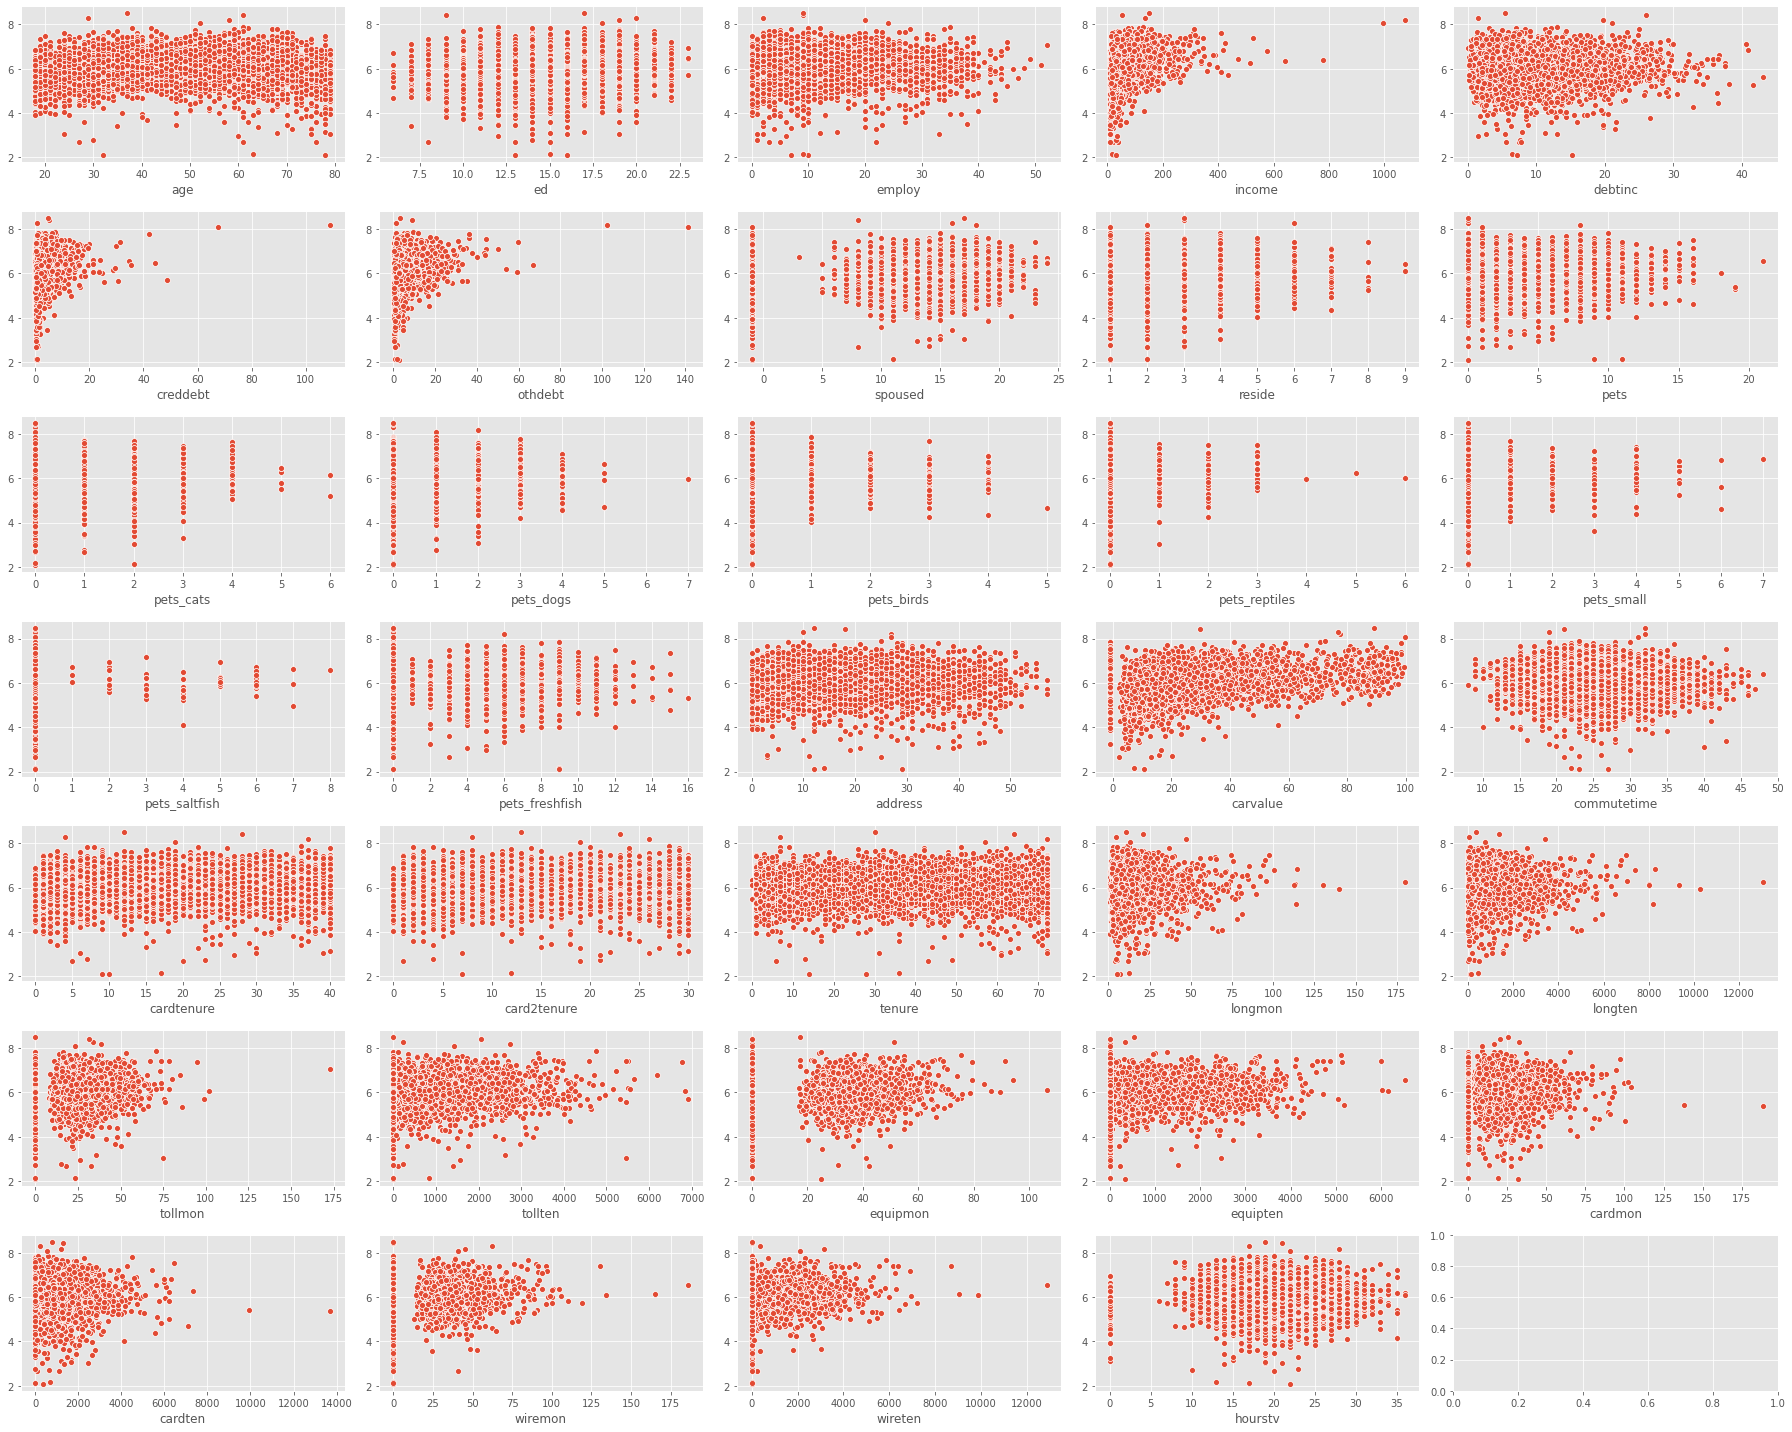

In [48]:
# Subplots showing Relationship between numerical variables and Log of CardSpent:

fig, ax = plt.subplots(nrows = 7, ncols= 5, figsize=(25, 20))

for i,j in zip(numerical_var, ax.flatten()):
    sns.scatterplot(df[i], ln_cardspent , ax=j)
    plt.tight_layout()

plt.show()

To check the linearity between the independent variables and the dependent variable log of CardSpent, we shall plot the graph of residuals and each independent variable after building the Ordinary Least Square (OLS) Regression model.

### 4. Correlation Matrix

To check the multicollinearity between the variables.

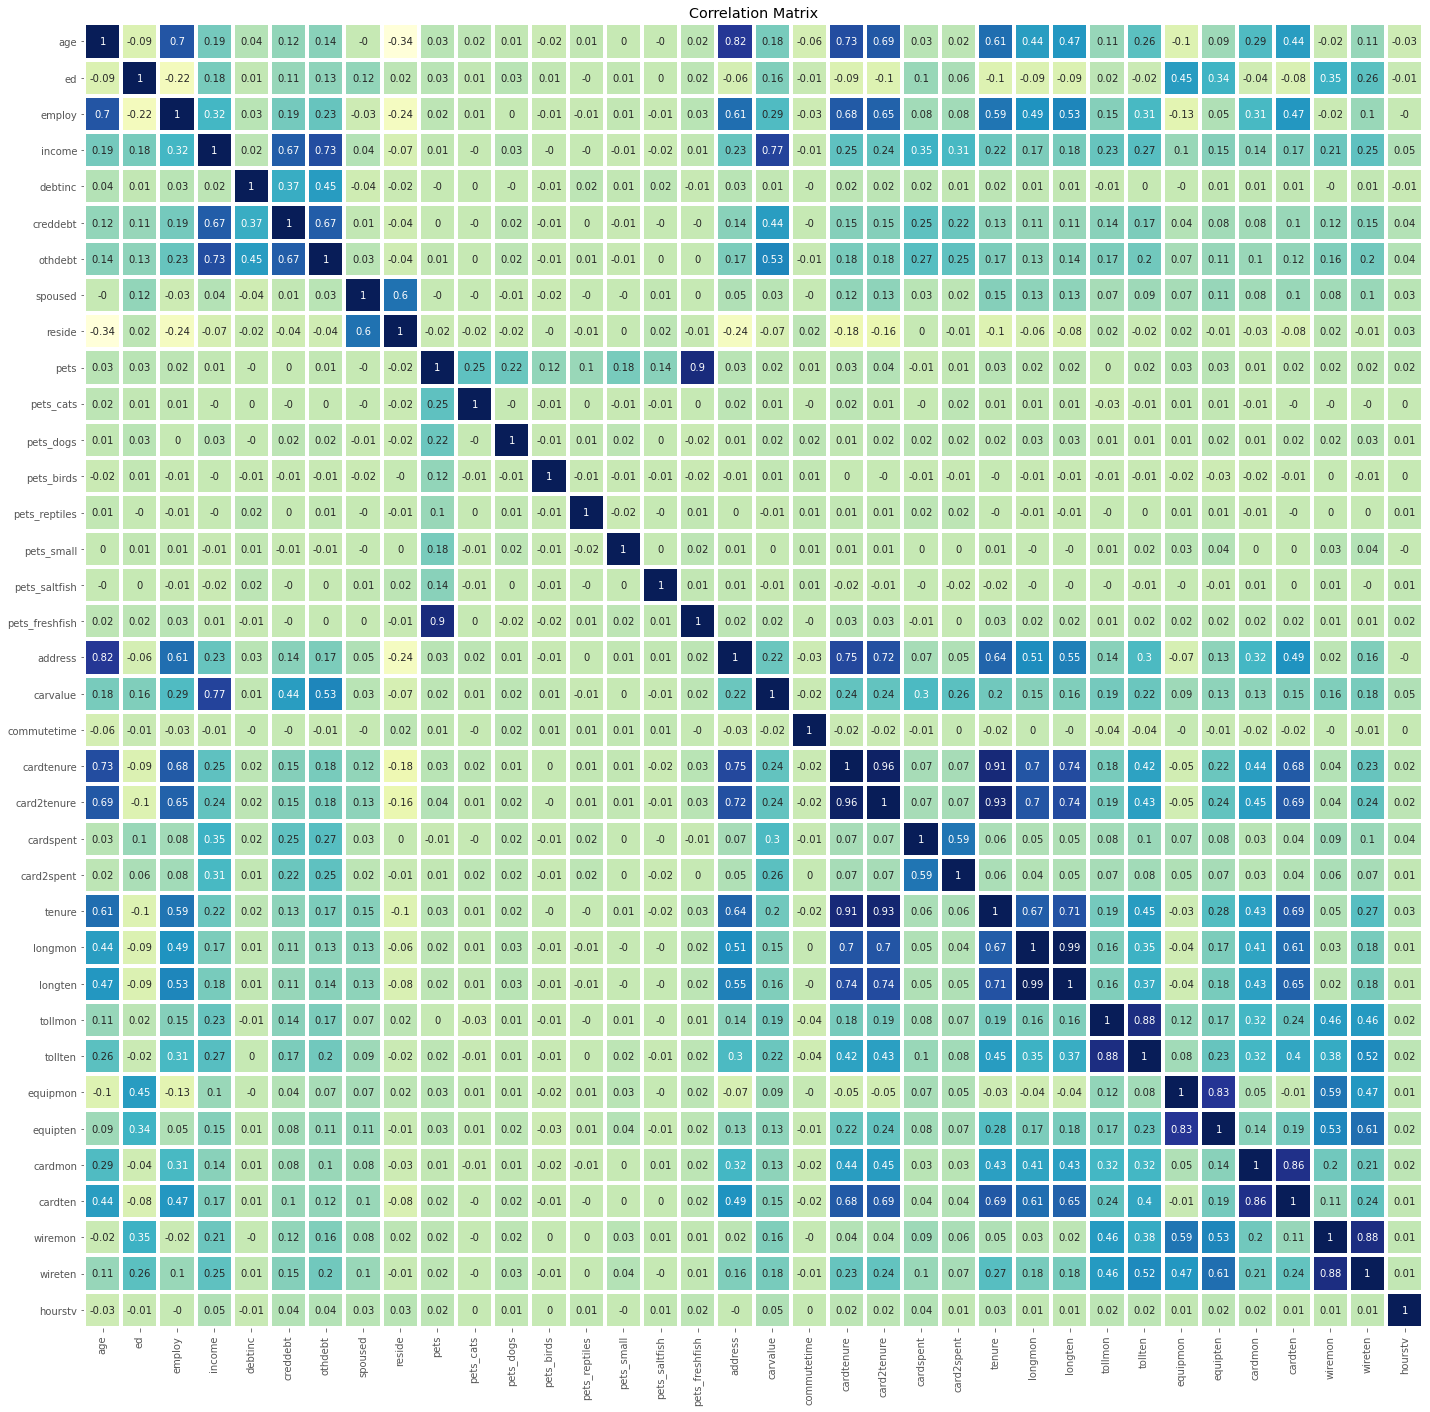

In [49]:
### finding Correlation among the variables:

plt.figure(figsize=(24,24))
sns.heatmap(round(df.corr(),2),annot=True, cmap='YlGnBu', linewidths=3, fmt='.2g', cbar= False)
plt.title('Correlation Matrix')
plt.show()

### Inference:

The correlation value above 0.50 is considered to be highly correlated. From the above heatmap, we can see that there is multi-collinearity present in the data and would need to use variance inflation factor ahead to take care of this.

### Data Preprocessing Steps

For the numerical variables perform both tranformation of the data using PowerTransformer to treat the outliers and scaling the numerical variables via the StandardScaler. 

For the categorical variables shall create dummy variables using OneHot encoding. And, then will concatenate both of these into new dataframe.

In [50]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PowerTransformer, StandardScaler,OneHotEncoder

In [51]:
# Categorical and Numerical dataframes before performing any data preprocessing steps:

x_cat = df[cat_var]
x_num = df[numerical_var]

In [52]:
# Tranforming the variables:

PT = PowerTransformer()
transformed_x_num = PT.fit_transform(x_num)


# Scaling the Variables:

SS = StandardScaler()

x_scaled = pd.DataFrame(SS.fit_transform(transformed_x_num), columns= numerical_var).reset_index(drop=True)
x_scaled.head()

age        ed    employ    income   debtinc  creddebt   othdebt  \
0 -1.646995  0.149007 -1.623876 -0.307123  0.381110  0.222496  0.066441   
1 -1.497037  0.752318 -1.623876 -1.401415  1.283610  0.240481 -0.302807   
2  1.101153 -0.155283  0.873205 -0.135857  0.201377 -0.041032  0.196403   
3 -1.423988  0.451502 -1.623876 -0.953856 -0.569521 -1.781599 -0.637797   
4 -1.211709  0.451502 -1.122102 -0.742877 -1.753700 -1.219038 -1.840750   

    spoused    reside      pets  pets_cats  pets_dogs  pets_birds  \
0 -0.955858  0.900157 -1.248055  -0.679704  -0.573318    -0.25354   
1 -0.955858  0.232253  1.045950  -0.679704  -0.573318    -0.25354   
2  1.012014  0.900157  0.435338   1.602988   1.684103    -0.25354   
3  1.215678  1.574361 -1.248055  -0.679704  -0.573318    -0.25354   
4  1.012014  1.303766 -1.248055  -0.679704  -0.573318    -0.25354   

   pets_reptiles  pets_small  pets_saltfish  pets_freshfish   address  \
0      -0.194358   -0.229898      -0.108333       -0.664846 -1.941495   
1      -0.194358   -0.229898      -0.108333        1.537192 -1.392988   
2      -0.194358   -0.229898      -0.108333       -0.664846  1.075599   
3      -0.194358   -0.229898      -0.108333       -0.664846 -1.202530   
4      -0.194358   -0.229898      -0.108333       -0.664846 -1.202530   

   carvalue  commutetime  cardtenure  card2tenure    tenure   longmon  \
0 -0.206545    -0.535889   -1.463573    -1.173716 -1.596575 -0.531776   
1 -0.730114     0.649717   -1.099676    -0.983347  0.133422 -0.105287   
2  0.039945    -0.183326    1.335132     1.201769  1.124617  1.354990   
3 -0.577803     2.014369   -0.949676    -0.813070  0.008147 -0.641504   
4 -0.441119     1.121593   -0.571859    -0.254977 -0.672593 -1.567832   

    longten   tollmon   tollten  equipmon  equipten   cardmon   cardten  \
0 -1.263922  1.101518  0.692492  1.354379  1.167092  0.267444 -0.480405   
1 -0.014388 -0.944414 -0.933883  1.456693  1.478897  0.370419  0.480861   
2  1.302333 -0.944414 -0.933883 -0.718723 -0.716249  0.723083  0.955648   
3 -0.335488 -0.944414 -0.933883 -0.718723 -0.716249  0.630245  0.541888   
4 -0.892395  0.837532  0.903842 -0.718723 -0.716249  0.439712  0.220680   

    wiremon   wireten   hourstv  
0 -0.606225 -0.605455 -1.311863  
1  1.670421  1.695183 -0.384998  
2 -0.606225 -0.605455  0.221795  
3 -0.606225 -0.605455  1.307342  
4  1.582696  1.626864  1.534771

In [53]:
# Dummy Creation for Categorical Variables:
x_cat = pd.get_dummies(df[cat_var], drop_first=True).reset_index(drop=True)
x_cat.head()

region_2  region_3  region_4  region_5  townsize_2.0  townsize_3.0  \
0         0         0         0         0             1             0   
1         0         0         0         1             0             0   
2         0         1         0         0             0             0   
3         0         0         1         0             0             1   
4         1         0         0         0             1             0   

   townsize_4.0  townsize_5.0  gender_1  birthmonth_August  \
0             0             0         1                  0   
1             0             1         0                  0   
2             1             0         1                  0   
3             0             0         0                  0   
4             0             0         0                  0   

   birthmonth_December  birthmonth_February  birthmonth_January  \
0                    0                    0                   0   
1                    0                    0                   0   
2                    0                    0                   0   
3                    0                    0                   0   
4                    0                    0                   0   

   birthmonth_July  birthmonth_June  birthmonth_March  birthmonth_May  \
0                0                0                 0               0   
1                0                0                 0               1   
2                0                1                 0               0   
3                0                0                 0               1   
4                1                0                 0               0   

   birthmonth_November  birthmonth_October  birthmonth_September  jobcat_2  \
0                    0                   0                     1         0   
1                    0                   0                     0         1   
2                    0                   0                     0         1   
3                    0                   0                     0         1   
4                    0                   0                     0         1   

   jobcat_3  jobcat_4  jobcat_5  jobcat_6  union_1  retire_1  default_1  \
0         0         0         0         0        1         0          1   
1         0         0         0         0        0         0          1   
2         0         0         0         0        0         0          0   
3         0         0         0         0        0         0          1   
4         0         0         0         0        0         0          0   

   jobsat_2  jobsat_3  jobsat_4  jobsat_5  marital_1  homeown_1  hometype_2  \
0         0         0         0         0          0          0           1   
1         0         0         0         0          0          1           0   
2         0         0         1         0          1          1           0   
3         1         0         0         0          1          1           0   
4         0         0         0         0          1          0           1   

   hometype_3  hometype_4  cars_1  cars_2  cars_3  cars_4  cars_5  cars_6  \
0           0           0       0       1       0       0       0       0   
1           1           0       0       1       0       0       0       0   
2           0           0       0       0       1       0       0       0   
3           1           0       0       0       1       0       0       0   
4           0           0       1       0       0       0       0       0   

   cars_7  cars_8  carown_0  carown_1  cartype_0  cartype_1  carcatvalue_1  \
0       0       0         0         1          1          0              1   
1       0       0         0         1          0          1              1   
2       0       0         0         1          0          1              1   
3       0       0         0         1          0          1              1   
4       0       0         1         0          0          1              1   

   carcatvalue_2  carc

In [54]:
### Concatenate Scaled and Dummy Variables to new df

df_concat = pd.concat([x_scaled, x_cat], axis=1)
df_concat.head()

age        ed    employ    income   debtinc  creddebt   othdebt  \
0 -1.646995  0.149007 -1.623876 -0.307123  0.381110  0.222496  0.066441   
1 -1.497037  0.752318 -1.623876 -1.401415  1.283610  0.240481 -0.302807   
2  1.101153 -0.155283  0.873205 -0.135857  0.201377 -0.041032  0.196403   
3 -1.423988  0.451502 -1.623876 -0.953856 -0.569521 -1.781599 -0.637797   
4 -1.211709  0.451502 -1.122102 -0.742877 -1.753700 -1.219038 -1.840750   

    spoused    reside      pets  pets_cats  pets_dogs  pets_birds  \
0 -0.955858  0.900157 -1.248055  -0.679704  -0.573318    -0.25354   
1 -0.955858  0.232253  1.045950  -0.679704  -0.573318    -0.25354   
2  1.012014  0.900157  0.435338   1.602988   1.684103    -0.25354   
3  1.215678  1.574361 -1.248055  -0.679704  -0.573318    -0.25354   
4  1.012014  1.303766 -1.248055  -0.679704  -0.573318    -0.25354   

   pets_reptiles  pets_small  pets_saltfish  pets_freshfish   address  \
0      -0.194358   -0.229898      -0.108333       -0.664846 -1.941495   
1      -0.194358   -0.229898      -0.108333        1.537192 -1.392988   
2      -0.194358   -0.229898      -0.108333       -0.664846  1.075599   
3      -0.194358   -0.229898      -0.108333       -0.664846 -1.202530   
4      -0.194358   -0.229898      -0.108333       -0.664846 -1.202530   

   carvalue  commutetime  cardtenure  card2tenure    tenure   longmon  \
0 -0.206545    -0.535889   -1.463573    -1.173716 -1.596575 -0.531776   
1 -0.730114     0.649717   -1.099676    -0.983347  0.133422 -0.105287   
2  0.039945    -0.183326    1.335132     1.201769  1.124617  1.354990   
3 -0.577803     2.014369   -0.949676    -0.813070  0.008147 -0.641504   
4 -0.441119     1.121593   -0.571859    -0.254977 -0.672593 -1.567832   

    longten   tollmon   tollten  equipmon  equipten   cardmon   cardten  \
0 -1.263922  1.101518  0.692492  1.354379  1.167092  0.267444 -0.480405   
1 -0.014388 -0.944414 -0.933883  1.456693  1.478897  0.370419  0.480861   
2  1.302333 -0.944414 -0.933883 -0.718723 -0.716249  0.723083  0.955648   
3 -0.335488 -0.944414 -0.933883 -0.718723 -0.716249  0.630245  0.541888   
4 -0.892395  0.837532  0.903842 -0.718723 -0.716249  0.439712  0.220680   

    wiremon   wireten   hourstv  region_2  region_3  region_4  region_5  \
0 -0.606225 -0.605455 -1.311863         0         0         0         0   
1  1.670421  1.695183 -0.384998         0         0         0         1   
2 -0.606225 -0.605455  0.221795         0         1         0         0   
3 -0.606225 -0.605455  1.307342         0         0         1         0   
4  1.582696  1.626864  1.534771         1         0         0         0   

   townsize_2.0  townsize_3.0  townsize_4.0  townsize_5.0  gender_1  \
0             1             0             0             0         1   
1             0             0             0             1         0   
2             0             0             1             0         1   
3             0             1             0             0         0   
4             1             0             0             0         0   

   birthmonth_August  birthmonth_December  birthmonth_February  \
0                  0                    0                    0   
1                  0                    0                    0   
2                  0                    0                    0   
3                  0                    0                    0   
4                  0                    0                    0   

   birthmonth_January  birthmonth_July  birthmonth_June  birthmonth_March  \
0                   0                0                0                 0   
1                   0                0                0                 0   
2                   0                0                1                 0   
3                   0                0                0                 0   
4                   0                1                0                 0   

   birthmonth_May  birthmonth_November  birthmonth_October  \
0            

### Building the Model

We shall build:

1) OLS Model without any feature selection\
2) Base model using OLS summary model post feature selection.\
3) To improve the accuracy  and performance of the model, will build using Random Forest


### Splitting data into Train-Test for OLS model without feature selection



In [55]:
# Splitting the data into 70% train and 30% test:

non_FS_X_train, non_FS_X_test, non_FS_Y_train, non_FS_Y_test = train_test_split(df_concat, Y, random_state=1, test_size=0.30)

# check the dimensions of the train & test subset for 

print("The shape of X_train is:",non_FS_X_train.shape)
print("The shape of X_test is:",non_FS_X_test.shape)
print('')


print("The shape of y_train is:",non_FS_Y_train.shape)
print("The shape of y_test is:",non_FS_Y_test.shape)

The shape of X_train is: (3500, 180)
The shape of X_test is: (1500, 180)

The shape of y_train is: (3500,)
The shape of y_test is: (1500,)


To statistically test if the train and test representative of the overall data, would compute the Median for the target variabls i.e. for the CardSpent for both the test and train sets.

In [56]:
# median for y_train
non_FS_median_y_train = non_FS_Y_train.median()
non_FS_median_y_train

# median for y_test
non_FS_median_y_test = non_FS_Y_test.median()
non_FS_median_y_test

print('The median for CardSpent Train is {} and CardSpent Test is {}.'.format(non_FS_median_y_train, non_FS_median_y_test))

The median for CardSpent Train is 6.022333163425683 and CardSpent Test is 6.037510123401246.


#### Conclusion:

Based on the above result, we can conclude statistically that the train and test representative of the overall data as the median for both y_train and y_test are similiar.

In [57]:
# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE, f_regression,mutual_info_regression, SelectKBest

# import functions to perform Linear Regression, regularizers and SGDRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, SGDRegressor


# import DT,  ensemble techniques, Support Vector Regressor, KNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,  AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# import functions to perform cross validation
from sklearn.model_selection import cross_val_score, LeaveOneOut, KFold,  GridSearchCV

import itertools

### I. OLS Summary Model without Feature Selection

Ordinary Least Square Regression model with all the numerical and categorical features

In [58]:
# Build OLS model
# adding constant to x_train

Xc = sm.add_constant(non_FS_X_train)

# fit() is used to fit the model
non_FS_OLS_Model = sm.OLS(non_FS_Y_train, Xc).fit()

# printing the summary of the model
print(non_FS_OLS_Model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     11.39
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          1.43e-225
Time:                        13:53:18   Log-Likelihood:                -2810.5
No. Observations:                3500   AIC:                             5967.
Df Residuals:                    3327   BIC:                             7033.
Df Model:                         172                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.0154 

#### Inference:

The R-squared in above model is very low of 37.1%, now will re-build the model using feature selection that is removing those variables which are not contributing in predicting the card spent.

### Feature Selection:

Will use the following techniques to remove the variables:

  - a) Bi-variate relationship: correlation (remove variables having more than 0.60 correlation coefficient)
  
  Take the superset of the variables based on:
  - b) Uni-variate relationship: Using F- Regression
  - c) Recursive Feature Elimination (RFE)
  - d) Select K-Best
  
  And then check for multicollinearity using Variance Inflation Factor (VIF)

### a. Bi-variate Relationship: Variable Reduction on the basis of Correlation Coefficient

We will remove variables that have correlation (remove variables having more than 0.60 correlation)

In [59]:
corr1 = df_concat.corr()
corr1

age        ed    employ    income   debtinc  creddebt  \
age            1.000000 -0.087658  0.786650  0.156802  0.043547  0.134535   
ed            -0.087658  1.000000 -0.214861  0.206326  0.016234  0.132542   
employ         0.786650 -0.214861  1.000000  0.312038  0.031367  0.220017   
income         0.156802  0.206326  0.312038  1.000000  0.006444  0.599083   
debtinc        0.043547  0.016234  0.031367  0.006444  1.000000  0.583557   
...                 ...       ...       ...       ...       ...       ...   
ownfax_1      -0.038220  0.275756 -0.043467  0.144529 -0.005304  0.072988   
news_1         0.364219 -0.074022  0.376499  0.097871  0.005958  0.067226   
response_01_1  0.014921 -0.117930  0.031605 -0.001380  0.009672  0.002079   
response_02_1  0.015188  0.073305  0.014514  0.059061  0.002420  0.027954   
response_03_1 -0.023918  0.106685 -0.032112  0.060793  0.016727  0.055620   

                othdebt   spoused    reside      pets  pets_cats  pets_dogs  \
age            0.155802  0.002821 -0.287785  0.027969   0.014091  -0.002302   
ed             0.156876  0.027452  0.013766  0.028706   0.013336   0.026957   
employ         0.245304 -0.006124 -0.232350  0.021151   0.008697  -0.006666   
income         0.676505  0.026587 -0.036785  0.007021   0.010229   0.012740   
debtinc        0.668005 -0.037248 -0.034086 -0.000990  -0.000683  -0.009654   
...                 ...       ...       ...       ...        ...        ...   
ownfax_1       0.094623  0.011052  0.004569  0.026033   0.004734   0.016502   
news_1         0.079196  0.099776 -0.024268  0.031916   0.028416   0.017121   
response_01_1  0.007970  0.004881  0.003373  0.002380   0.005541  -0.004419   
response_02_1  0.049854  0.026943  0.013960  0.023457  -0.012007   0.017123   
response_03_1  0.046401 -0.006618  0.004759  0.019564  -0.000153   0.011107   

               pets_birds  pets_reptiles  pets_small  pets_saltfish  \
age             -0.018480       0.005562    0.002117      -0.002115   
ed               0.021243      -0.005400    0.005423      -0.002501   
employ          -0.018283      -0.002099    0.010547      -0.005188   
income           0.001190       0.009132    0.010323      -0.006094   
debtinc          0.001502       0.016802    0.011087       0.021330   
...                   ...            ...         ...            ...   
ownfax_1         0.004387       0.001278    0.009851      -0.011554   
news_1          -0.031488       0.017084    0.009865       0.002204   
response_01_1   -0.025015       0.033894   -0.019801       0.021265   
response_02_1   -0.000499       0.023438    0.003870       0.002621   
response_03_1    0.013875       0.025786    0.006784       0.006458   

               pets_freshfish   address  carvalue  commutetime  cardtenure  \
age                  0.024178  0.861971  0.150131    -0.057153    0.749798   
ed                   0.012640 -0.036136  0.134704    -0.009595   -0.072039   
employ               0.023936  0.713581  0.253373    -0.045395    0.719735   
income               0.004276  0.264198  0.687027    -0.027396    0.243458   
debtinc             -0.006465  0.037170  0.006656    -0.003037    0.026819   
...                       ...       ...       ...          ...         ...   
ownfax_1             0.015569 -0.021450  0.091825    -0.033067   -0.025050   
news_1               0.030215  0.390763  0.097515    -0.022208    0.550134   
response_01_1        0.008420  0.015117  0.008570     0.004268    0.003506   
response_02_1        0.021380  0.018389  0.053643    -0.011294    0.022481   
response_03_1        0.009380 -0.017481  0.033917    -0.006994   -0.017146   

               card2tenure    tenure   longmon   longten   tollmon   tollten  \
age               0.707749  0.611823  0.518874  0.589169  0.030274  0.071430   
ed               -0.077571 -0.089273 -0.089432 -0.091904  0.026894  0.022369   
employ            0.697311  0.613910  0.535348  0.598890  0.062074  0.102912   
income            0.237062  0.185414

In [60]:
# Exporting the Correlation Cofficient
corr1.to_csv('Results_corr.csv')

In [61]:
def corr_coeff(df_concat, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = df_concat.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in df_concat.columns:
                    del df_concat[colname] # deleting the column from the dataset


corr_coeff(df_concat, 0.6)

In [62]:
df_concat.columns

Index(['age', 'ed', 'income', 'debtinc', 'creddebt', 'spoused', 'pets',
       'pets_cats', 'pets_dogs', 'pets_birds',
       ...
       'owncd_1', 'ownpda_1', 'ownpc_1', 'ownipod_1', 'owngame_1', 'ownfax_1',
       'news_1', 'response_01_1', 'response_02_1', 'response_03_1'],
      dtype='object', length=150)

After deleting the variables having correlation coefficient more than 0.60, the variables reduced from 180 to 150.

### b. Uni-variate relationship: Using F-Regression


In [63]:
# Defining Features and Target:
target = ln_cardspent
features = df_concat

In [64]:
F_values, p_values = f_regression(features, target)

In [65]:
len(p_values)

150

In [66]:
# Iterating over the results 
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]

In [67]:
# Converting the results to dataframe:

f_reg_results = pd.DataFrame(f_reg_results, columns=['Variables','F_Values', 'P_Value'])

f_reg_results.sort_values(by=['F_Values'], ascending=False, inplace=True)

In [68]:
# Variables based on F Regression:
f_reg_results

Variables    F_Values P_Value
2                income  975.427762   0.000
68        carcatvalue_1  428.607122   0.000
4              creddebt  349.369364   0.000
46             retire_1  209.264933   0.000
139            owndvd_1  138.522690   0.000
..                  ...         ...     ...
71          carbought_1    0.001632   0.968
38   birthmonth_October    0.001178   0.973
58               cars_3    0.000462   0.983
111          cardtype_4    0.000052   0.994
110          cardtype_3    0.000021   0.996

[150 rows x 3 columns]

In [69]:
# Exporting the Results:
f_reg_results.to_csv('f_reg_results.csv')

In [70]:
# Converting the type of column P-value in mutual_f_reg_results
f_reg_results['P_Value'] = f_reg_results['P_Value'].astype('float')

In [71]:
# Selecting Top Variables based on P-Value > 0.10 on the basis of Mutual Info Regression

features_selected_F_Reg = f_reg_results[f_reg_results.P_Value <= 0.10].Variables.to_list()

In [72]:
# Top results based on P-value > 0.10:
print(features_selected_F_Reg)

['income', 'carcatvalue_1', 'creddebt', 'retire_1', 'owndvd_1', 'carown_0', 'ownvcr_1', 'owncd_1', 'reason_2', 'carown_1', 'card_2', 'card_3', 'ed', 'carcatvalue_2', 'card2_3', 'owntv_1', 'gender_1', 'wiremon', 'jobcat_2', 'card2_2', 'card_4', 'ownpda_1', 'homeown_1', 'ownfax_1', 'hometype_2', 'response_03_1', 'tollmon', 'vote_1', 'internet_4', 'card2_4', 'equipmon', 'card2_5', 'jobcat_3', 'internet_3', 'longmon', 'multline_1', 'reason_4', 'bfast_3', 'ownpc_1', 'ownipod_1', 'owngame_1', 'card_5', 'jobsat_5', 'hourstv', 'bfast_2', 'cars_1', 'card2benefit_3', 'polview_6', 'ebill_1', 'polcontrib_1', 'commute_4', 'jobsat_4', 'hometype_3', 'region_5', 'news_1', 'commutebike_1', 'response_02_1', 'cartype_0', 'reason_3']


In [73]:
len(features_selected_F_Reg)

59

### c. Recursive Feature Elimination (RFE)

RFE doesn't give good results when used with models that are impacted by multi-collinearity such as Linear Regression. Hence, using RFE on RandomForestRegressor to find out the top features based on RFE technique.

In [74]:
# Creating RFE model and selecting top 15 atttributes 

rfe = RFE(RandomForestRegressor(), n_features_to_select=15)
rfe = rfe.fit(features, target)


In [75]:
# Top 15 features based on RFE:
RFE_results  = features.columns[rfe.support_].to_list()
print(RFE_results)

['age', 'ed', 'income', 'debtinc', 'creddebt', 'spoused', 'pets', 'commutetime', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'hourstv', 'card_2', 'card_3']


### d. Select K Best

In [76]:
# Selecting Top 50 features using SelectKBest:

Kbest_50= SelectKBest(score_func = mutual_info_regression, k=50).fit(features, target )

In [77]:
KBest_feature_50 = [(i, v) for i, v in itertools.zip_longest(features.columns, Kbest_50.get_support())]
KBest_feature_50

[('age', True),
 ('ed', True),
 ('income', True),
 ('debtinc', False),
 ('creddebt', True),
 ('spoused', True),
 ('pets', False),
 ('pets_cats', False),
 ('pets_dogs', True),
 ('pets_birds', False),
 ('pets_reptiles', False),
 ('pets_small', False),
 ('pets_saltfish', False),
 ('commutetime', True),
 ('longmon', False),
 ('tollmon', True),
 ('equipmon', False),
 ('cardmon', False),
 ('wiremon', True),
 ('hourstv', True),
 ('region_2', True),
 ('region_3', False),
 ('region_4', True),
 ('region_5', False),
 ('townsize_2.0', True),
 ('townsize_3.0', False),
 ('townsize_4.0', True),
 ('townsize_5.0', True),
 ('gender_1', True),
 ('birthmonth_August', False),
 ('birthmonth_December', False),
 ('birthmonth_February', False),
 ('birthmonth_January', False),
 ('birthmonth_July', False),
 ('birthmonth_June', False),
 ('birthmonth_March', False),
 ('birthmonth_May', False),
 ('birthmonth_November', False),
 ('birthmonth_October', False),
 ('birthmonth_September', False),
 ('jobcat_2', True),
 (

In [78]:
# Top 50 features based on Select K Best:

SelectKBest_results_50  = features.columns[Kbest_50.get_support()].to_list()
print(SelectKBest_results_50)

['age', 'ed', 'income', 'creddebt', 'spoused', 'pets_dogs', 'commutetime', 'tollmon', 'wiremon', 'hourstv', 'region_2', 'region_4', 'townsize_2.0', 'townsize_4.0', 'townsize_5.0', 'gender_1', 'jobcat_2', 'jobcat_6', 'union_1', 'retire_1', 'default_1', 'jobsat_4', 'carown_0', 'carown_1', 'carcatvalue_1', 'carcatvalue_2', 'commute_8', 'reason_2', 'reason_9', 'polview_3', 'polview_5', 'vote_1', 'cardtype_3', 'cardtype_4', 'cardbenefit_4', 'card2_2', 'card2_3', 'card2_5', 'card2type_2', 'card2benefit_2', 'card2benefit_4', 'card2fee_1', 'multline_1', 'internet_3', 'ownvcr_1', 'owndvd_1', 'owncd_1', 'ownpda_1', 'ownfax_1', 'news_1']


In [79]:
# Selecting Top 15 features using SelectKBest:

Kbest_15 = SelectKBest(score_func = mutual_info_regression, k=15).fit(features, target )

SelectKBest_results_15  = features.columns[Kbest_15.get_support()].to_list()
print(SelectKBest_results_15)

['age', 'income', 'creddebt', 'hourstv', 'retire_1', 'carown_0', 'carown_1', 'carcatvalue_1', 'reason_2', 'cardtype_4', 'card2type_2', 'multline_1', 'ownvcr_1', 'owndvd_1', 'owncd_1']


In [80]:
# Combining features from all 3 methods: F-Regression , RFE and SelectKBest

features_new = features_selected_F_Reg + RFE_results + SelectKBest_results_15

combined_features = list(set(features_new))
print(combined_features)

['card2benefit_3', 'tollmon', 'multline_1', 'response_02_1', 'hometype_2', 'cardmon', 'reason_2', 'vote_1', 'cardtype_4', 'ownpda_1', 'ebill_1', 'card2_4', 'gender_1', 'commute_4', 'owngame_1', 'jobsat_5', 'ownvcr_1', 'reason_4', 'equipmon', 'debtinc', 'polcontrib_1', 'region_5', 'creddebt', 'news_1', 'hourstv', 'carown_0', 'card2_5', 'owndvd_1', 'response_03_1', 'card_4', 'card_2', 'commutebike_1', 'commutetime', 'carown_1', 'jobcat_3', 'card2type_2', 'longmon', 'polview_6', 'ownipod_1', 'card_3', 'bfast_3', 'internet_3', 'ownfax_1', 'retire_1', 'wiremon', 'hometype_3', 'cartype_0', 'owncd_1', 'bfast_2', 'age', 'reason_3', 'internet_4', 'card_5', 'jobsat_4', 'ed', 'card2_3', 'carcatvalue_1', 'card2_2', 'pets', 'jobcat_2', 'cars_1', 'ownpc_1', 'income', 'homeown_1', 'carcatvalue_2', 'spoused', 'owntv_1']


In [81]:
len(combined_features)

67

In [82]:
# The Combined features from all three techniques and applying VIF on these:

combined_features = ['news_1',
'jobsat_4',
'vote_1',
'carcatvalue_1',
'card2_2',
'income',
'ownfax_1',
'tollmon',
'card2_4',
'equipmon',
'card2_5',
'ownpc_1',
'ebill_1',
'multline_1',
'card_3',
'commute_4',
'debtinc',
'jobcat_2',
'commutetime',
'internet_3',
'card_5',
'bfast_3',
'polview_6',
'retire_1',
'ownipod_1',
'homeown_1',
'reason_2',
'carown_0',
#'carown_1',
'hourstv',
'owngame_1',
'jobsat_5',
'age',
'ownpda_1',
'cartype_0',
#'owndvd_1',
'carcatvalue_2',
'hometype_2',
'reason_4',
'cardmon',
'cardtype_4',
'card2benefit_3',
'response_03_1',
'card_2',
'card2_3',
#'owntv_1',
'polcontrib_1',
'region_5',
'internet_4',
'pets',
'commutebike_1',
'wiremon',
'ed',
'jobcat_3',
'bfast_2',
#'ownvcr_1',
'card_4',
'longmon',
'response_02_1',
'gender_1',
'cars_1',
'reason_3',
'hometype_3',
'spoused',
#'owncd_1',
'creddebt',
'card2type_2']

In [83]:
df_x = df_concat[combined_features]

### Checking for Multi-collinearity using VIF:

On the combine features from F-Regression and RFE, checking for multi-collinearity using VIF

In [84]:
# VIF calculation:

vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_x.values, i) for i in range(df_x.shape[1])]

vif["Features"] = df_x.columns

vif = vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

In [85]:
vif

VIF_Factor       Features
0     5.626422  carcatvalue_1
1     4.903912      homeown_1
2     4.559431         income
3     4.386079        ownpc_1
4     3.318747       creddebt
..         ...            ...
57    1.046359    commutetime
58    1.032657       reason_4
59    1.026009       reason_3
60    1.025043        hourstv
61    1.013337           pets

[62 rows x 2 columns]

### Inference:

Dropped one by one variable that had VIF > 10 taking in consideration the variables ranked according to F-Regression, RFE and SelectKBest. Decreasing the vif from 58 to 5 by dropping similiar attributes such as owntv, ownvcr, owndvd, owncd, car_own. 

Suggesting customers owning vcr mostly would also own its related appliances such as tv, dvd, cd and car indicating there is correlation between these variables and double counting the effect on cardspent hence removed these features.

In [86]:
# New data post Feature Selection:
df_x.head()

news_1  jobsat_4  vote_1  carcatvalue_1  card2_2    income  ownfax_1  \
0       0         0       1              1        0 -0.307123         0   
1       1         0       0              1        0 -1.401415         1   
2       1         1       0              1        0 -0.135857         0   
3       1         0       0              1        0 -0.953856         0   
4       0         0       0              1        0 -0.742877         0   

    tollmon  card2_4  equipmon  card2_5  ownpc_1  ebill_1  multline_1  card_3  \
0  1.101518        0  1.354379        1        0        0           1       1   
1 -0.944414        1  1.456693        0        1        1           1       0   
2 -0.944414        1 -0.718723        0        0        0           1       0   
3 -0.944414        0 -0.718723        0        1        1           1       0   
4  0.837532        0 -0.718723        0        1        0           0       0   

   commute_4   debtinc  jobcat_2  commutetime  internet_3  card_5  bfast_3  \
0          0  0.381110         0    -0.535889           0       0        1   
1          0  1.283610         1     0.649717           0       0        0   
2          1  0.201377         1    -0.183326           0       0        1   
3          0 -0.569521         1     2.014369           0       0        0   
4          0 -1.753700         1     1.121593           1       0        1   

   polview_6  retire_1  ownipod_1  homeown_1  reason_2  carown_0   hourstv  \
0          1         0          1          0         0         0 -1.311863   
1          0         0          1          1         0         0 -0.384998   
2          0         0          0          1         1         0  0.221795   
3          0         0          1          1         0         0  1.307342   
4          0         0          0          0         0         1  1.534771   

   owngame_1  jobsat_5       age  ownpda_1  cartype_0  carcatvalue_2  \
0          1         0 -1.646995         0          1              0   
1          1         0 -1.497037         1          0              0   
2          0         0  1.101153         0          0              0   
3          1         0 -1.423988         0          0              0   
4          1         0 -1.211709         0          0              0   

   hometype_2  reason_4   cardmon  cardtype_4  card2benefit_3  response_03_1  \
0           1         0  0.267444           0               0              0   
1           0         0  0.370419           1               1              0   
2           0         0  0.723083           0               1              0   
3           0         0  0.630245           0               0              0   
4           1         0  0.439712           0               0              0   

   card_2  card2_3  polcontrib_1  region_5  internet_4      pets  \
0       0        0             0         0           0 -1.248055   
1       1        0             0         1           1  1.045950   
2       1        0             0         0           0  0.435338   
3       1        1             0         0           0 -1.248055   
4       0        0             0         0           0 -1.248055   

   commutebike_1   wiremon        ed  jobcat_3  bfast_2  card_4   longmon  \
0              0 -0.606225  0.149007         0        0       0 -0.531776   
1              1  1.670421  0.752318         0        0       0 -0.105287   
2              0 -0.606225 -0.155283         0        0       0  1.354990   
3              0 -0.606225  0.451502         0        0       0 -0.641504   
4              0  1.582696  0.451502         0        0       1 -1.567832   

   response_02_1  gender_1  cars_1  reason_3  hometype_3   spoused  creddebt  \
0              1         1       0         0           0 -0.955858  0.222496   
1              0         0       0         0           1 -0.955858  0.240481   
2              0         1       0         0           0  1.012014 -0.041032   
3              0     

### II. OLS Summary Model with Feature Selection

In [87]:
# Splitting the new data into 70% train and 30% test:

FS_X_train, FS_X_test, FS_Y_train, FS_Y_test = train_test_split(df_x, Y, random_state=1, test_size=0.30)

# check the dimensions of the train & test subset for 

print("The shape of X_train is:",FS_X_train.shape)
print("The shape of X_test is:",FS_X_test.shape)
print('')


print("The shape of y_train is:",FS_Y_train.shape)
print("The shape of y_test is:",FS_Y_test.shape)

The shape of X_train is: (3500, 62)
The shape of X_test is: (1500, 62)

The shape of y_train is: (3500,)
The shape of y_test is: (1500,)


To statistically test if the train and test representative of the overall data, would compute the Median for the target variabls i.e. for the CardSpent for both the test and train sets.

In [88]:
# median for y_train
FS_median_y_train = FS_Y_train.median()
FS_median_y_train

# median for y_test
FS_median_y_test = FS_Y_test.median()
FS_median_y_test

print('The median for CardSpent Train is {} and CardSpent Test is {}.'.format(FS_median_y_train, FS_median_y_test))

The median for CardSpent Train is 6.022333163425683 and CardSpent Test is 6.037510123401246.


#### Conclusion:

Based on the above result, we can conclude statistically that the train and test representative of the overall data as the median for both y_train and y_test are similiar.

In [89]:
### Building OLS Summary model on these selected Features:

# Adding constant to Xtrain

X_FS_ = sm.add_constant(FS_X_train)

# .fit() is used to fit the model
OLS_FS_model  = sm.OLS(FS_Y_train, X_FS_).fit()

# printing the summary of the model
print(OLS_FS_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     30.14
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          1.29e-273
Time:                        14:16:43   Log-Likelihood:                -2861.0
No. Observations:                3500   AIC:                             5848.
Df Residuals:                    3437   BIC:                             6236.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.9245      0.062    112.

### Interpretation: 
The R-squared value obtained from this model is 0.87 which means that the above model explains a 87% of the variation in the Total_Compensation. Also, we can see that the p-value for some variabels is greater than 0.05, we remove such variables and again build the model.

Now, calculate the p-values for each variable and create a list of all insignificant variables in the model.

#### Calculate the p-values to know the insignificant variables

In [90]:
OLS_FS_model_pvalues = pd.DataFrame(OLS_FS_model.pvalues, columns=["P-Value"])

# print the values
OLS_FS_model_pvalues

P-Value
const          0.000000
news_1         0.919518
jobsat_4       0.575064
vote_1         0.966740
carcatvalue_1  0.727251
...                 ...
reason_3       0.329275
hometype_3     0.785786
spoused        0.495849
creddebt       0.163655
card2type_2    0.780561

[63 rows x 1 columns]

The above table shows the p-values for all the variables to decide the significant variables.

#### Creating a list of insignificant variables

In [91]:
# select insignificant variables
insign_vars = OLS_FS_model_pvalues[OLS_FS_model_pvalues['P-Value']  > 0.05]

# get the position of a specified value
insigni_var = insign_vars.index

# convert the list of variables to 'list' type
insigni_var = insigni_var.to_list()

# get the list of insignificant variables
print(insigni_var)

['news_1', 'jobsat_4', 'vote_1', 'carcatvalue_1', 'ownfax_1', 'tollmon', 'equipmon', 'ownpc_1', 'ebill_1', 'multline_1', 'commute_4', 'debtinc', 'jobcat_2', 'commutetime', 'internet_3', 'bfast_3', 'polview_6', 'retire_1', 'ownipod_1', 'homeown_1', 'carown_0', 'owngame_1', 'jobsat_5', 'age', 'ownpda_1', 'cartype_0', 'carcatvalue_2', 'hometype_2', 'cardmon', 'cardtype_4', 'response_03_1', 'polcontrib_1', 'region_5', 'internet_4', 'pets', 'commutebike_1', 'wiremon', 'ed', 'jobcat_3', 'bfast_2', 'longmon', 'response_02_1', 'cars_1', 'reason_3', 'hometype_3', 'spoused', 'creddebt', 'card2type_2']


### Inference:

Above are the insignificant variables because their p-value is greater than 0.05. We shall exclude allthese variables and then again build the OLS Model.

### III. OLS Summary model: Fine Tuning 

Building the model without insiginficant variables

In [92]:
# drop the insignificant variables from df_x: the dataset post feature selection

X_sign = df_x.drop(insigni_var, axis=1)

In [93]:
# Splitting the new data into 70% train and 30% test:

X_sign_train, X_sign_test, Y_sign_train, Y_sign_test = train_test_split(X_sign, Y, random_state=1, test_size=0.30)

# check the dimensions of the train & test subset for 

print("The shape of X_train is:",X_sign_train.shape)
print("The shape of X_test is:",X_sign_test.shape)
print('')


print("The shape of y_train is:",Y_sign_train.shape)
print("The shape of y_test is:",Y_sign_test.shape)

The shape of X_train is: (3500, 14)
The shape of X_test is: (1500, 14)

The shape of y_train is: (3500,)
The shape of y_test is: (1500,)


In [94]:
### Building OLS Summary model on the Significant Variables:

# Adding constant to Xtrain

X_signficant_ = sm.add_constant(X_sign_train)

# .fit() is used to fit the model
OLS_significant_model  = sm.OLS(Y_sign_train, X_signficant_).fit()

# printing the summary of the model
print(OLS_significant_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     129.8
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          1.62e-304
Time:                        14:16:43   Log-Likelihood:                -2886.4
No. Observations:                3500   AIC:                             5803.
Df Residuals:                    3485   BIC:                             5895.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.8973      0.037    187.

### Inferences:

1. The 'Cond. No' (10) represents the Condition Number (CN) which is used to check the multicollinearity. CN < 100 suggests there is no multicollinearity in the data.
2. After the feature selection and removing the insiginficant variables (having p-value >0.05), the variables that are driving the CardSpent are: card2_2, income, card2_4, card2_5, card_3, card_5, reason_2 , hourstv, reason_4, card2benefit_3, card_2, card2_3, card_4, gender_1  


In [200]:
np.corrcoef(Y_sign_train, OLS_significant_model.predict())

array([[1.        , 0.58544449],
       [0.58544449, 1.        ]])

### Assumptions after MLR Model

Now, use the model with significant variabels to check some of the assumptions based on the residuals of linear regression:
1. Linear Relationship Between Dependent and Independent Variable
2. Autocorrelation
3. Heteroscedasticity
4. Normality of Residuals

#### a. Linear Relationship Between Dependent and Independent Variable

An assumption of multiple linear regression is that the relationship between the independent and dependent variables to be linear, i.e. it should be linear in the parameters.

To check the linearity we plot a graph of residuals and each independent variable. If the plot shows no specific pattern then we can conclude the presence of linearity.

In [106]:
X_sign_train.columns

Index(['card2_2', 'income', 'card2_4', 'card2_5', 'card_3', 'card_5',
       'reason_2', 'hourstv', 'reason_4', 'card2benefit_3', 'card_2',
       'card2_3', 'card_4', 'gender_1'],
      dtype='object')

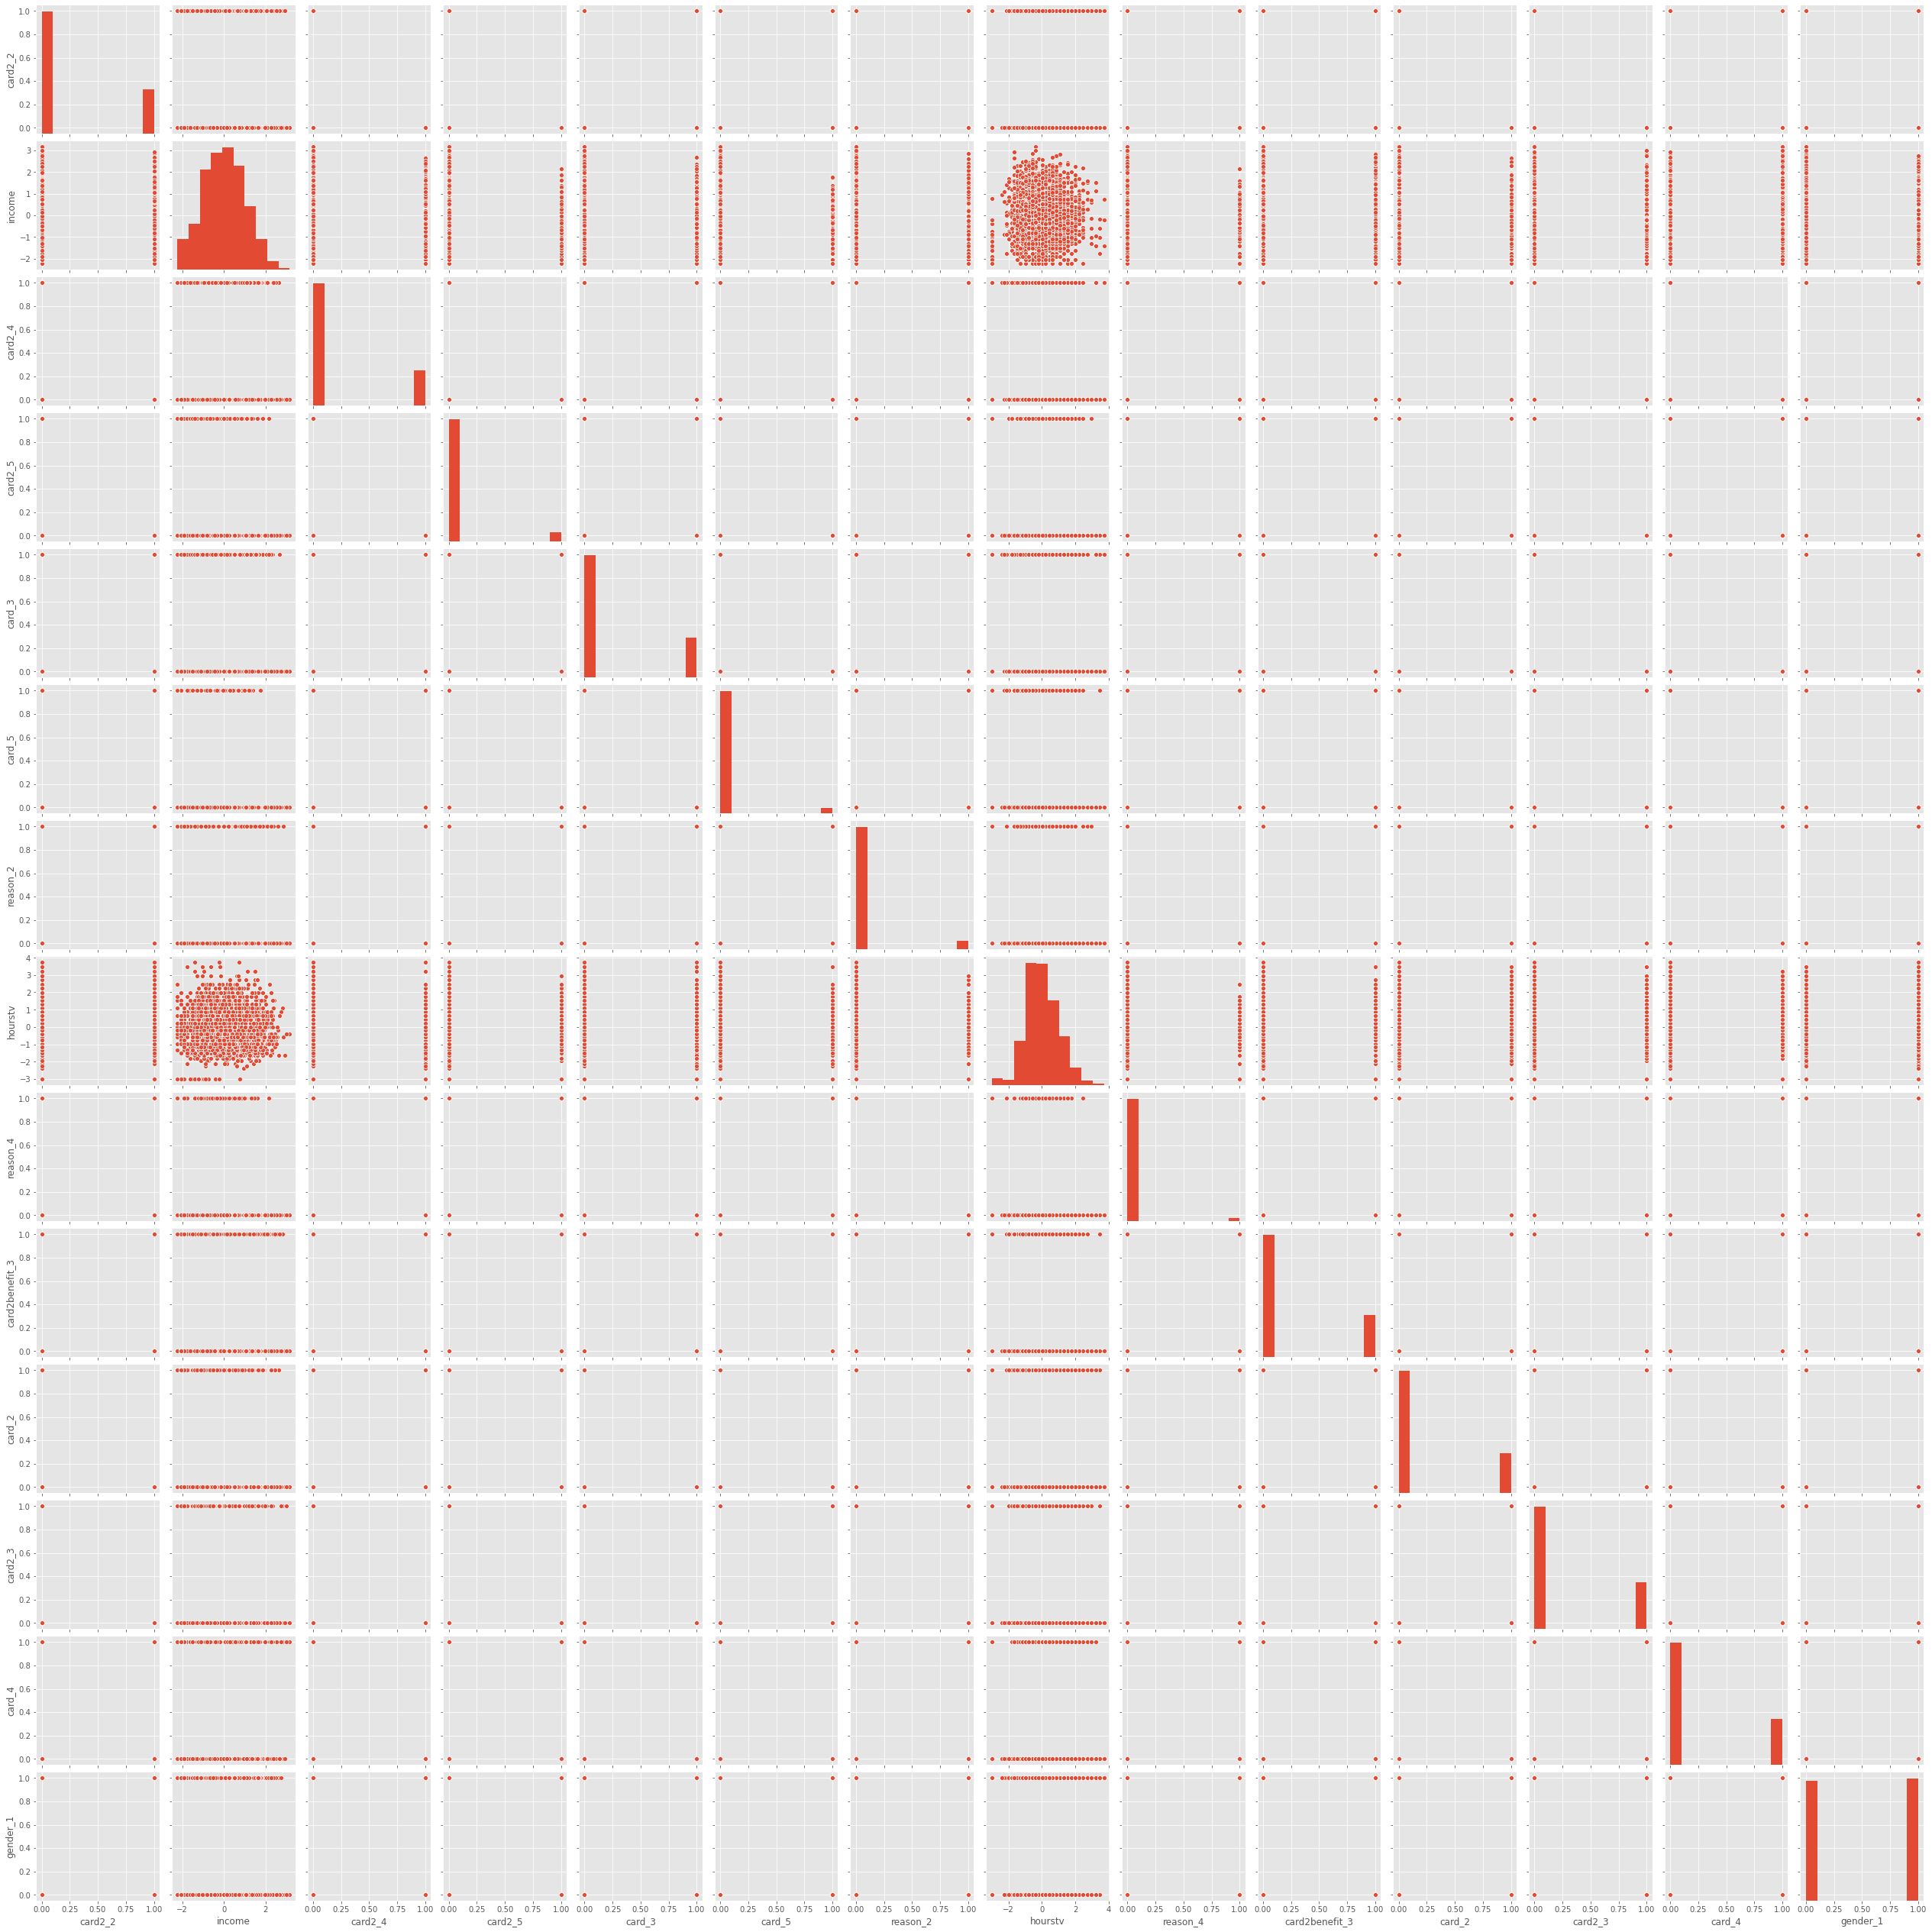

In [107]:
# plotting the graph between variables:
sns.pairplot(X_sign_train)
plt.show()

#### b. Detecting Autocorrelation

We can check the correlation between the residuals using the Durbin-Watson test. The value of the test statistic ranges from 0 to 4. The test statistic value near to 2, represents no autocorrelation. The value of the test statistic between 0 and 2 implies positive autocorrelation and the value between 2 and 4 implies negative autocorrelation.

The null and alternate hypothesis of Durbin-Watson test is as follows:

      H0: There is no autocorrelation in the residuals
      H1: There is autocorrelation in the residuals


#### Interpretation: 

From the above OLS summary built after choosing significant variables, we can observe that the value obtained from the Durbin-Watson test statistic is close to 2 (= 1.993). Thus, we conclude that there is no autocorrelation.

#### c. Heteroscedasticity

If the residuals have constant variance across different values of the predicted values, then it is known as Homoskedasticity. The absence of homoskedasticity is known as, heteroskedasticity. One of the assumptions of linear regression is that homoskedasticity should not be present. 

We can check for heteroskedasticity by Breusch-Pagan Test and by plotting Residuals.

#### 1. Breusch Pagan Test:

The null and alternate hypothesis of Breusch-Pagan test is as follows:

        H0: The residuals are homoskedastic
        H1: The residuals are not homoskedastic


In [108]:
from statsmodels.compat import lzip
name = ['f-value','p-value']           

# perform Breusch-Pagan test using het_breushpagan()
# compute residuals using 'resid'

test = sms.het_breuschpagan(OLS_significant_model.resid, OLS_significant_model.model.exog)

# print the output
lzip(name, test)    

[('f-value', 60.01609764624749), ('p-value', 1.1655927675527335e-07)]

#### Interpretation for presence of Heteroskedasticity: 

We observe that the p-value is less than 0.05; thus, we conclude that there is heteroskedasticity present in the data.

#### 2. Plotting Residuals Plots:

In [109]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression

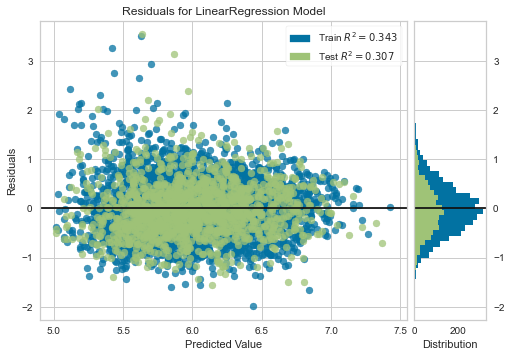

In [110]:
model = LinearRegression(fit_intercept=True)
visualizer = ResidualsPlot(model).fit(X_sign_train,Y_sign_train)
visualizer.score(X_sign_test,Y_sign_test)
visualizer.poof()
plt.show()

#### Inference of Residual Plots:

There is no pattern in the residuals and the predicted value hence show no presence of Homoscedasticity.

#### d. Normality of Residuals

#### 1. Q-Q Plot:
    
Q-Q plot is s visualization technique to check the normality of the residuals. It plots the quantiles of observed data versus the quantiles of the standard normal distribution

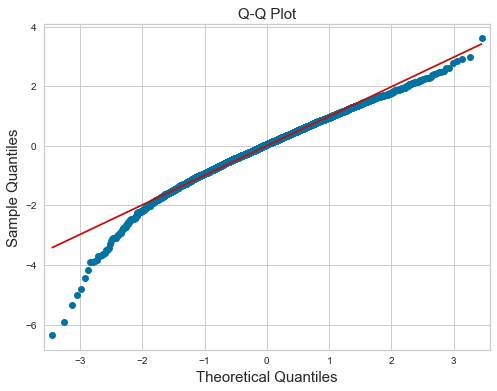

In [111]:
plt.rcParams['figure.figsize'] = [8,6]

qqplot(OLS_significant_model.resid, line = 'r', fit=True)
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)
plt.show()

#### Interpretation of Q-Q Plot: 

The diagonal line (red line) is the regression line and the blue points are the cumulative distribution of the residuals. As some of the points are close to the diagonal line, we conclude that the residuals do not follow a normal distribution.

#### 2. Jarque-Bara Test for Normality of Residuals:

In [112]:
from scipy.stats import jarque_bera

stat, p = jarque_bera(OLS_significant_model.resid)
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# setting the level of significance to 0.05
alpha = 0.05

# checking if p-value > 0.05
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=684.261, p-value=0.000
The data is not normally distributed (reject H0)


#### Inference for Normality of Residuals:

It is apparent that the p-value is less than 0.05. So we have enough evidence to reject the null hypothesis. It can be concluded that the residuals is not normally distributed.

### Predicting the CardSpent using Linear Regression Model via SkLearn

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [114]:
# Splitting the new data into 70% train and 30% test:

X_LR_train, X_LR_test, Y_LR_train, Y_LR_test = train_test_split(X_sign, Y, random_state=1, test_size=0.30)

# check the dimensions of the train & test subset for 

print("The shape of X_train is:",X_LR_train.shape)
print("The shape of X_test is:",X_LR_test.shape)
print('')


print("The shape of y_train is:",Y_LR_train.shape)
print("The shape of y_test is:",Y_LR_test.shape)

The shape of X_train is: (3500, 14)
The shape of X_test is: (1500, 14)

The shape of y_train is: (3500,)
The shape of y_test is: (1500,)


In [122]:
# fit() is used to fit the model

LR = LinearRegression()

LR_model = LR.fit(X_LR_train, Y_LR_train)

# predict() is used to predict the values for Y

y_pred_train = LR.predict(X_LR_train)

y_pred_test = LR.predict(X_LR_test)

# Score of Train and Test

print("Testing Accuracy:")
print(LR.score(X_LR_test, Y_LR_test))
print('')
print("Training Accuracy:")
print(LR.score(X_LR_train,Y_LR_train))


Testing Accuracy:
0.3072180728608951

Training Accuracy:
0.34274524626742897


### Model Evaluation Metrics

In [131]:
# MAE: Mean Absolute Error

mae_train = mean_absolute_error(y_pred_train, Y_LR_train)

mae_test = mean_absolute_error(y_pred_test, Y_LR_test)

print('The MAE for train is {} and Test is {}. '.format(mae_train, mae_test))

The MAE for train is 0.4264285407038494 and Test is 0.41339469834974973. 


In [128]:
def mape(actual, predicted):
    return(np.mean(np.abs((actual-predicted)/actual))*100)

In [130]:
# MAPE: Mean Absolute Percentage Error

mape_train = mape(y_pred_train, Y_LR_train)

mape_test = mape(y_pred_test, Y_LR_test)

print('The MAPE for train is {} and Test is {}. '.format(mape_train, mape_test))

The MAPE for train is 7.184348044299246 and Test is 6.946518690165491. 


In [132]:
# MSE: Mean Squared Error

mse_train = mean_squared_error(y_pred_train, Y_LR_train)

mse_test = mean_squared_error(y_pred_test, Y_LR_test)

print('The MSE for train is {} and Test is {}. '.format(mse_train, mse_test))

The MSE for train is 0.30467340467882326 and Test is 0.2914237212423956. 


In [133]:
# RMSE 

# when pass squared= False in mean_squared_error then return RMSE values:

RMSE_train_LR = mean_squared_error(y_pred_train, Y_LR_train, squared= False)

RMSE_test_LR = mean_squared_error(y_pred_test, Y_LR_test, squared= False)

print('The RMSE for Train is {} and Test sets is {}.'.format(RMSE_train_LR, RMSE_test_LR))

The RMSE for Train is 0.551972286151056 and Test sets is 0.539836754252983.


In [199]:
# Correlation between train target variable and  residuals (error)

np.corrcoef(Y_sign_train, OLS_significant_model.resid)

array([[1.       , 0.8107125],
       [0.8107125, 1.       ]])

In [200]:
# Correlation between train target variable and predicted values

np.corrcoef(Y_sign_train, OLS_significant_model.predict())

array([[1.        , 0.58544449],
       [0.58544449, 1.        ]])

### Inference:

The primary purpose of using linear regression is to identify positive and negative drivers. 

The variables that are driving the CardSpent are: card2_2, income, card2_4, card2_5, card_3, card_5, reason_2 , hourstv, reason_4, card2benefit_3, card_2, card2_3, card_4, gender_1.

The assumptions and evaluation metrics showed that linear regression is good fit. To improve the model accuracy, shall use the ensemble technqiues and tune the hyperparameters and cross validations to avoid the overfitting problems.

### Grid Search with RandomForest

Using the preprocessed dataset without performing any feature selection techniques

In [156]:
# Defining the parameters:

param_grid = { 
    'n_estimators': [50,100,120,150],
    'max_depth':[3,4,5,6,7,8],
    'max_features': np.arange(3,16),
    'n_jobs':[-1]
}

In [ ]:
non_FS_X_train, non_FS_X_test, non_FS_Y_train, non_FS_Y_test 

In [157]:
RF_tree = GridSearchCV(RandomForestRegressor(), param_grid, cv = 10)

# fit() is used to fit the model
RF_tree.fit(FS_X_train,FS_Y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'n_estimators': [50, 100, 120, 150], 'n_jobs': [-1]})

In [158]:
# The Best Parameters are:
RF_tree.best_params_

{'max_depth': 8, 'max_features': 15, 'n_estimators': 120, 'n_jobs': -1}

In [176]:
# Bulding Model using the best parameters found:

RF_model_1 =RandomForestRegressor(oob_score=True, n_estimators=120, max_depth=8, max_features=15, n_jobs=-1)
RF_model_1.fit(FS_X_train,FS_Y_train)

RandomForestRegressor(max_depth=8, max_features=15, n_estimators=120, n_jobs=-1,
                      oob_score=True)

In [185]:
FS_Y_train

1334    5.730424
4768    5.740211
65      6.665760
177     6.587784
4489    5.921123
          ...   
2895    6.227603
2763    6.197625
905     7.115761
3980    5.277400
235     5.006761
Length: 3500, dtype: float64

In [184]:
# Predicted values for Train set:
RFTree_train_pred = pd.DataFrame({'actual': np.exp(FS_Y_train),'predicted': np.exp(RF_model_1.predict(FS_X_train))})
RFTree_train_pred 

actual   predicted
1334   308.10  481.216504
4768   311.13  418.093415
65     785.06  532.500839
177    726.17  625.902261
4489   372.83  347.851821
...       ...         ...
2895   506.54  387.853076
2763   491.58  476.768875
905   1231.22  592.361936
3980   195.86  381.749195
235    149.42  312.995669

[3500 rows x 2 columns]

In [186]:
# Predicted values for Test set:

RFTree_test_pred = pd.DataFrame({'actual': np.exp(FS_Y_test),'predicted': np.exp(RF_model_1.predict(FS_X_test))})
RFTree_test_pred 

actual   predicted
2764  851.97  552.017552
4767  651.43  614.622381
3814  750.02  350.047519
3499  210.49  256.135038
2735  294.80  350.073068
...      ...         ...
4140  505.21  379.357334
3969  375.42  319.141207
2535  187.63  410.148414
1361  536.78  467.043078
1458  403.58  384.713755

[1500 rows x 2 columns]

In [188]:
# Score of Train and Test

print("Testing Accuracy:")
print(RF_model_1.score(FS_X_test,FS_Y_test))

print('')

print("Training Accuracy:")
print(RF_model_1.score(FS_X_train,FS_Y_train))

Testing Accuracy:
0.1950532456875811

Training Accuracy:
0.4463163619110224


In [189]:
# predict() is used to predict the values for Y

y_pred_train_RF = RF_model_1.predict(FS_X_train)

y_pred_test_RF = RF_model_1.predict(FS_X_test)


In [190]:
# RMSE 

# when pass squared= False in mean_squared_error then return RMSE values:

RMSE_train_RF = mean_squared_error(y_pred_train_RF, train_Y, squared= False)

RMSE_test_RF = mean_squared_error(y_pred_test_RF, test_Y, squared= False)

print('The RMSE for Train is {} and Test sets is {}.'.format(RMSE_train_RF, RMSE_test_RF))

The RMSE for Train is 0.5066187393062255 and Test sets is 0.5818991887767868.


In [191]:
# MAE: Mean Absolute Error

mae_train = mean_absolute_error(y_pred_train_RF, train_Y)

mae_test = mean_absolute_error(y_pred_test_RF, test_Y)

print('The MAE for train is {} and Test is {}. '.format(mae_train, mae_test))

The MAE for train is 0.393082413415223 and Test is 0.445160375081327. 


In [192]:
def mape(actual, predicted):
    return(np.mean(np.abs((actual-predicted)/actual))*100)

In [193]:
# MAPE: Mean Absolute Percentage Error

mape_train = mape(y_pred_train_RF, train_Y)

mape_test = mape(y_pred_test_RF, test_Y)

print('The MAPE for train is {} and Test is {}. '.format(mape_train, mape_test))

The MAPE for train is 6.619662900656216 and Test is 7.455030310482978. 


In [194]:
# MSE: Mean Squared Error

mse_train = mean_squared_error(y_pred_train_RF, train_Y)

mse_test = mean_squared_error(y_pred_test_RF, test_Y)

print('The MSE for train is {} and Test is {}. '.format(mse_train, mse_test))

The MSE for train is 0.2566625470162292 and Test is 0.33860666589908256. 


In [196]:
# top 15 drivers
imp_features_RF = pd.DataFrame({'features': FS_X_train.columns,'feature_importance':RF_model_1.feature_importances_}).sort_values(by=['feature_importance'],ascending=False)
top15 = imp_features_RF .iloc[:15,:]
top15

features  feature_importance
5          income            0.237115
60       creddebt            0.080543
3   carcatvalue_1            0.070754
31            age            0.040852
26       reason_2            0.035797
53        longmon            0.034754
16        debtinc            0.034349
37        cardmon            0.029797
52         card_4            0.029782
18    commutetime            0.029600
28        hourstv            0.028724
7         tollmon            0.025114
14         card_3            0.023280
49             ed            0.022731
23       retire_1            0.020132

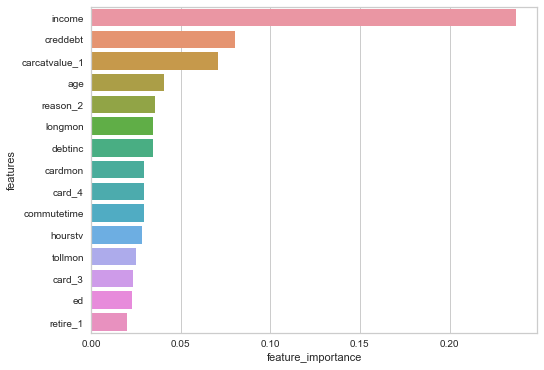

In [197]:
# Plot the Top 15 features received from RandomForest:
sns.barplot(x=top15.feature_importance , y= top15.features)
plt.show()

### Key Drivers using Linear Regression:

The Top drivers using Linear Regression are:

In [215]:
print(OLS_significant_model.params.index)

Index(['const', 'card2_2', 'income', 'card2_4', 'card2_5', 'card_3', 'card_5',
       'reason_2', 'hourstv', 'reason_4', 'card2benefit_3', 'card_2',
       'card2_3', 'card_4', 'gender_1'],
      dtype='object')


### Key Drivers using Random Forest

The Top drivers using Random Forest are:

In [212]:
print(top15['features'].to_list())

['income', 'creddebt', 'carcatvalue_1', 'age', 'reason_2', 'longmon', 'debtinc', 'cardmon', 'card_4', 'commutetime', 'hourstv', 'tollmon', 'card_3', 'ed', 'retire_1']


--------